In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importer les données 
EdStatsCountrySeries= pd.read_csv("EdStatsCountry-Series.csv")
EdStatsCountry= pd.read_csv("EdStatsCountry.csv")
EdStatsData= pd.read_csv("EdStatsData.csv")
EdStatsFootNote=pd.read_csv("EdStatsFootNote.csv")
EdStatsSeries= pd.read_csv("EdStatsSeries.csv")

In [ ]:
NEdStatsCountrySeries=
NEdStatsCountry= 
EdStatsData= 
EdStatsFootNote=
EdStatsSeries= 

In [3]:
ECScopy = EdStatsCountrySeries.copy()
ECcopy = EdStatsCountry.copy()
EDcopy = EdStatsData.copy()
ESFcopy = EdStatsFootNote.copy()
EScopy = EdStatsSeries.copy()

In [4]:
# Observation des 5 premiers lignes de l'échantillon
ECScopy.head(5)

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [5]:
# Forme du jeu de donnés (EdStatsCountrySeries)
ECScopy.shape

(613, 4)

In [6]:
ECScopy.isnull().sum().sum()

613

In [7]:
# Vérification des doublons
ECScopy[ECScopy.duplicated()]

Empty DataFrame
Columns: [CountryCode, SeriesCode, DESCRIPTION, Unnamed: 3]
Index: []

## Définition d'une fonction pour évaluer la qualité des données

In [8]:
def data_quality_assment(ECScopy):
  # sum null values
  total_null_values =ECScopy.isnull().sum().sort_values(ascending=False)
    
  # Pourcentages des valeurs nulls
  percentage_null_values=round(ECScopy.isnull().sum()/ECScopy.isnull().count()*100,2).sort_values(ascending=False)
    
  #Typages de données
  info=ECScopy.info()
    
  #Statistiques descriptives
  stats=ECScopy.describe()
    
  # Concatenation sum null values and pourcentage
  missing_data=pd.concat([total_null_values, percentage_null_values, info], axis=1, keys=['Total','Pourcentage','Info'])
  visual=msno.bar(ECScopy)  

 # print(sum_nan)
 # print(percentage)

  #Print
  print('\n Null values')
  print(missing_data)
  print('\n Visualizations des NaNs', visual)
  print('\n Statistiques descriptives')
  print(stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB

 Null values
             Total  Pourcentage
Unnamed: 3     613        100.0
CountryCode      0          0.0
SeriesCode       0          0.0
DESCRIPTION      0          0.0

 Visualizations des NaNs AxesSubplot(0.125,0.125;0.775x0.755)

 Statistiques descriptives
       Unnamed: 3
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN


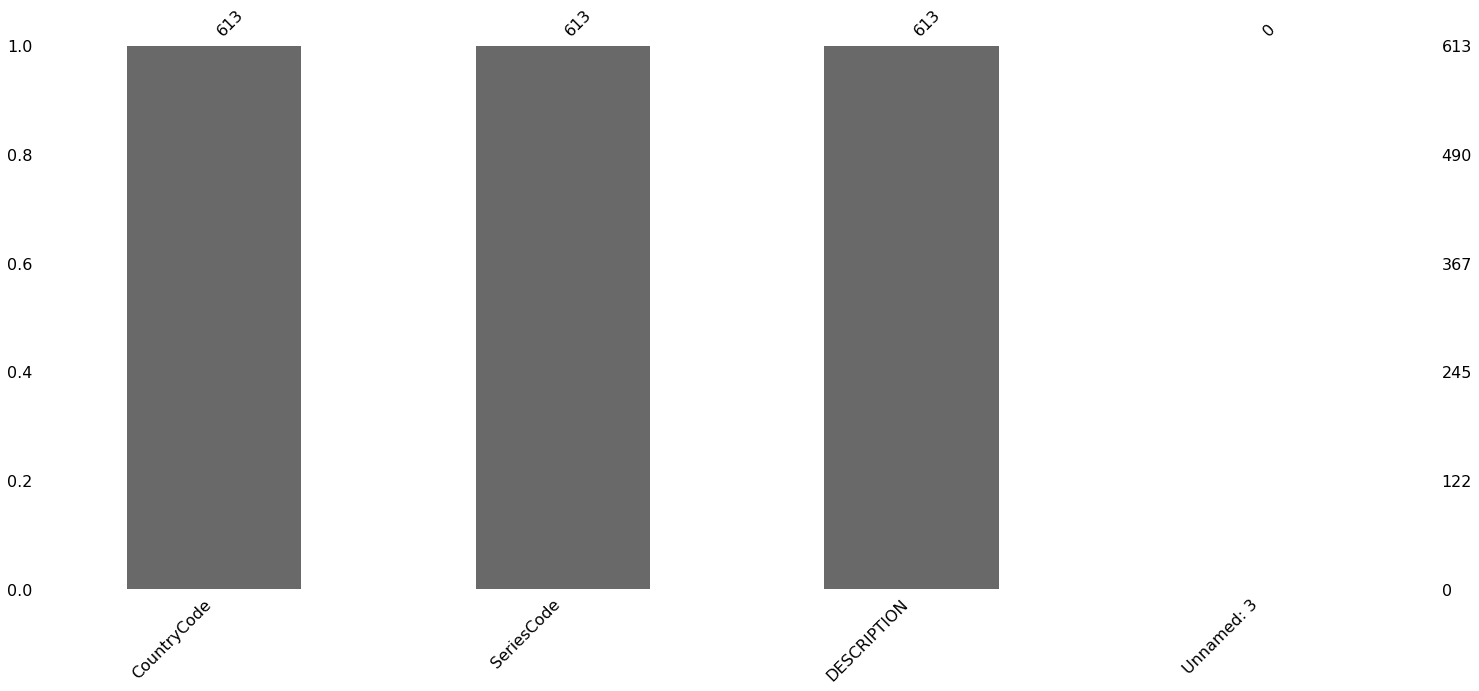

In [9]:
# Appel à la fonction 
data_quality_assment(ECScopy)

In [10]:
# Observation avec les 5 premiers de l'échantillon 
ECcopy.head(5)

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [11]:
# Forme du jeu de données 
ECcopy.shape

(241, 32)

In [12]:
ECcopy.isnull().sum().sum()

2354

In [13]:
# Vérification des doublons
ECcopy[ECcopy.duplicated()]

Empty DataFrame
Columns: [Country Code, Short Name, Table Name, Long Name, 2-alpha code, Currency Unit, Special Notes, Region, Income Group, WB-2 code, National accounts base year, National accounts reference year, SNA price valuation, Lending category, Other groups, System of National Accounts, Alternative conversion factor, PPP survey year, Balance of Payments Manual in use, External debt Reporting status, System of trade, Government Accounting concept, IMF data dissemination standard, Latest population census, Latest household survey, Source of most recent Income and expenditure data, Vital registration complete, Latest agricultural census, Latest industrial data, Latest trade data, Latest water withdrawal data, Unnamed: 31]
Index: []

[0 rows x 32 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

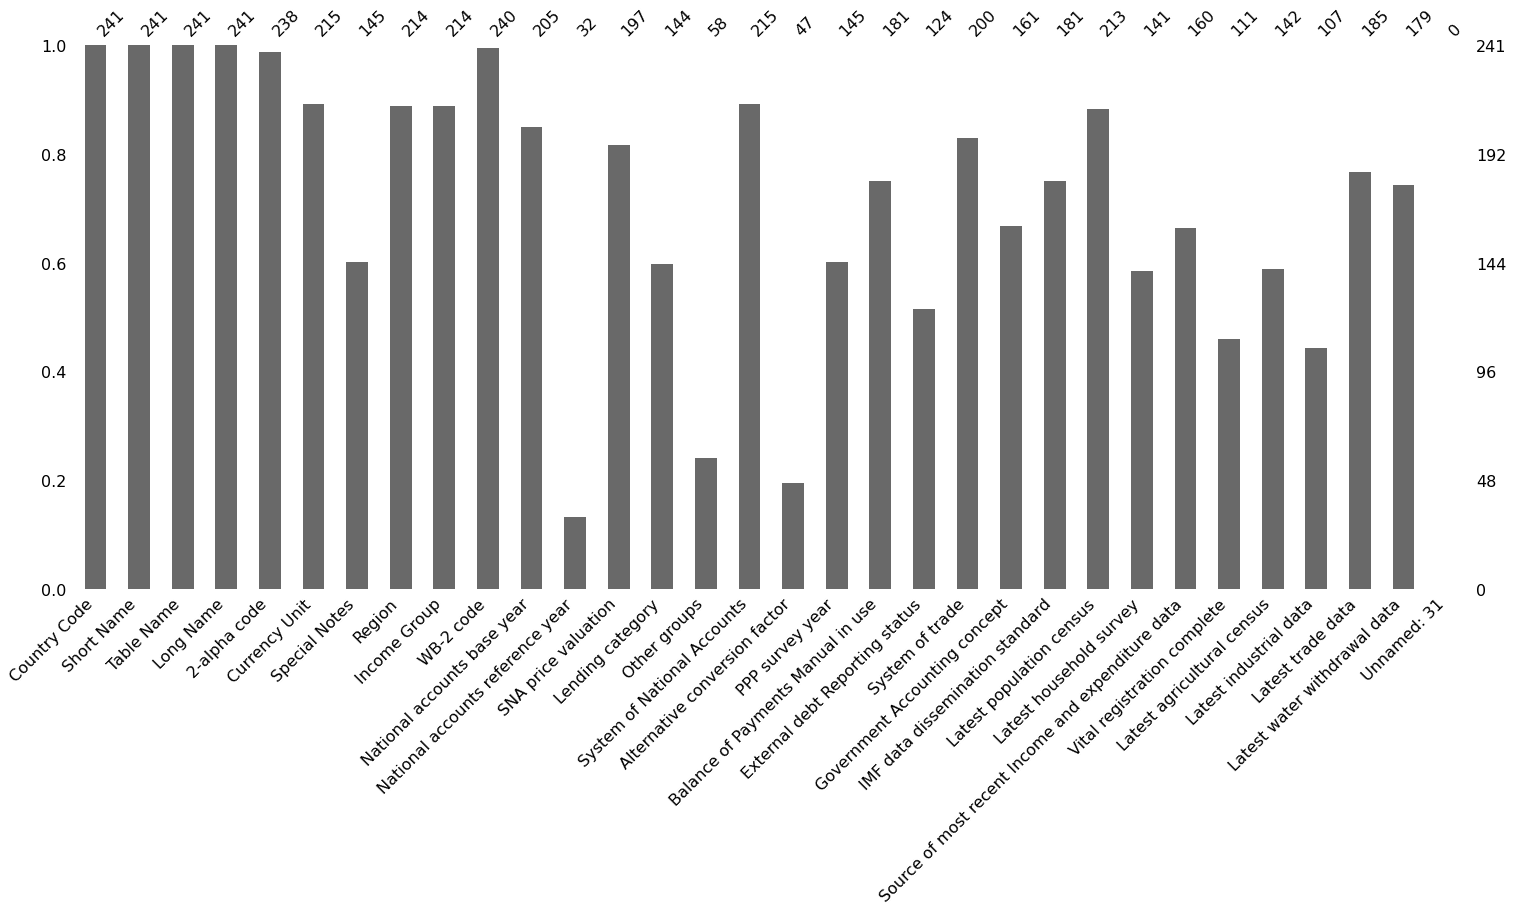

In [14]:
data_quality_assment(ECcopy)

# # Suppression des variables moins remplis et semblent non pertinent

In [15]:
# D'aprés la visualisation  je peux supprimer quelques colonnes avec beaucoup de valeurs nulles 
ECcopy.drop(columns=['Special Notes', 'National accounts reference year', 'Vital registration complete', 'Latest agricultural census',
                             'Latest water withdrawal data','Latest household survey', 'Source of most recent Income and expenditure data', 
                             'Lending category', 'Other groups','Alternative conversion factor', 'PPP survey year', 
                             'Balance of Payments Manual in use', 'External debt Reporting status','Latest industrial data',
                             'Government Accounting concept', 'IMF data dissemination standard', 'Latest trade data', 
                            'SNA price valuation', 'Unnamed: 31','Short Name','Table Name','WB-2 code','2-alpha code','System of trade',
                             'Long Name','National accounts base year','National accounts reference year','System of National Accounts',
                             'Currency Unit','Latest population census','Income Group'], inplace=True)

In [16]:
# Observation avec 5 Echantillons aléatoire aprés suppression de quelques colonnes
ECcopy.sample(5)

Country Code                      Region
201          STP          Sub-Saharan Africa
148          MNA                         NaN
173          PHL         East Asia & Pacific
101          IRQ  Middle East & North Africa
90           HKG         East Asia & Pacific

In [17]:
# Somme des valeurs uniques
ECcopy['Region'].nunique()

7

In [18]:
ECcopy['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [19]:
count_region = ECcopy["Region"].value_counts()
count_region

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [20]:
# Observation avec les 5 premiers lignes
EDcopy.head(5)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [21]:
# Forme du jeu de données 
EDcopy.shape

(886930, 70)

In [22]:
EDcopy.isnull().sum().sum()

53455179

In [23]:
# Vérification des doublons
EDcopy[EDcopy.duplicated()]

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, Unnamed: 69]
Index: []

[0 rows x 70 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

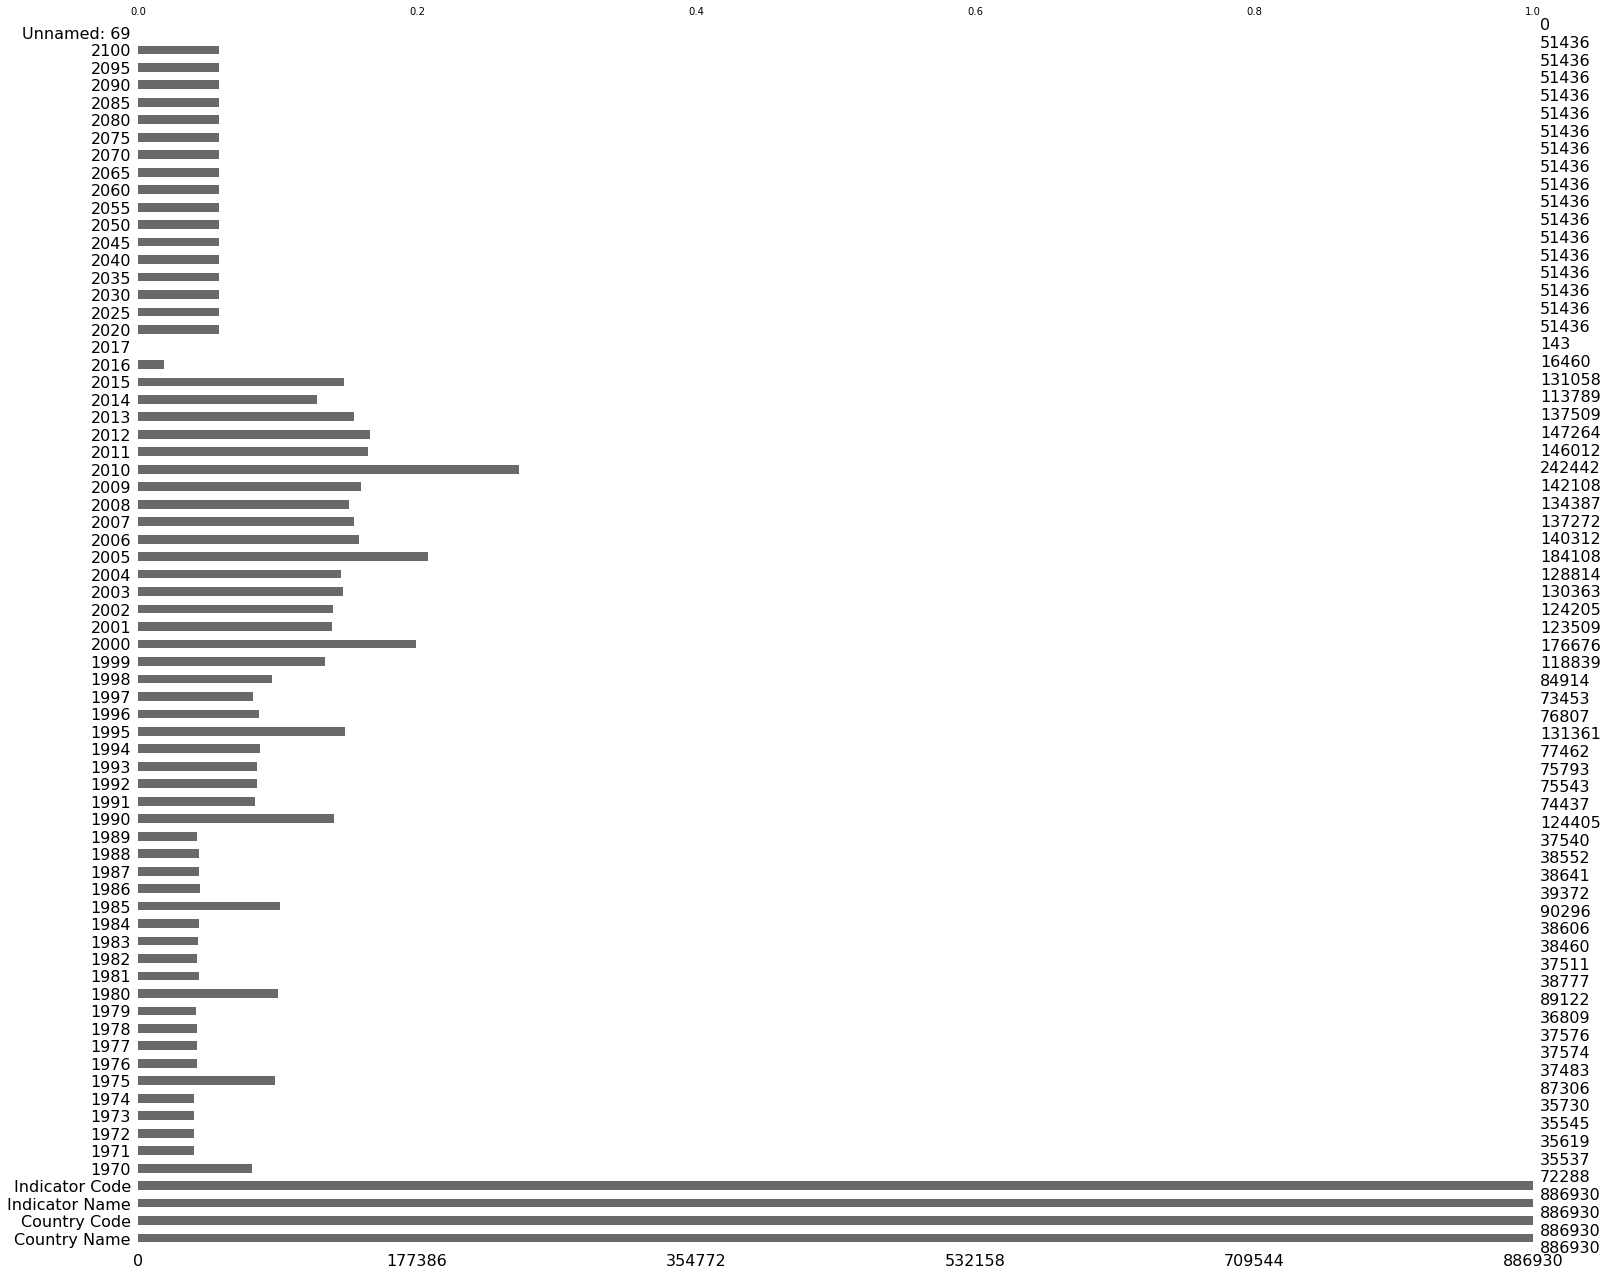

In [24]:
# Appel à la fonction 
data_quality_assment(EDcopy)

## Séparation des données futures et données passés 

### Remplissage données passées en supprimant quelques années avec un intervalle de 5 ans pour les années passées

<AxesSubplot:>

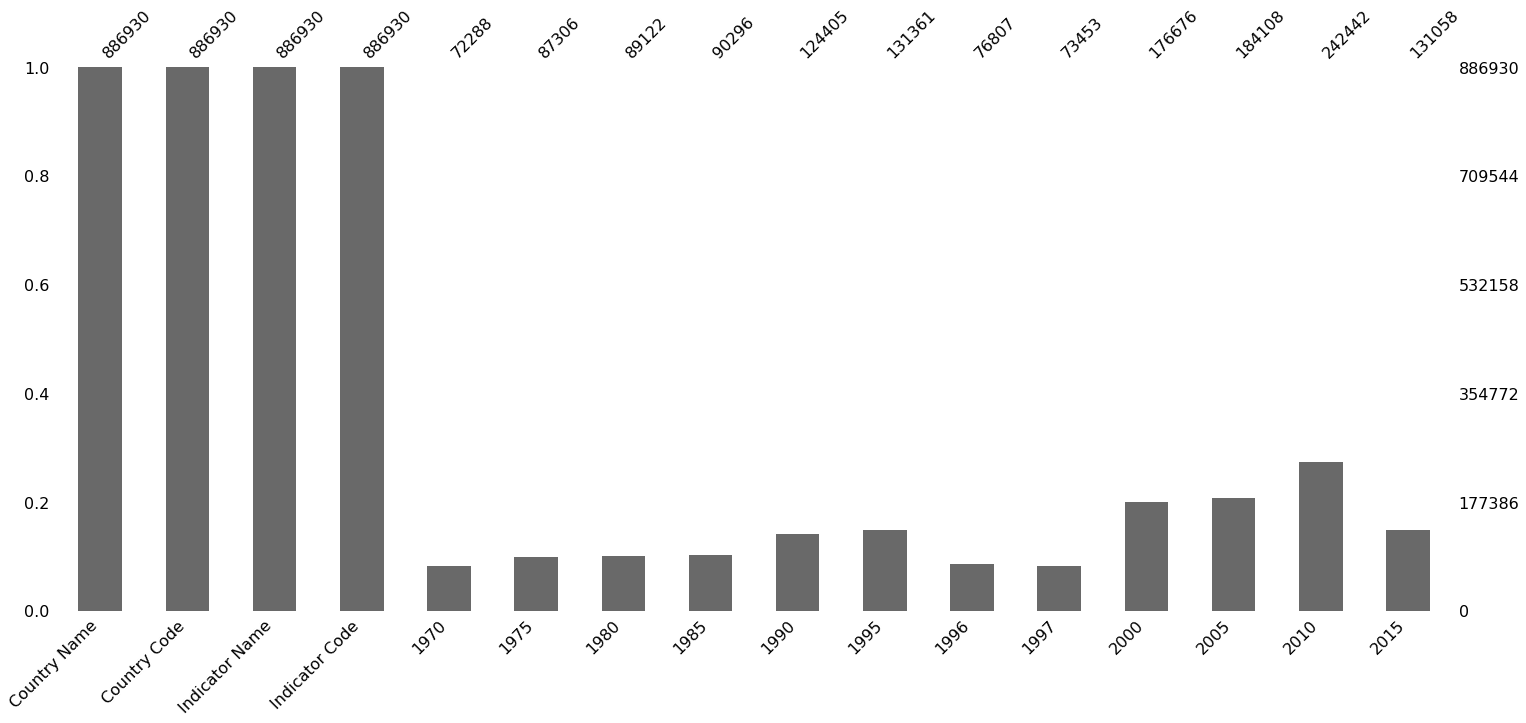

In [25]:
msno.bar(EDcopy[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','1970', '1975', '1980', '1985', 
                  '1990', '1995', '1996', '1997', '2000' , '2005', '2010','2015']])

### Remplissage données futures

<AxesSubplot:>

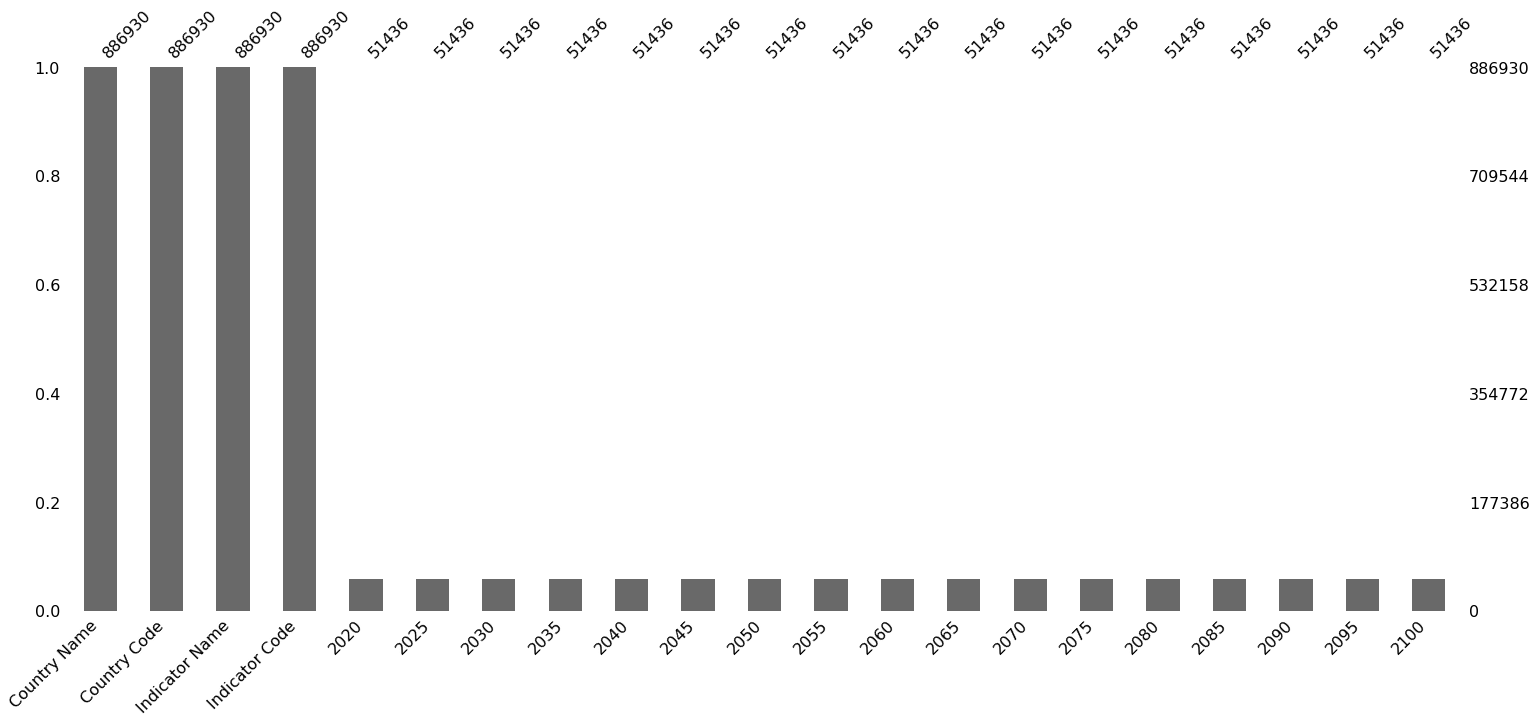

In [26]:
msno.bar(EDcopy[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 
                '2020', '2025', '2030', '2035','2040', '2045', '2050', '2055',
                '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']])

# # Suppression des variables moins remplies

#### La suppression s'est faite avec remplissage des taux de variables faibles et avec un intervalle de 5 ans 

 #### (1970, 1975, 1980, 1985, 1985, 1990 ,1995, 2000, 2005)

 #### Ensuite en 2010 où il y'a plus de valeurs renseignés puis 2015

#### De 2020 à 2100 sont des données futures et sont tous égaux, donc on garde 2020 et 2100

In [27]:
EDcopy.drop(columns=['1971', '1972', '1973', '1974', '1976', '1977', '1978',
                          '1979', '1981', '1982', '1983', '1984', '1986', '1987', '1988', '1989', '1991', 
                          '1992', '1993', '1994', '1996', '1997', '1998', '1999', '2001', '2002', '2003', '2004',
                          '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014', '2017','2016',
                      '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085',
                     '2090', '2095', 'Unnamed: 69'],inplace=True)

In [28]:
# Affichage d'un échantillon de 5 observations aléatoire
EDcopy.sample(5)

Country Name Country Code  \
281104                Cyprus          CYP   
680123    Russian Federation          RUS   
787335  Syrian Arab Republic          SYR   
270977               Croatia          HRV   
84385    Upper middle income          UMC   

                                           Indicator Name  \
281104  Rate of out-of-school youth of upper secondary...   
680123  PIAAC: Adults by proficiency level in problem ...   
787335  TIMSS: Eighth grade students who did not reach...   
270977  Wittgenstein Projection: Percentage of the pop...   
84385   Africa Dataset: Percentage of primary pupils i...   

             Indicator Code  1970  1975  1980  1985  1990  1995      2000  \
281104       UIS.ROFST.3.CP   NaN   NaN   NaN   NaN   NaN   NaN  17.56473   
680123    LO.PIAAC.TEC.FAIL   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
787335     LO.TIMSS.SCI8.BL   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
270977    PRJ.ATT.2024.4.FE   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
84385   UIS.AFR.ECP.MG.1.PU   NaN   NaN   NaN   NaN   NaN   NaN       NaN   

           2005      2010  2015  2020  2100  
281104  9.11335  13.52454   NaN   NaN   NaN  
680123      NaN       NaN   NaN   NaN   NaN  
787335      NaN       NaN   NaN   NaN   NaN  
270977      NaN   0.06000  0.06  0.07  0.11  
84385       NaN       NaN   NaN   NaN   NaN

<AxesSubplot:>

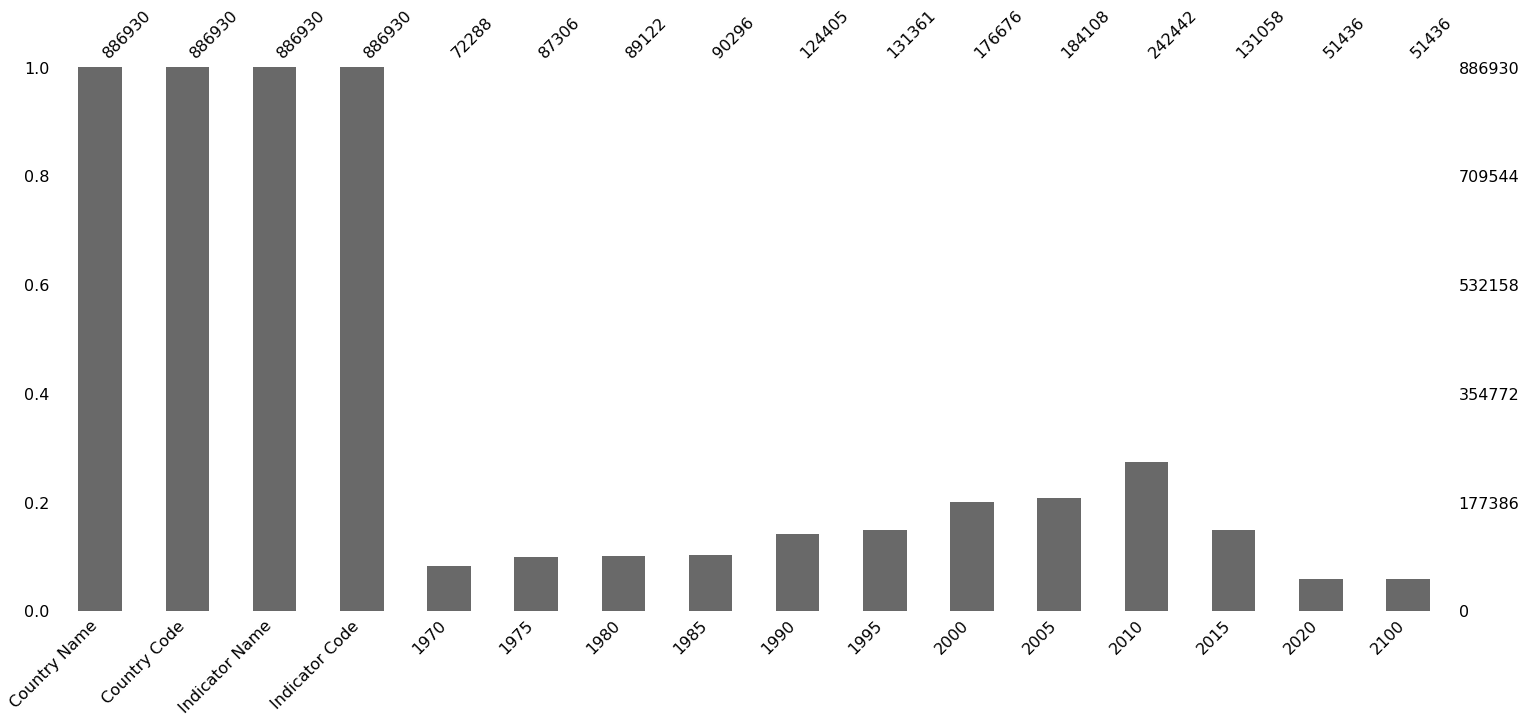

In [29]:
# Visualisation avec missigno après suppression de certaines colonnes
msno.bar(EDcopy)

In [30]:
count_countname = EDcopy["Country Name"].value_counts()
count_countname

Turkey                                           3665
Serbia                                           3665
Cabo Verde                                       3665
North America                                    3665
Europe & Central Asia (excluding high income)    3665
                                                 ... 
United Kingdom                                   3665
Belgium                                          3665
Liberia                                          3665
Ukraine                                          3665
Senegal                                          3665
Name: Country Name, Length: 242, dtype: int64

In [31]:
EDcopy["Country Name"].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [32]:
EDcopy["Country Name"].nunique()

242

In [33]:
# Observation avec les 5 premiers lignes du dataset
ESFcopy.head(5)

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [34]:
# Forme du jeu de données 
ESFcopy.shape

(643638, 5)

In [35]:
ESFcopy.isnull().sum().sum()

643638

In [36]:
# Vérification des doublons
ESFcopy[ESFcopy.duplicated()]

Empty DataFrame
Columns: [CountryCode, SeriesCode, Year, DESCRIPTION, Unnamed: 4]
Index: []

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB

 Null values
              Total  Pourcentage
Unnamed: 4   643638        100.0
CountryCode       0          0.0
SeriesCode        0          0.0
Year              0          0.0
DESCRIPTION       0          0.0

 Visualizations des NaNs AxesSubplot(0.125,0.125;0.775x0.755)

 Statistiques descriptives
       Unnamed: 4
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN


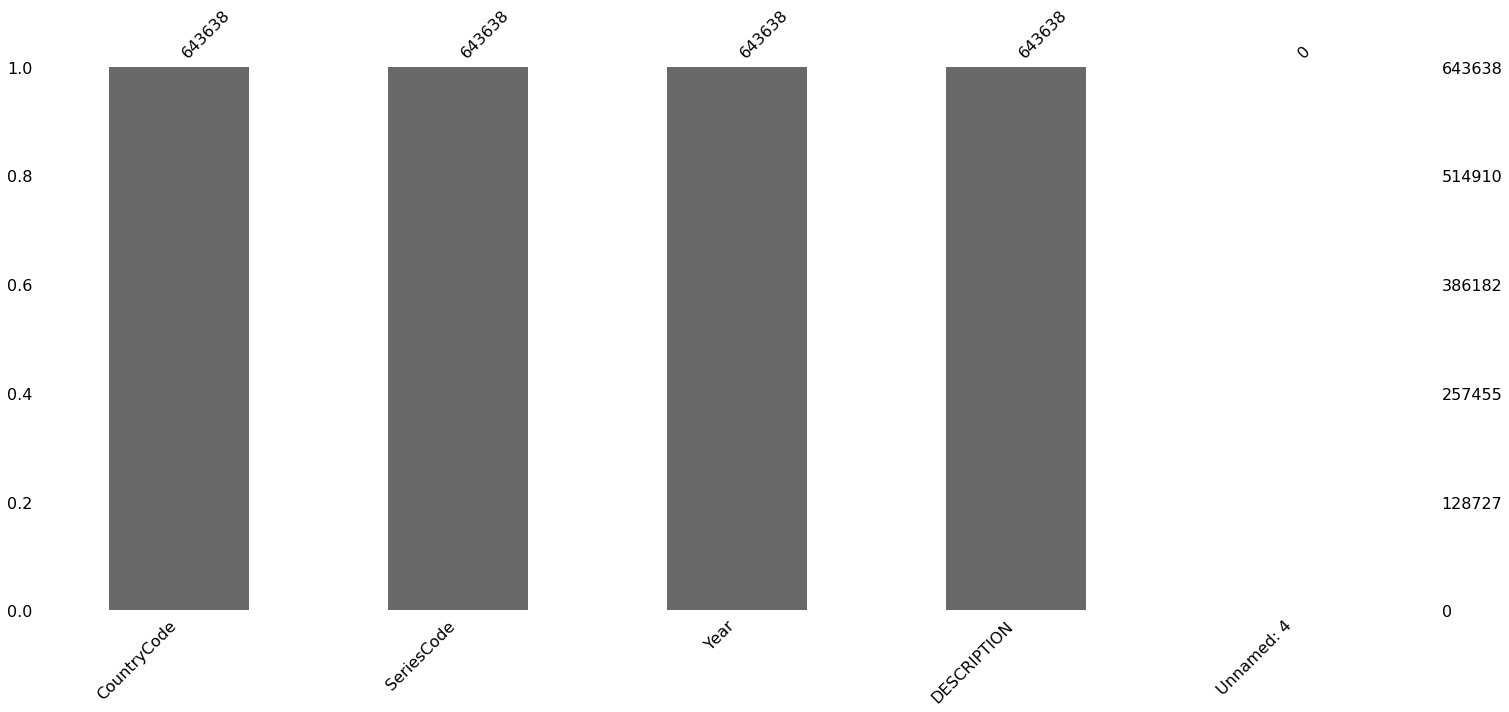

In [37]:
# Appel à la fonction 
data_quality_assment(ESFcopy)

In [38]:
# Observation de l'échantillon 
EScopy.head(5)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [39]:
# Forme du jeu de données 
EScopy.shape

(3665, 21)

In [40]:
EScopy.isnull().sum().sum()

55203

In [41]:
# Vérification des doublons 
EScopy[EScopy.duplicated()]

Empty DataFrame
Columns: [Series Code, Topic, Indicator Name, Short definition, Long definition, Unit of measure, Periodicity, Base Period, Other notes, Aggregation method, Limitations and exceptions, Notes from original source, General comments, Source, Statistical concept and methodology, Development relevance, Related source links, Other web links, Related indicators, License Type, Unnamed: 20]
Index: []

[0 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

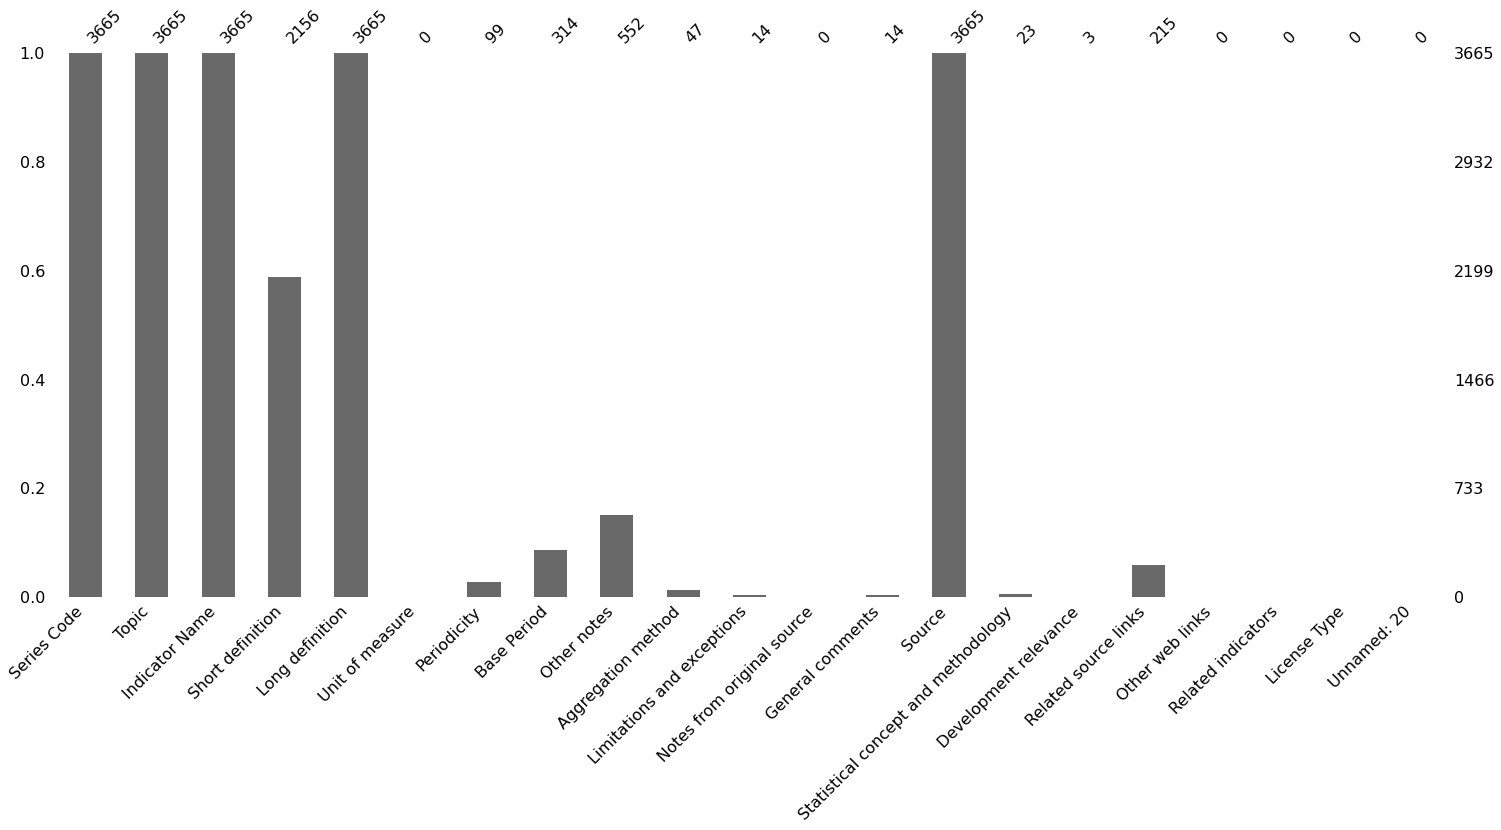

In [42]:
# Appel à la fonction 
data_quality_assment(EScopy)

In [43]:
# Verifier le contenu des colonnes contenant des nulls values, pour voir s'il ya une possibilité de remplacer les nulls values.
EScopy['Periodicity'].unique()

array([nan, 'Annual'], dtype=object)

In [44]:
EScopy['Base Period'].unique()

array([nan, '2010', '2011', 'Projections (2010 to 2100)', '14'],
      dtype=object)

# # Suppression des variables moins remplis et semblent non pertinent

In [45]:
# Aprés visualisation, je vois que je peux supprimer des colonnes avec des valeurs nulles à 100%
EScopy.drop(columns=["Unit of measure","Periodicity","Other notes","Base Period","Notes from original source","Other web links","Source",
                            "Aggregation method", "Limitations and exceptions", "General comments", "Development relevance", "Related source links",
                            "Related indicators", "License Type","Statistical concept and methodology","Short definition", "Unnamed: 20"], inplace=True)

In [46]:
# Observation de l'échantillon aprés suppression de quelques colonnes
EScopy.head(5)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                     Long definition  
0  Percentage of female population age 15-19 with...  
1  Percentage of population age 15-19 with no edu...  
2  Percentage of female population age 15+ with n...  
3  Percentage of population age 15+ with no educa...  
4  Percentage of female population age 20-24 with...

<AxesSubplot:>

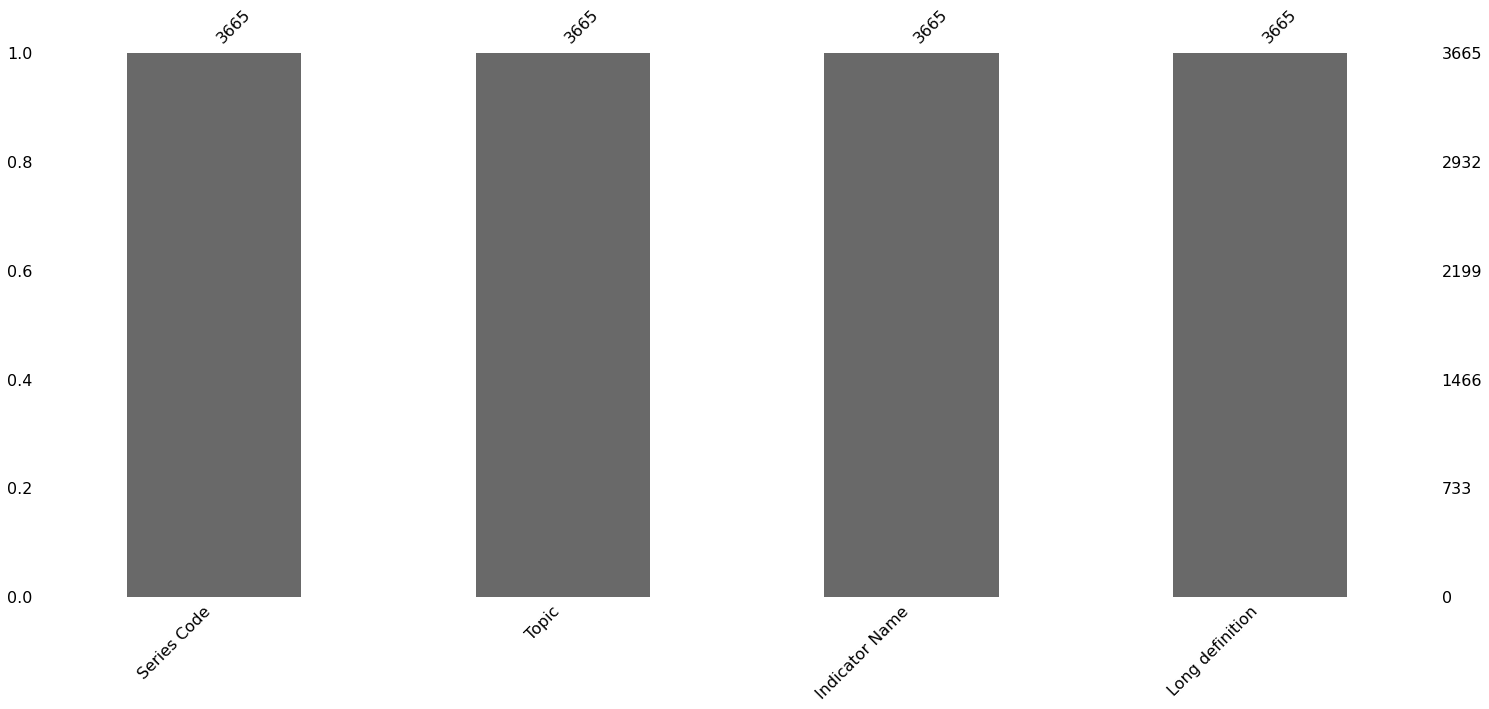

In [47]:
# Visualisation avec missigno 
msno.bar(EScopy)

In [48]:
count_indicatname = EScopy["Indicator Name"].value_counts().sort_values(ascending=False)
count_indicatname

SABER: (Engaging the Private Sector, Government funded) Policy Goal 6: Holding schools accountable                       1
UIS: Total net attendance rate, lower secondary, second quintile, gender parity index (GPI)                              1
DHS: Typology of out-of-school children. Primary. Dropped out. Female                                                    1
MICS: Typology of out-of-school children. Primary. Late entry. Urban                                                     1
TIMSS: Female 4th grade students reaching the intermediate international benchmark of mathematics achievement (%)        1
                                                                                                                        ..
Projection: Percentage of the population age 20-64 by highest level of educational attainment. Lower Secondary. Total    1
Percentage of graduates from non-science and non-technology fields in tertiary education who are female (%)              1
EGRA: Reading Co

# # Récupération des datasets ciblés

### ECcopy et EDcopy

In [49]:
# Affichage des 5 premiers lignes 
ECcopy.head(5)

Country Code                     Region
0          ABW  Latin America & Caribbean
1          AFG                 South Asia
2          AGO         Sub-Saharan Africa
3          ALB      Europe & Central Asia
4          AND      Europe & Central Asia

In [50]:
# Affichage des 5 premiers lignes 
EDcopy.head(5)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970      1975       1980       1985       1990      1995       2000  \
0        NaN       NaN        NaN        NaN        NaN       NaN        NaN   
1        NaN       NaN        NaN        NaN        NaN       NaN        NaN   
2        NaN       NaN        NaN        NaN        NaN       NaN        NaN   
3        NaN       NaN        NaN        NaN        NaN       NaN        NaN   
4  54.822121  59.36554  65.617767  69.033211  71.995819  71.81176  77.245682   

        2005       2010  2015  2020  2100  
0        NaN        NaN   NaN   NaN   NaN  
1        NaN        NaN   NaN   NaN   NaN  
2        NaN        NaN   NaN   NaN   NaN  
3        NaN        NaN   NaN   NaN   NaN  
4  82.489487  85.211998   NaN   NaN   NaN

In [51]:
# Afficher les 5 premiers ligne de ECScopy
ECScopy.head(5)

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [52]:
# Appel de la fonction merge 
ECDcopy= pd.merge(ECcopy, EDcopy, left_on= "Country Code", right_on = "Country Code")
ECDcopy.head(5)

Country Code                     Region Country Name  \
0          ABW  Latin America & Caribbean        Aruba   
1          ABW  Latin America & Caribbean        Aruba   
2          ABW  Latin America & Caribbean        Aruba   
3          ABW  Latin America & Caribbean        Aruba   
4          ABW  Latin America & Caribbean        Aruba   

                                      Indicator Name  Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   NaN   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   NaN   

   1975  1980  1985  1990  1995       2000       2005       2010  2015  2020  \
0   NaN   NaN   NaN   NaN   NaN  56.156502  59.058441        NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  59.691120  62.097809        NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   1.133350   1.109620        NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN  52.667679  55.963299        NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN  98.253593  97.978920  98.920464   NaN   NaN   

   2100  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

In [53]:
ECDcopy.shape

(883265, 17)

<AxesSubplot:>

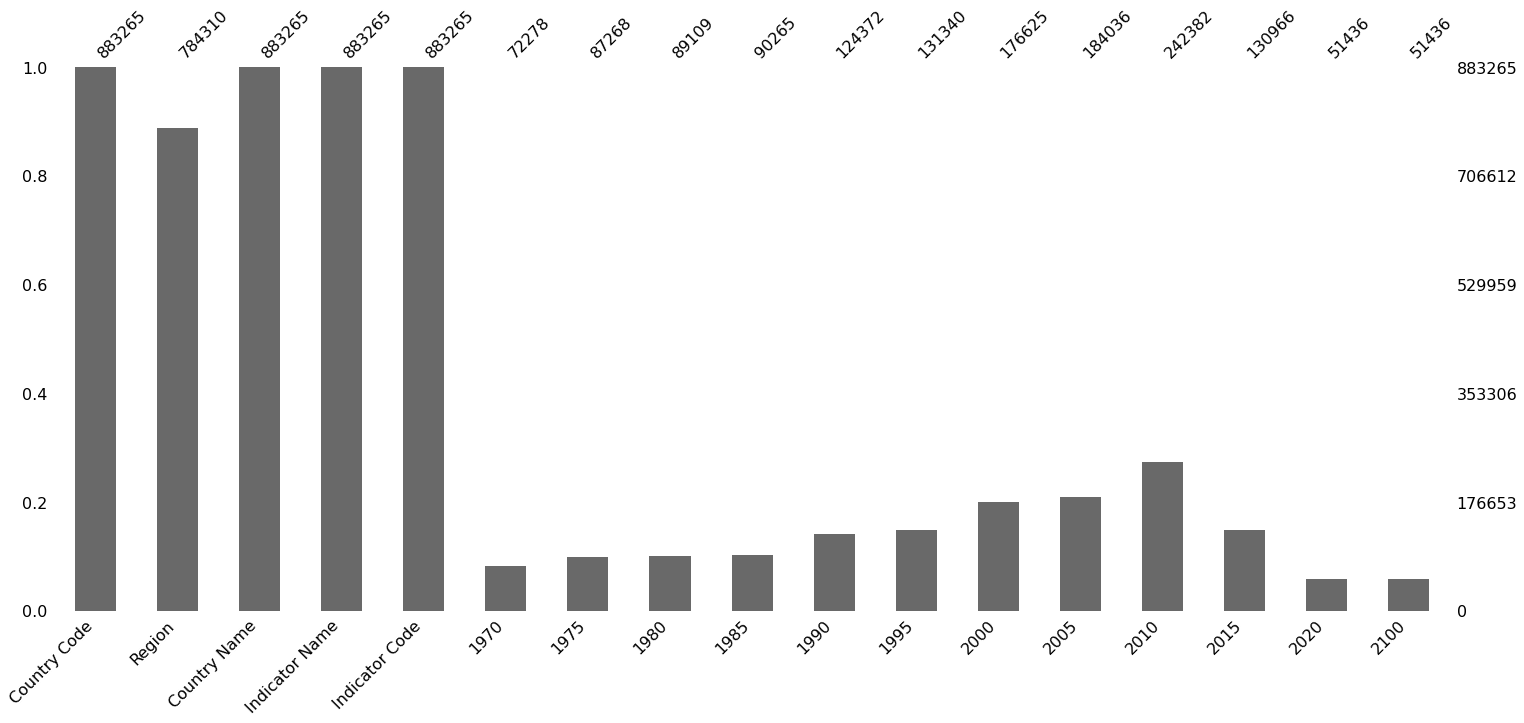

In [54]:
# Visualisation du dataset 
msno.bar(ECDcopy)

# Choix des indicateurs

#### Le choix des indicateurs est porté en 3 classes: sur l'éducation(secondaire et tertiaire), l'économie(revenu) et l'internet

In [55]:
# on choisit 8 indicateurs 
# Le nonmbre d'ordinateur personnel pour 100 personnes
DataCountry_comp=ECDcopy[ECDcopy['Indicator Name']=='Personal computers (per 100 people)']

# Population âgée de 15 à 19 ans en milliers selon le plus haut niveau d'éducation atteint Secondaire supérieur total
DataCountry_pop=ECDcopy[ECDcopy['Indicator Name']=='Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total']

#  années moyennes de scolarisation. 20-24 ans total
DataCountry_mean=ECDcopy[ECDcopy['Indicator Name']=='Wittgenstein Projection: Mean years of schooling. Age 20-24. Total']

# Nombre d'internautes pour 100 personnes
DataCountry_int=ECDcopy[ECDcopy['Indicator Name']=='Internet users (per 100 people)']

# Dépenses publiques pour l'enseignement secondaire
DataCountry_dep_sec_pib=ECDcopy[ECDcopy['Indicator Name']=='Government expenditure on secondary education as % of GDP (%)']

# Dépenses publiques pour l'enseignement supérieur
DataCountry_dep_sup_pib=ECDcopy[ECDcopy['Indicator Name']=='Government expenditure on tertiary education as % of GDP (%)']

# Dépenses pour le deuxième cycle du secondaire par des dépenses publiques totales
DataCountry_dep_sec_gouv=ECDcopy[ECDcopy['Indicator Name']=='Expenditure on upper secondary as % of total government expenditure (%)']

# Dépenses tertiaires par rapport des dépenses publiques totales 
DataCountry_dep_sup_gouv=ECDcopy[ECDcopy['Indicator Name']=='Expenditure on tertiary as % of total government expenditure (%)']


### Affichage des indicateurs

In [56]:
# Le nonmbre d'ordinateur personnel pour 100 personnes
DataCountry_comp.head(2)

Country Code                     Region Country Name  \
2084          ABW  Latin America & Caribbean        Aruba   
5749          AFG                 South Asia  Afghanistan   

                           Indicator Name  Indicator Code  1970  1975  1980  \
2084  Personal computers (per 100 people)  IT.CMP.PCMP.P2   NaN   NaN   NaN   
5749  Personal computers (per 100 people)  IT.CMP.PCMP.P2   NaN   NaN   NaN   

      1985  1990  1995  2000      2005  2010  2015  2020  2100  
2084   NaN   NaN   NaN   NaN  7.923544   NaN   NaN   NaN   NaN  
5749   NaN   NaN   NaN   NaN  0.341903   NaN   NaN   NaN   NaN

In [57]:
# Population âgée de 15 à 19 ans en milliers selon le plus haut niveau d'éducation atteint Secondaire supérieur total
DataCountry_pop.head(2)

Country Code                     Region Country Name  \
3602          ABW  Latin America & Caribbean        Aruba   
7267          AFG                 South Asia  Afghanistan   

                                         Indicator Name     Indicator Code  \
3602  Wittgenstein Projection: Population age 15-19 ...  PRJ.POP.1519.3.MF   
7267  Wittgenstein Projection: Population age 15-19 ...  PRJ.POP.1519.3.MF   

      1970  1975  1980  1985  1990  1995  2000  2005  2010  2015  2020  2100  
3602   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.39  1.48  1.38  1.76  
7267   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [58]:
#  années moyennes de scolarisation. 20-24 ans total
DataCountry_mean.head(2)

Country Code                     Region Country Name  \
3361          ABW  Latin America & Caribbean        Aruba   
7026          AFG                 South Asia  Afghanistan   

                                         Indicator Name   Indicator Code  \
3361  Wittgenstein Projection: Mean years of schooli...  PRJ.MYS.2024.MF   
7026  Wittgenstein Projection: Mean years of schooli...  PRJ.MYS.2024.MF   

      1970  1975  1980  1985  1990  1995  2000  2005  2010  2015  2020  2100  
3361   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   9.1   9.3   9.5  11.0  
7026   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [59]:
# Nombre d'internautes pour 100 personnes
DataCountry_int.head(2)

Country Code                     Region Country Name  \
1375          ABW  Latin America & Caribbean        Aruba   
5040          AFG                 South Asia  Afghanistan   

                       Indicator Name  Indicator Code  1970  1975  1980  1985  \
1375  Internet users (per 100 people)  IT.NET.USER.P2   NaN   NaN   NaN   NaN   
5040  Internet users (per 100 people)  IT.NET.USER.P2   NaN   NaN   NaN   NaN   

      1990  1995       2000       2005  2010       2015  2020  2100  
1375   0.0   NaN  15.442823  25.400000  62.0  88.661227   NaN   NaN  
5040   0.0   NaN        NaN   1.224148   4.0   8.260000   NaN   NaN

In [60]:
# Dépenses publiques pour l'enseignement secondaire
DataCountry_dep_sec_pib.head(2)

Country Code                     Region Country Name  \
1265          ABW  Latin America & Caribbean        Aruba   
4930          AFG                 South Asia  Afghanistan   

                                         Indicator Name     Indicator Code  \
1265  Government expenditure on secondary education ...  UIS.XGDP.23.FSGOV   
4930  Government expenditure on secondary education ...  UIS.XGDP.23.FSGOV   

      1970  1975  1980  1985  1990  1995     2000     2005  2010  2015  2020  \
1265   NaN   NaN   NaN   NaN   NaN   NaN  1.30588  1.25296   NaN   NaN   NaN   
4930   NaN   NaN   NaN   NaN   NaN   NaN      NaN      NaN   NaN   NaN   NaN   

      2100  
1265   NaN  
4930   NaN

In [61]:
# Dépenses publiques pour l'enseignement supérieur
DataCountry_dep_sup_pib.head(2)

Country Code                     Region Country Name  \
1266          ABW  Latin America & Caribbean        Aruba   
4931          AFG                 South Asia  Afghanistan   

                                         Indicator Name     Indicator Code  \
1266  Government expenditure on tertiary education a...  UIS.XGDP.56.FSGOV   
4931  Government expenditure on tertiary education a...  UIS.XGDP.56.FSGOV   

      1970  1975  1980  1985  1990  1995     2000    2005  2010  2015  2020  \
1266   NaN   NaN   NaN   NaN   NaN   NaN  0.49905  0.5376   NaN   NaN   NaN   
4931   NaN   NaN   NaN   NaN   NaN   NaN      NaN     NaN   NaN   NaN   NaN   

      2100  
1266   NaN  
4931   NaN

In [62]:
# Dépenses pour le deuxième cycle du secondaire par des dépenses publiques totales
DataCountry_dep_sec_gouv.head(2)

Country Code                     Region Country Name  \
1241          ABW  Latin America & Caribbean        Aruba   
4906          AFG                 South Asia  Afghanistan   

                                         Indicator Name     Indicator Code  \
1241  Expenditure on upper secondary as % of total g...  UIS.XGOVEXP.IMF.3   
4906  Expenditure on upper secondary as % of total g...  UIS.XGOVEXP.IMF.3   

      1970  1975  1980  1985  1990  1995  2000  2005  2010  2015  2020  2100  
1241   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4906   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [63]:
# Dépenses tertiaires par rapport des dépenses publiques totales 
DataCountry_dep_sup_gouv.head(2)

Country Code                     Region Country Name  \
1239          ABW  Latin America & Caribbean        Aruba   
4904          AFG                 South Asia  Afghanistan   

                                         Indicator Name      Indicator Code  \
1239  Expenditure on tertiary as % of total governme...  UIS.XGOVEXP.IMF.56   
4904  Expenditure on tertiary as % of total governme...  UIS.XGOVEXP.IMF.56   

      1970  1975  1980  1985  1990  1995     2000     2005  2010  2015  2020  \
1239   NaN   NaN   NaN   NaN   NaN   NaN  2.30993  2.16937   NaN   NaN   NaN   
4904   NaN   NaN   NaN   NaN   NaN   NaN      NaN      NaN   NaN   NaN   NaN   

      2100  
1239   NaN  
4904   NaN

### Visualisation du taux de remplissage des indicateurs

<AxesSubplot:>

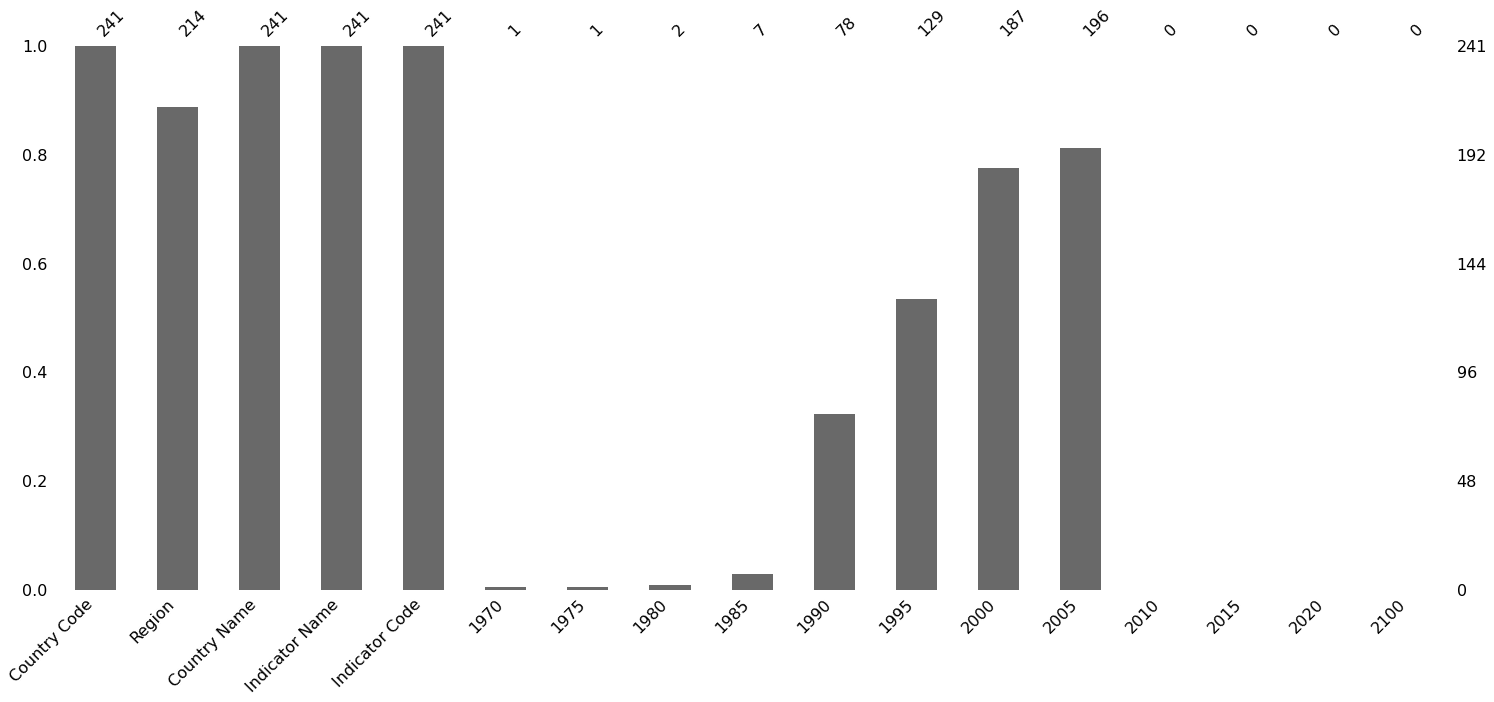

In [64]:
# Le nonmbre d'ordinateur personnel pour 100 personnes
msno.bar(DataCountry_comp)

#### On voit qu'on peut garder les années passées de 1990 à 2005 et pas de données futures

<AxesSubplot:>

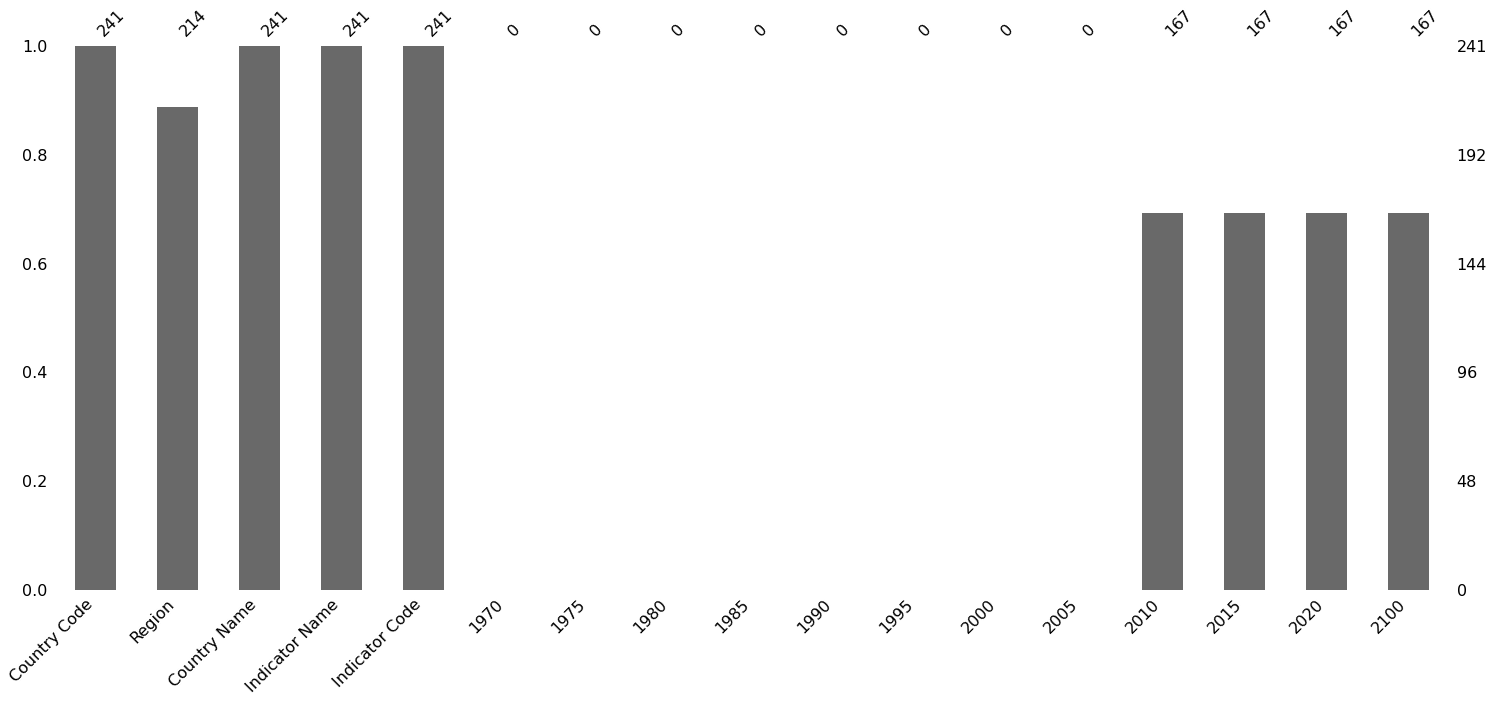

In [65]:
# Population âgée de 15 à 19 ans en milliers selon le plus haut niveau d'éducation atteint Secondaire supérieur total
msno.bar(DataCountry_pop)

####  On voit qu'on peut garder les années passées 2010 et 2015 et pour le futur 2020 et 2100

<AxesSubplot:>

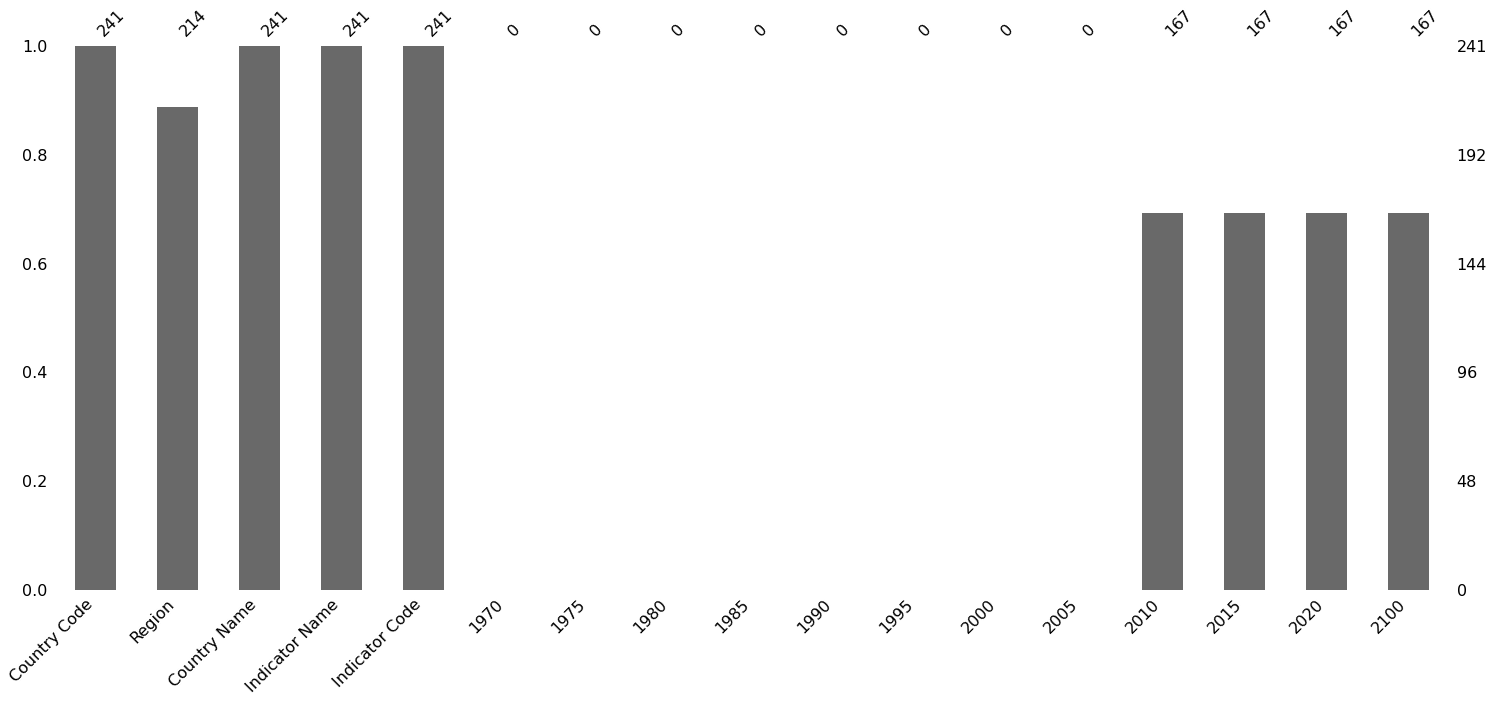

In [66]:
# années moyennes de scolarisation. 20-24 ans total
msno.bar(DataCountry_mean)

#### On voit qu'on peut garder les années passées de  2010 à 2015 et pour le futur 2020 à 2100

<AxesSubplot:>

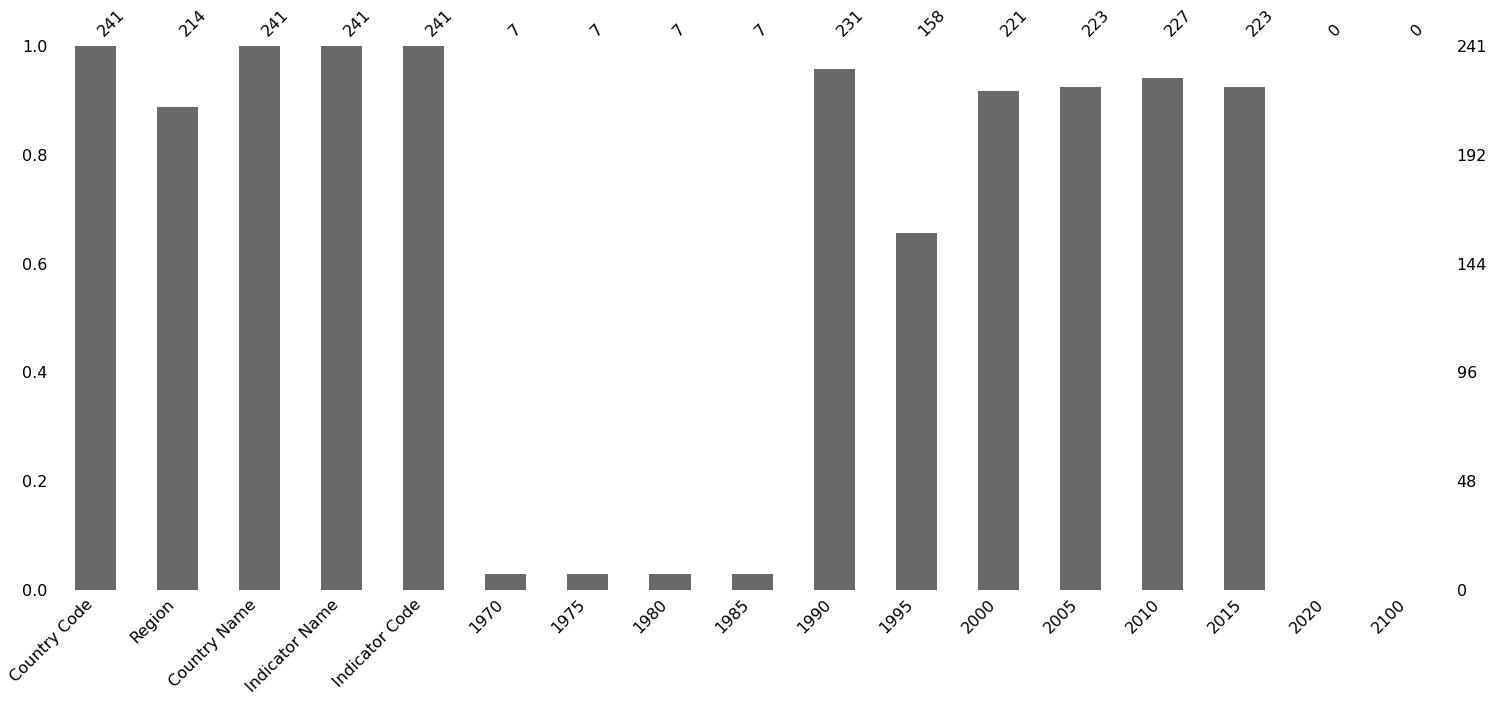

In [67]:
# Nombre d'internautes pour 100 personnes
msno.bar(DataCountry_int)

#### On voit qu'on peut garder les années passées de 1990 à 2015 et absence de données futures

<AxesSubplot:>

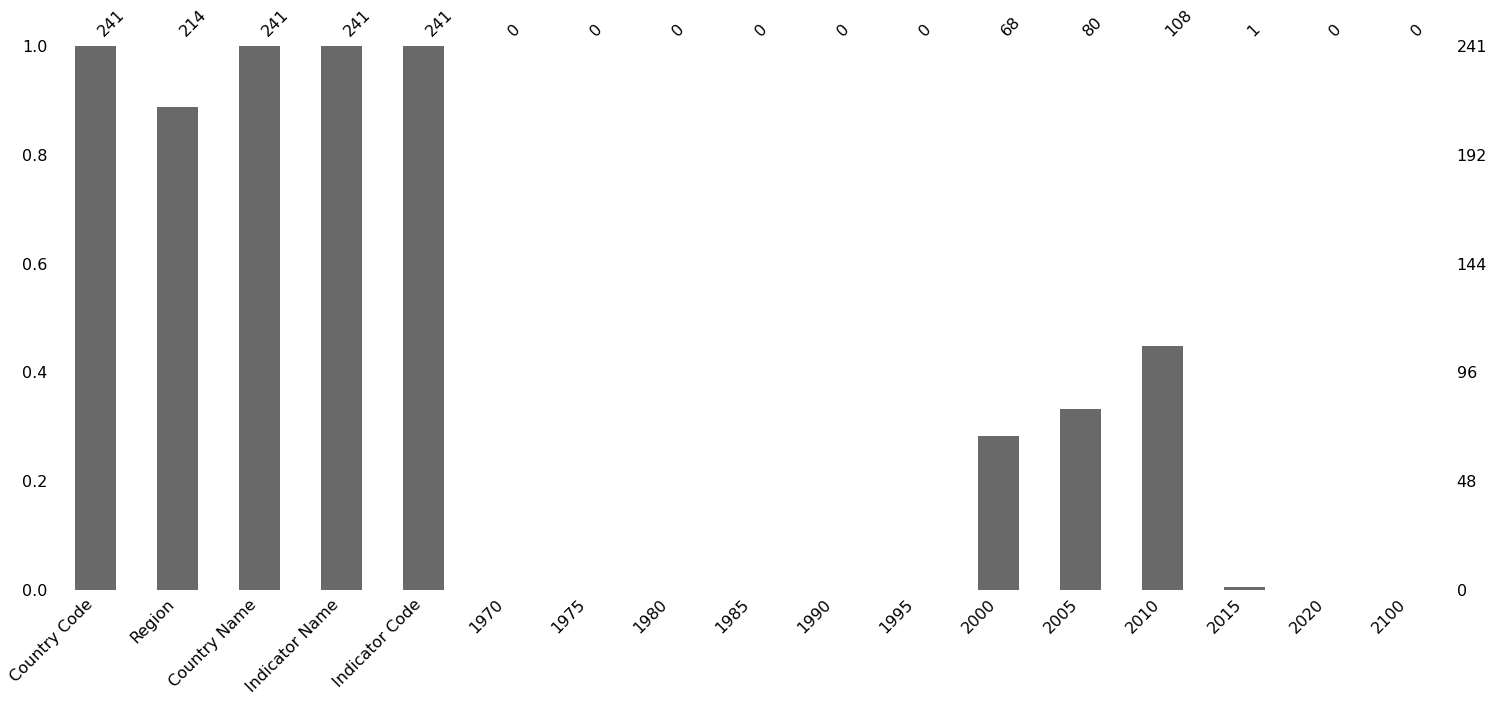

In [68]:
# Dépenses publiques pour l'enseignement secondaire
msno.bar(DataCountry_dep_sec_pib)

#### On voit qu'on peut garder les années passées de 2000 à 2010 et absence de données futures

<AxesSubplot:>

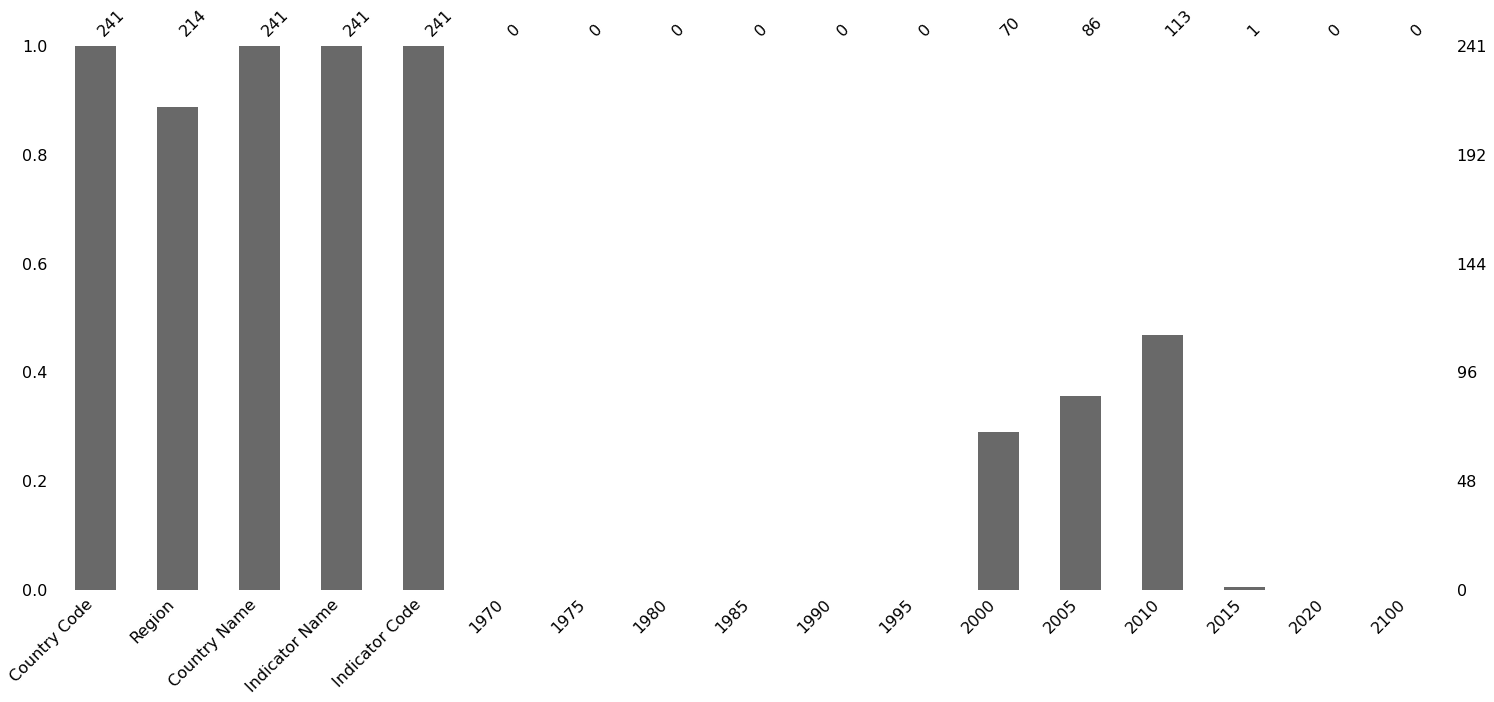

In [69]:
# Dépenses publiques pour l'enseignement supérieur
msno.bar(DataCountry_dep_sup_pib)

####  On voit qu'on peut garder les années passées de 2000 à 2010 et absence de données futures

<AxesSubplot:>

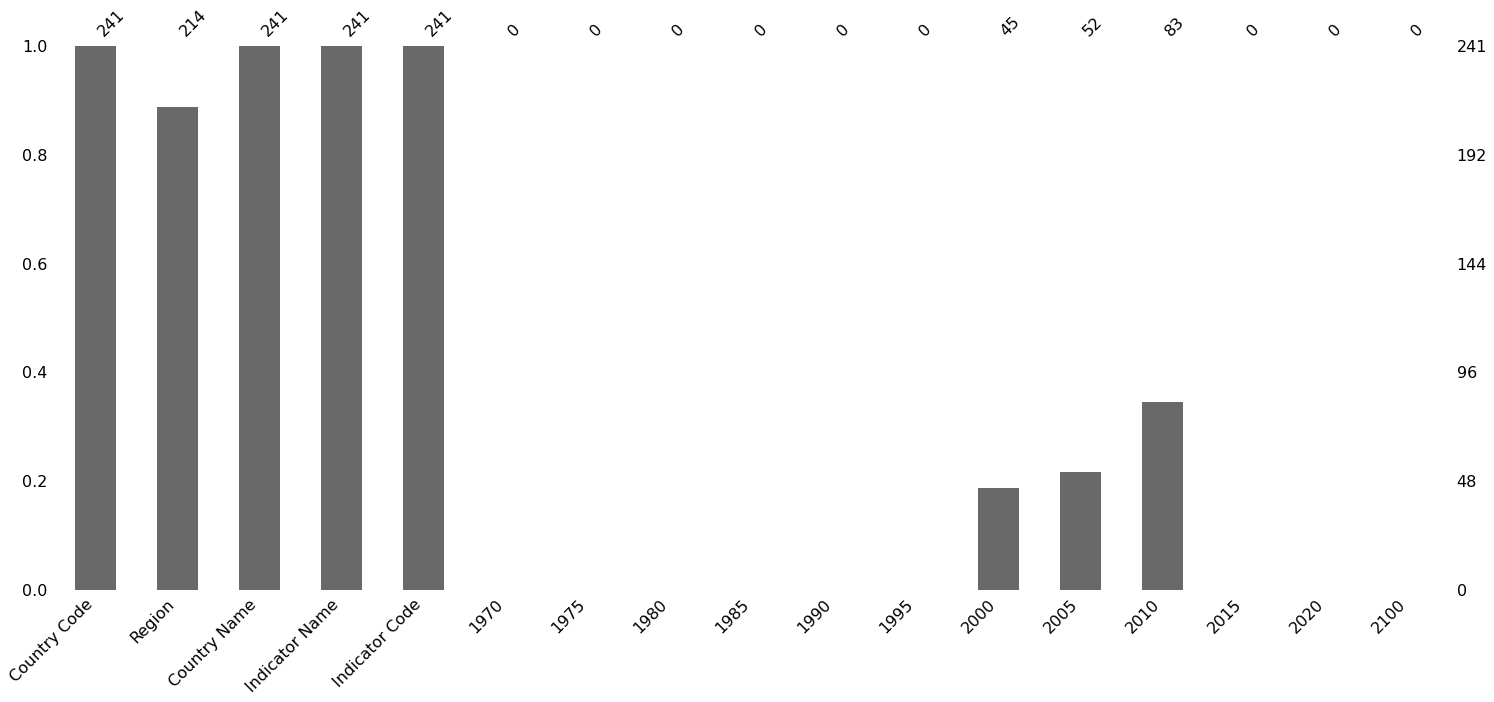

In [70]:
# Dépenses pour le deuxième cycle du secondaire par rapport des dépenses publiques totales
msno.bar(DataCountry_dep_sec_gouv)

####  On voit qu'on peut garder les années passées de 2000 à 2010 et absence de données futures

<AxesSubplot:>

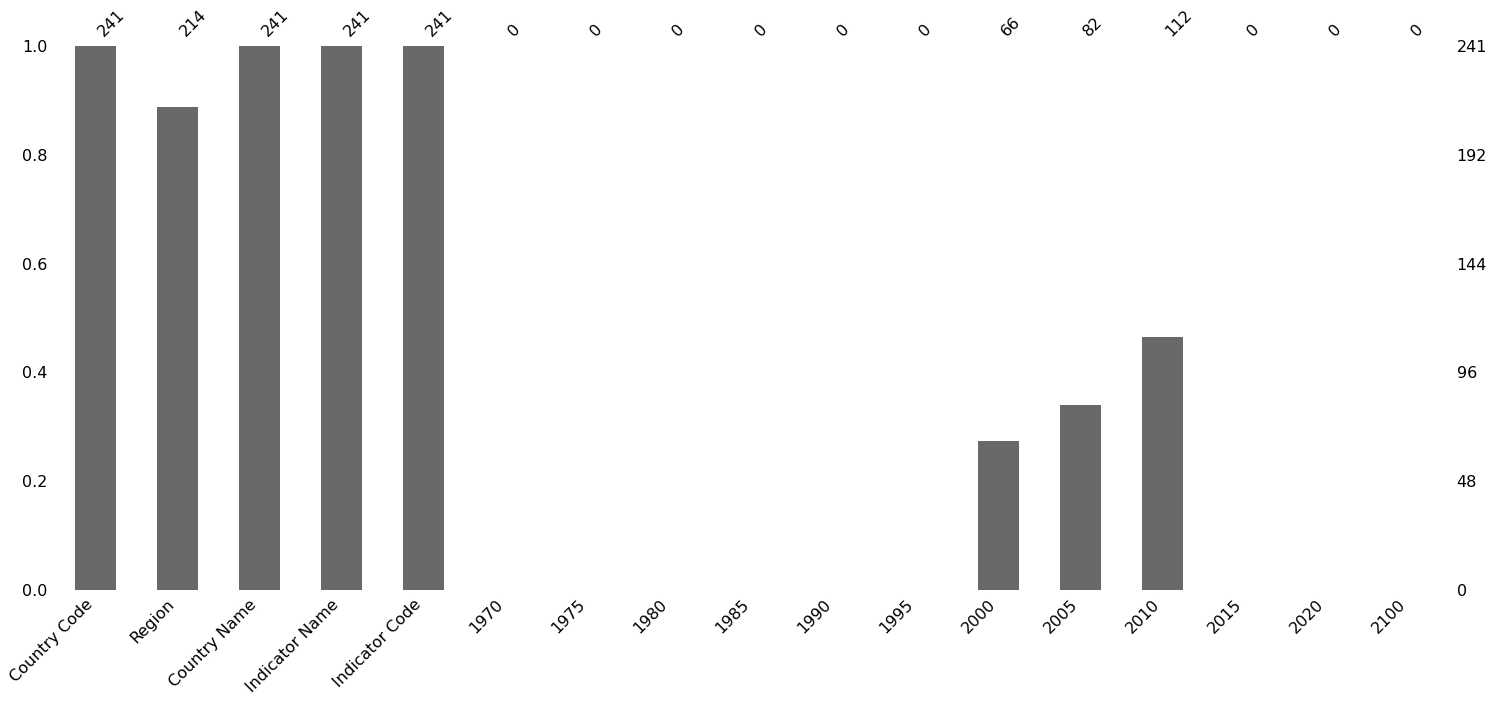

In [71]:
# Dépenses tertiaires par rapport des dépenses publiques totales 
msno.bar(DataCountry_dep_sup_gouv)

####  On voit qu'on peut garder les années passées de 2000 à 2010 et absence de données futures

###  Suppressions des années vides et moins rempli pour chaque indicateurs du passé et futures

<AxesSubplot:>

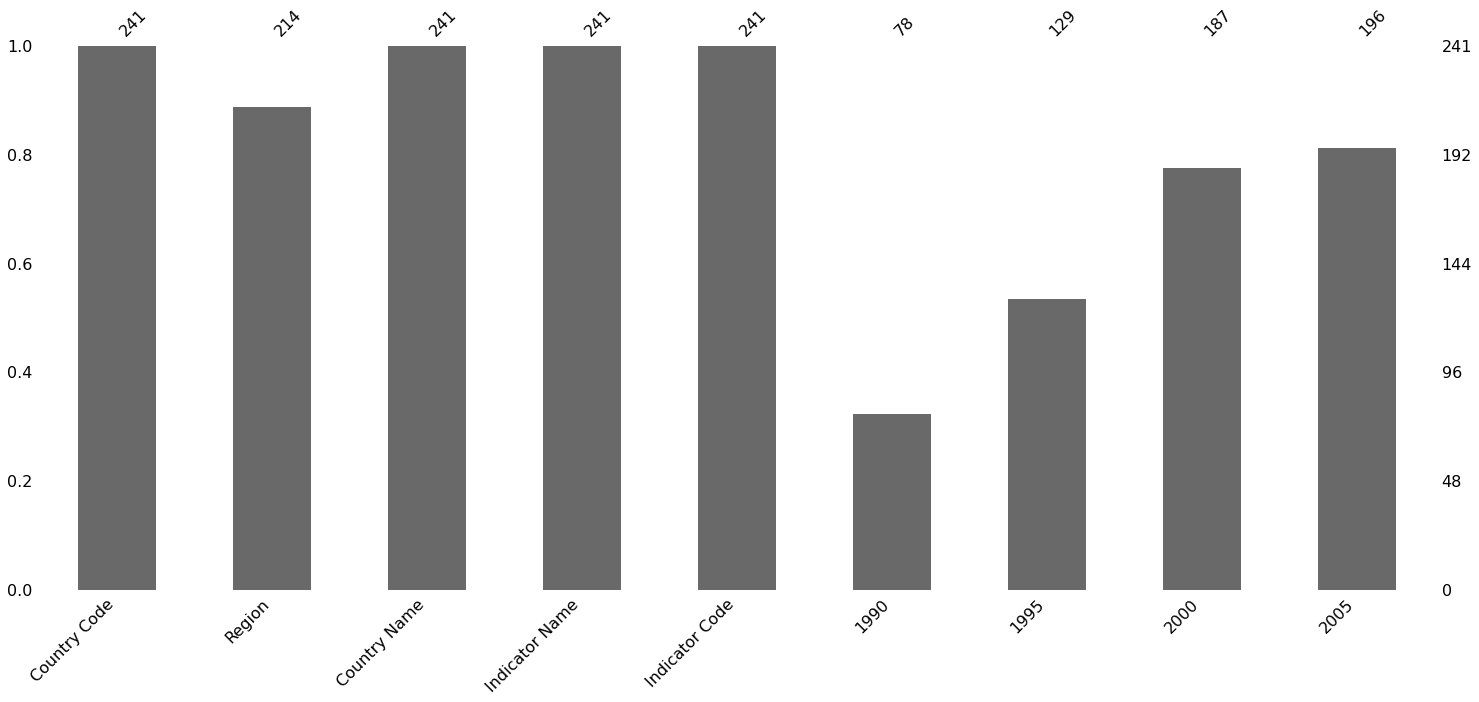

In [72]:
# Le nonmbre d'ordinateur personnel pour 100 personnes
DataCountry_comp.drop(columns=['1970','1975','1980','1985','2010','2015','2020', '2100'], inplace=True)
msno.bar(DataCountry_comp)

<AxesSubplot:>

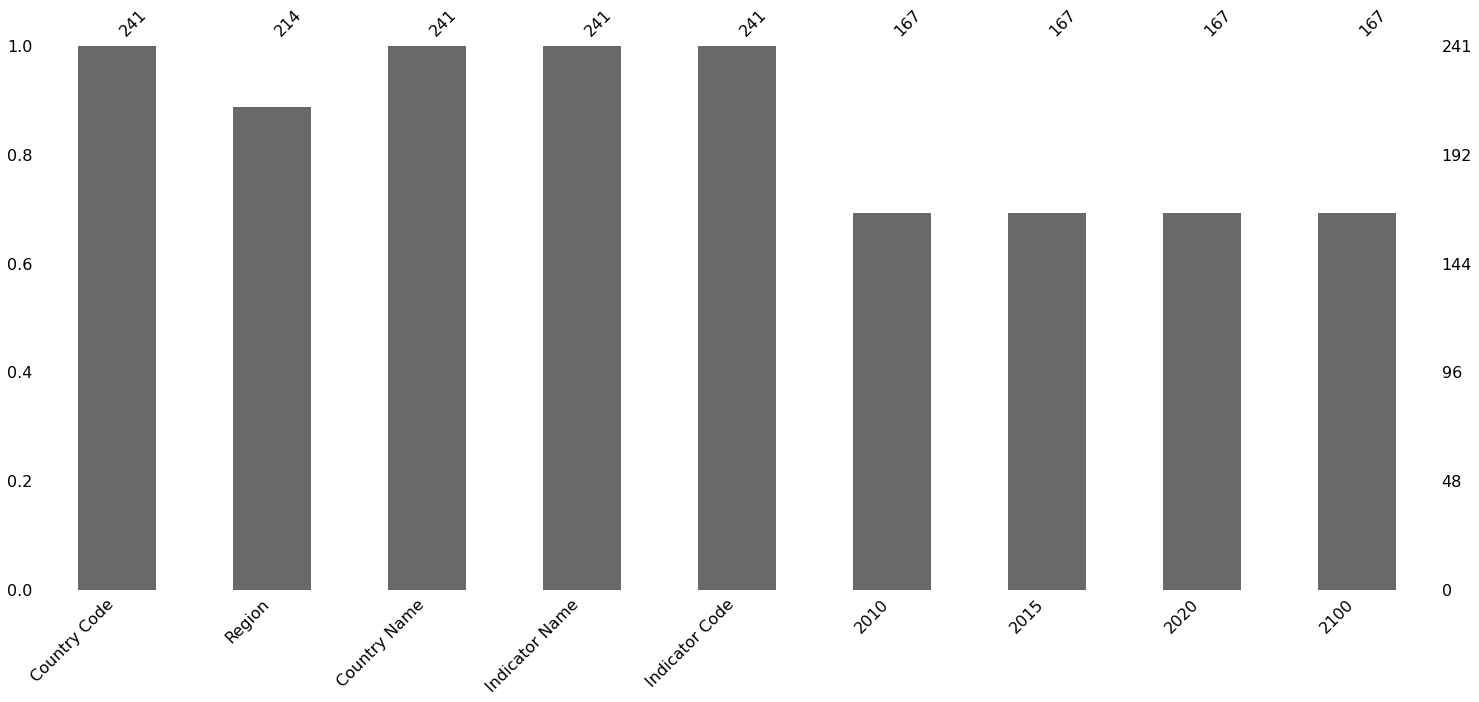

In [73]:
#Population âgée de 15 à 19 ans en milliers selon le plus haut niveau d'éducation atteint Secondaire supérieur total
DataCountry_pop.drop(columns=['1970','1975','1980','1985','1990', '1995','2000','2005'], inplace=True)
msno.bar(DataCountry_pop)

<AxesSubplot:>

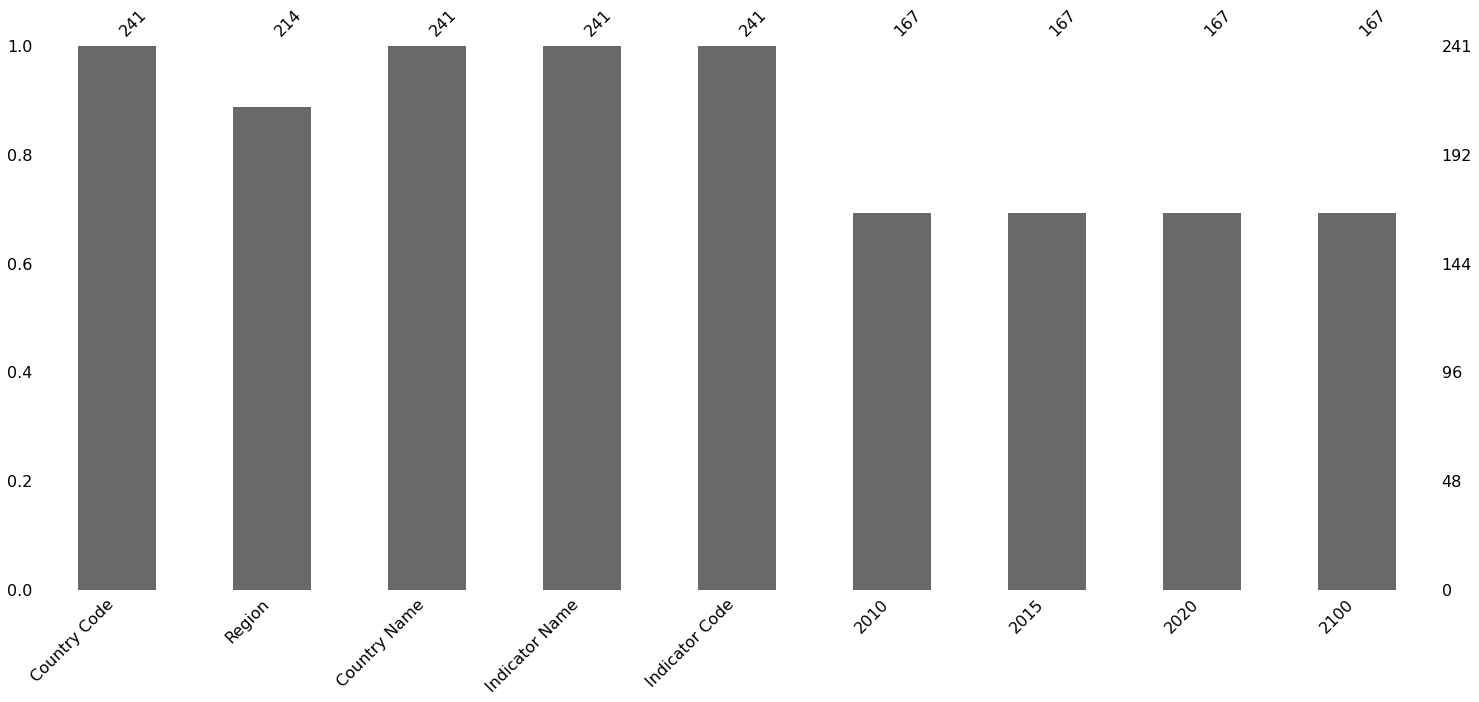

In [74]:
# années moyennes de scolarisation. 20-24 ans total
DataCountry_mean.drop(columns=['1970','1975','1980','1985','1990', '1995','2000','2005'], inplace=True)
msno.bar(DataCountry_mean)

<AxesSubplot:>

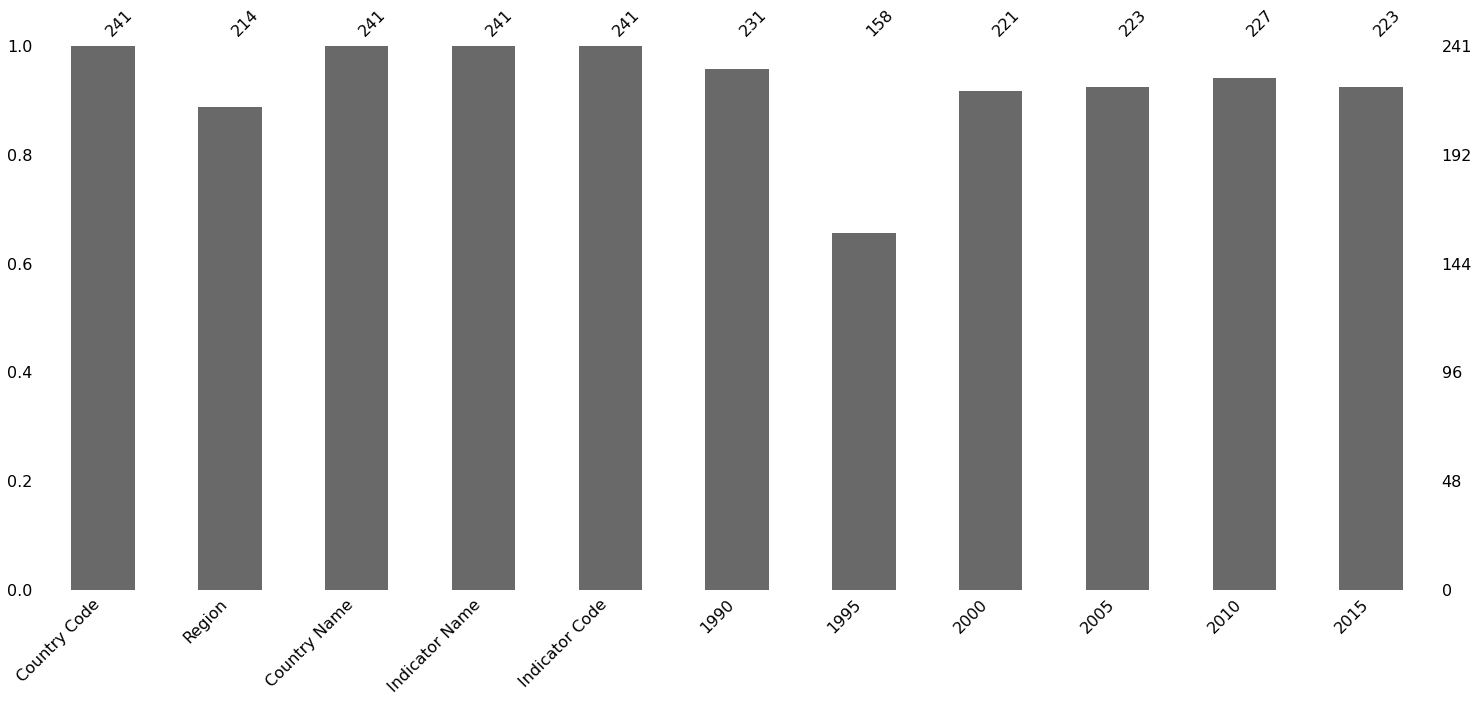

In [75]:
# Nombre d'internautes pour 100 personnes
DataCountry_int.drop(columns=['1970','1975','1980','1985','2020','2100'], inplace= True)
msno.bar(DataCountry_int)

<AxesSubplot:>

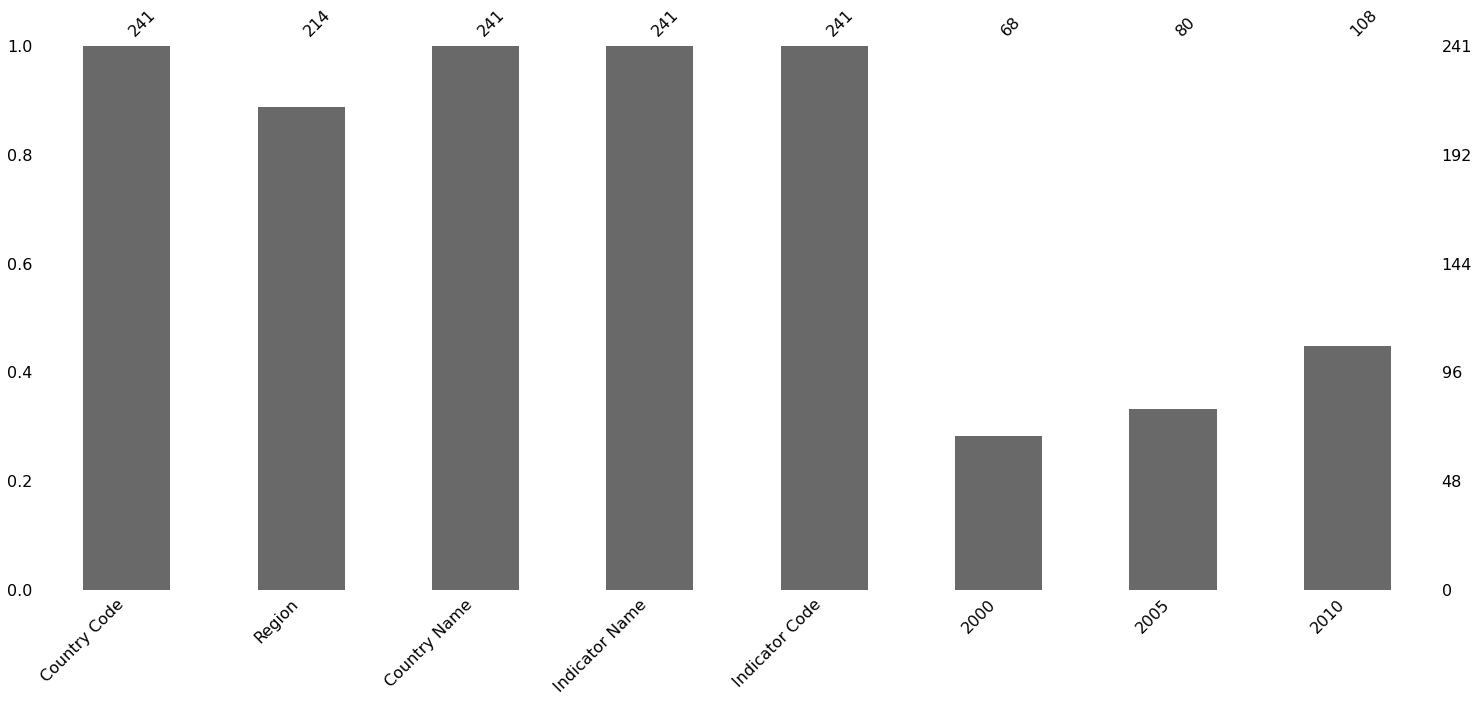

In [76]:
# Dépenses publiques pour l'enseignement secondaire
DataCountry_dep_sec_pib.drop(columns=['1970','1975','1980','1985','1990','1995','2015','2020','2100'], inplace= True)
msno.bar(DataCountry_dep_sec_pib)

<AxesSubplot:>

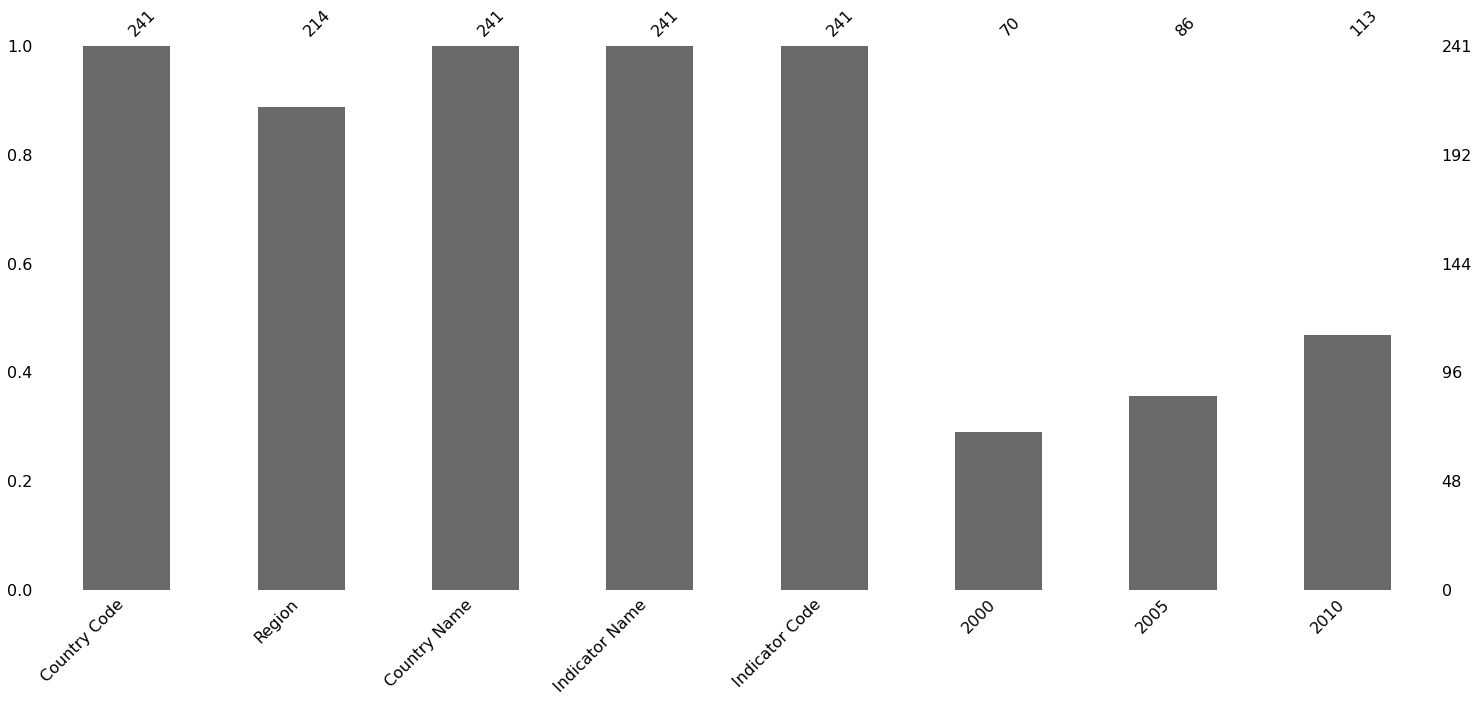

In [77]:
# Dépenses publiques pour l'enseignement supérieur
DataCountry_dep_sup_pib.drop(columns=['1970','1975','1980','1985','1990','1995','2015','2020','2100'], inplace = True)
msno.bar(DataCountry_dep_sup_pib)

<AxesSubplot:>

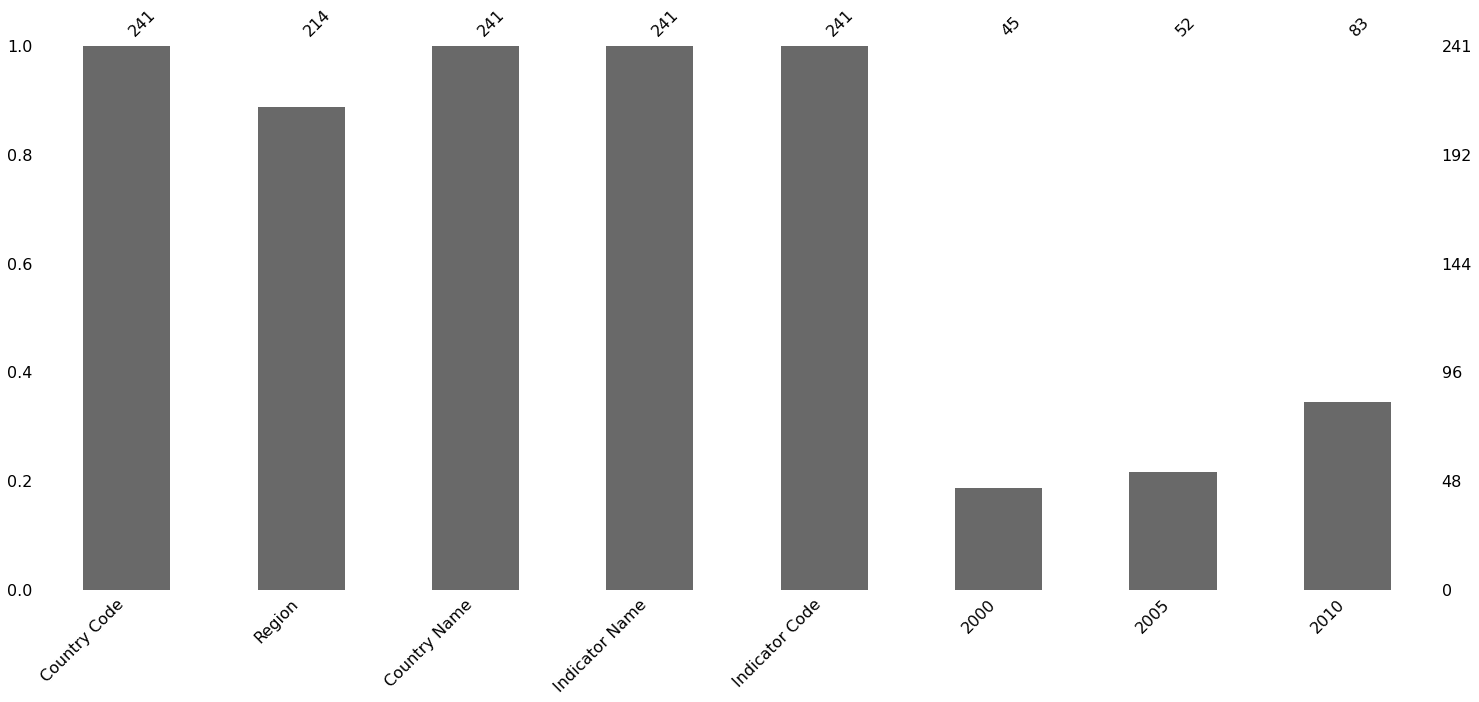

In [78]:
# Dépenses pour le deuxième cycle du secondaire par rapport des dépenses publiques totales
DataCountry_dep_sec_gouv.drop(columns=['1970','1975','1980','1985','1990','1995','2015','2020','2100'], inplace= True)
msno.bar(DataCountry_dep_sec_gouv)

<AxesSubplot:>

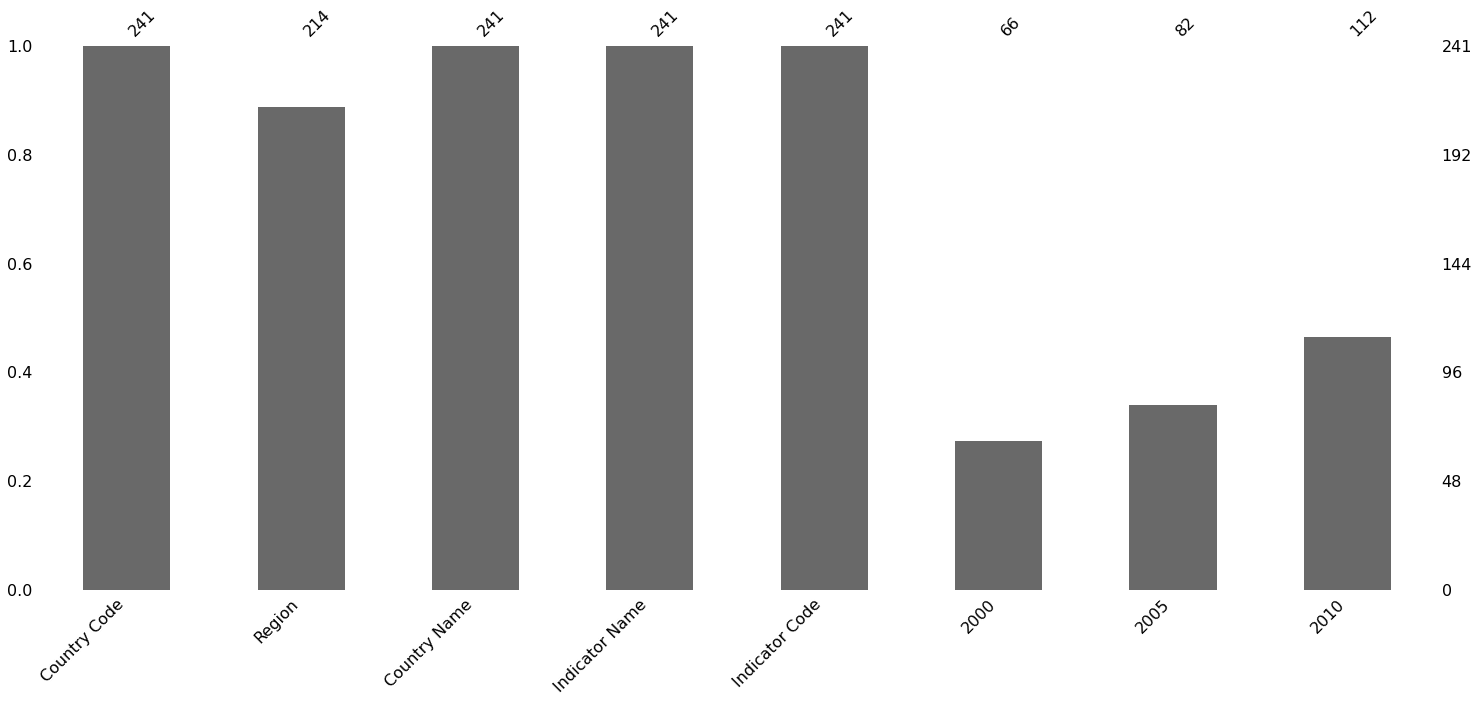

In [79]:
# Dépenses tertiaires en % des dépenses publiques totales 
DataCountry_dep_sup_gouv.drop(columns=['1970','1975','1980','1985','1990','1995','2015','2020','2100'], inplace= True)
msno.bar(DataCountry_dep_sup_gouv)

# Détermination des ordres de grandeurs pour chaque indicateur(moyenne,min, max,écart type)

In [80]:

# le nombre de personnes ayant un ordinateur personnel
DataCountry_comp['mean_comp']=DataCountry_comp[['1990','1995','2000','2005']].mean(axis=1)
DataCountry_comp['ecart_type_comp']=DataCountry_comp[['1990','1995','2000','2005']].std(axis=1)
DataCountry_comp['min_comp']=DataCountry_comp[['1990','1995','2000','2005']].min(axis=1)
DataCountry_comp['max_comp']=DataCountry_comp[['1990','1995','2000','2005']].max(axis=1)
DataCountry_comp['median_comp']=DataCountry_comp[['1990','1995','2000','2005']].median(axis=1)

# Le nombre d'internaute
DataCountry_int['mean_int']=DataCountry_int[['1995','2000','2005','2010','2015']].mean(axis=1)
DataCountry_int['ecart_type_int']=DataCountry_int[['1995','2000','2005','2010','2015']].std(axis=1)
DataCountry_int['min_int']=DataCountry_int[['1995','2000','2005','2010','2015']].min(axis=1)
DataCountry_int['max_int']=DataCountry_int[['1995','2000','2005','2010','2015']].max(axis=1)
DataCountry_int['median_int']=DataCountry_int[['1995','2000','2005','2010','2015']].median(axis=1)

# Population âgée de 15 à 19 ans
DataCountry_pop['mean_pop']=DataCountry_pop[['2010','2015','2020','2100']].mean(axis=1)
DataCountry_pop['ecart_type_pop']=DataCountry_pop[['2010','2015','2020','2100']].std(axis=1)
DataCountry_pop['min_pop']=DataCountry_pop[['2010','2015','2020','2100']].min(axis=1)
DataCountry_pop['max_pop']=DataCountry_pop[['2010','2015','2020','2100']].max(axis=1)
DataCountry_pop['median_pop']=DataCountry_pop[['2010','2015','2020','2100']].median(axis=1)

# Population âgée de 20 à 24 ans
DataCountry_mean['mean_ann']=DataCountry_mean[['2010','2015','2020','2100']].mean(axis=1)
DataCountry_mean['ecart_type_mean']=DataCountry_mean[['2010','2015','2020','2100']].std(axis=1)
DataCountry_mean['min_mean']=DataCountry_mean[['2010','2015','2020','2100']].min(axis=1)
DataCountry_mean['max_mean']=DataCountry_mean[['2010','2015','2020','2100']].max(axis=1)
DataCountry_mean['median_ann']=DataCountry_mean[['2010','2015','2020','2100']].median(axis=1)

# Dépense pour l'éducation secondaire par rapport au pib
DataCountry_dep_sec_pib['mean_sec_pib']=DataCountry_dep_sec_pib[['2000','2005','2010']].mean(axis=1)
DataCountry_dep_sec_pib['ecart_type_sec_pib']=DataCountry_dep_sec_pib[['2000','2005','2010']].std(axis=1)
DataCountry_dep_sec_pib['min_sec_pib']=DataCountry_dep_sec_pib[['2000','2005','2010']].min(axis=1)
DataCountry_dep_sec_pib['max_sec_pib']=DataCountry_dep_sec_pib[['2000','2005','2010']].max(axis=1)
DataCountry_dep_sec_pib['median_sec_pib']=DataCountry_dep_sec_pib[['2000','2005','2010']].median(axis=1)

#  Dépense pour l'éducation tertiaire par rapport au pib
DataCountry_dep_sup_pib['mean_sup_pib']=DataCountry_dep_sup_pib[['2000','2005','2010']].mean(axis=1)
DataCountry_dep_sup_pib['ecart_type_sup_pib']=DataCountry_dep_sup_pib[['2000','2005','2010']].std(axis=1)
DataCountry_dep_sup_pib['min_sup_pib']=DataCountry_dep_sup_pib[['2000','2005','2010']].min(axis=1)
DataCountry_dep_sup_pib['max_sup_pib']=DataCountry_dep_sup_pib[['2000','2005','2010']].max(axis=1)
DataCountry_dep_sup_pib['median_sup_pib']=DataCountry_dep_sup_pib[['2000','2005','2010']].median(axis=1)

# Dépense publique pour l'éducation secondaire par rapport au gouv
DataCountry_dep_sec_gouv['mean_sec_gouv']=DataCountry_dep_sec_gouv[['2000','2005','2010']].mean(axis=1)
DataCountry_dep_sec_gouv['ecart_type_sec_gouv']=DataCountry_dep_sec_gouv[['2000','2005','2010']].std(axis=1)
DataCountry_dep_sec_gouv['min_sec_gouv']=DataCountry_dep_sec_gouv[['2000','2005','2010']].min(axis=1)
DataCountry_dep_sec_gouv['max_sec_gouv']=DataCountry_dep_sec_gouv[['2000','2005','2010']].max(axis=1)
DataCountry_dep_sec_gouv['median_sec_gouv']=DataCountry_dep_sec_gouv[['2000','2005','2010']].median(axis=1)

# Dépense publique pour l'éducation tertiaire par rapport au gouv
DataCountry_dep_sup_gouv['mean_sup_gouv']=DataCountry_dep_sup_gouv[['2000','2005','2010']].mean(axis=1)
DataCountry_dep_sup_gouv['ecart_type_sup_gouv']=DataCountry_dep_sup_gouv[['2000','2005','2010']].std(axis=1)
DataCountry_dep_sup_gouv['min_sup_gouv']=DataCountry_dep_sup_gouv[['2000','2005','2010']].min(axis=1)
DataCountry_dep_sup_gouv['max_sup_gouv']=DataCountry_dep_sup_gouv[['2000','2005','2010']].max(axis=1)
DataCountry_dep_sup_gouv['median_sup_gouv']=DataCountry_dep_sup_gouv[['2000','2005','2010']].median(axis=1)  

# Affichage des statistiques pour chaque indicateur

####  Quelques visualisation des statisques des indicateus

In [81]:
# le nombre de personnes ayant un ordinateur personnel
DataCountry_comp.loc[:,['Country Name','mean_comp','ecart_type_comp','min_comp','max_comp','median_comp']].sort_values(by='max_comp',ascending=False)

Country Name  mean_comp  ecart_type_comp   min_comp  \
123029                     Canada  40.520798        34.066741  10.485292   
126694                Switzerland  47.468630        35.189940   8.990219   
599479                Netherlands  38.689215        33.655643   9.402068   
753409                     Sweden  42.436429        32.081087  10.515116   
716759                 San Marino  78.871080         4.303845  75.827802   
...                           ...        ...              ...        ...   
731419                South Sudan        NaN              NaN        NaN   
760739  Sint Maarten (Dutch part)        NaN              NaN        NaN   
771734   Turks and Caicos Islands        NaN              NaN        NaN   
793724                Timor-Leste        NaN              NaN        NaN   
867024                     Kosovo        NaN              NaN        NaN   

         max_comp  median_comp  
123029  87.728023    31.934938  
126694  86.790933    47.046685  
599479  85.528113    29.913338  
753409  83.586531    37.822034  
716759  81.914358    78.871080  
...           ...          ...  
731419        NaN          NaN  
760739        NaN          NaN  
771734        NaN          NaN  
793724        NaN          NaN  
867024        NaN          NaN  

[241 rows x 6 columns]

In [82]:
# Le nombre d'internaute
DataCountry_int.loc[:,['Country Name','mean_int','ecart_type_int','min_int','max_int','median_int']].sort_values(by='max_int',ascending=False)

Country Name   mean_int  ecart_type_int    min_int  \
93000                     Bermuda  59.553740       36.056851   6.838163   
375205                    Iceland  66.855282       37.713435  11.215876   
481490                 Luxembourg  56.486474       42.304443   1.590942   
16035                     Andorra  56.513650       39.592247  10.538836   
602435                     Norway  66.122704       37.750775   6.423220   
...                           ...        ...             ...        ...   
639085                      Palau        NaN             NaN        NaN   
730710                South Sudan        NaN             NaN        NaN   
760030  Sint Maarten (Dutch part)        NaN             NaN        NaN   
771025   Turks and Caicos Islands        NaN             NaN        NaN   
866315                     Kosovo        NaN             NaN        NaN   

         max_int  median_int  
93000   98.32361   65.447066  
375205  98.20000   87.000000  
481490  97.33410   70.000000  
16035   96.91000   59.302883  
602435  96.81030   81.990000  
...          ...         ...  
639085       NaN         NaN  
730710       NaN         NaN  
760030       NaN         NaN  
771025       NaN         NaN  
866315       NaN         NaN  

[241 rows x 6 columns]

In [83]:
# Population âgée de 15 à 19 ans
DataCountry_pop.loc[:,['Country Name','mean_pop','ecart_type_pop','min_pop','max_pop','median_pop']].sort_values(by='max_pop',ascending=False)

Country Name     mean_pop  ecart_type_pop    min_pop  \
861212                  World  176649.5575    25604.489073  156247.28   
362772                  India   49684.5650     6773.759651   42241.19   
139207                  China   33568.1525     7975.675184   21623.34   
593667                Nigeria    5658.2925     6195.834897    1939.64   
626652               Pakistan    6201.8675     3227.285301    4033.95   
...                       ...          ...             ...        ...   
828227    Upper middle income          NaN             NaN        NaN   
839222             Uzbekistan          NaN             NaN        NaN   
850217  Virgin Islands (U.S.)          NaN             NaN        NaN   
868542                 Kosovo          NaN             NaN        NaN   
872207            Yemen, Rep.          NaN             NaN        NaN   

          max_pop  median_pop  
861212  213485.77  168432.590  
362772   58082.00   49207.535  
139207   37976.33   37336.470  
593667   14915.93    2888.800  
626652   11001.87    4885.825  
...           ...         ...  
828227        NaN         NaN  
839222        NaN         NaN  
850217        NaN         NaN  
868542        NaN         NaN  
872207        NaN         NaN  

[241 rows x 6 columns]

In [84]:
# Population âgée de 20 à 24 ans
DataCountry_mean.loc[:,['Country Name','mean_ann','ecart_type_mean','min_mean','max_mean','median_ann']].sort_values(by='max_mean',ascending=False)

Country Name  mean_ann  ecart_type_mean  min_mean  max_mean  \
377191                Iceland    14.750         1.024695      13.8      16.2   
575101               Malaysia    13.850         1.300000      12.7      15.7   
366196                Ireland    14.925         0.340343      14.6      15.4   
538451                  Malta    13.925         0.853913      13.4      15.2   
615416            New Zealand    14.100         0.637704      13.5      15.0   
...                       ...       ...              ...       ...       ...   
827986    Upper middle income       NaN              NaN       NaN       NaN   
838981             Uzbekistan       NaN              NaN       NaN       NaN   
849976  Virgin Islands (U.S.)       NaN              NaN       NaN       NaN   
868301                 Kosovo       NaN              NaN       NaN       NaN   
871966            Yemen, Rep.       NaN              NaN       NaN       NaN   

        median_ann  
377191       14.50  
575101       13.50  
366196       14.85  
538451       13.55  
615416       13.95  
...            ...  
827986         NaN  
838981         NaN  
849976         NaN  
868301         NaN  
871966         NaN  

[241 rows x 6 columns]

In [85]:
# Dépense pour l'éducation secondaire par rapport au pi
DataCountry_dep_sec_pib.loc[:,['Country Name','mean_sec_pib','ecart_type_sec_pib','min_sec_pib','max_sec_pib','median_sec_pib']].sort_values(by='max_sec_pib',ascending=False)

Country Name  mean_sec_pib  ecart_type_sec_pib  min_sec_pib  \
114880               Botswana      4.230420                 NaN      4.23042   
169855                   Cuba      3.546173            0.551255      2.92494   
496040                Morocco      3.072950            0.813187      2.49794   
111215                 Bhutan      2.887040            1.016537      2.16824   
855210                Vanuatu      3.463010                 NaN      3.46301   
...                       ...           ...                 ...          ...   
844215          Venezuela, RB           NaN                 NaN          NaN   
847880  Virgin Islands (U.S.)           NaN                 NaN          NaN   
858875                  World           NaN                 NaN          NaN   
866205                 Kosovo           NaN                 NaN          NaN   
869870            Yemen, Rep.           NaN                 NaN          NaN   

        max_sec_pib  median_sec_pib  
114880      4.23042         4.23042  
169855      3.97693         3.73665  
496040      3.64796         3.07295  
111215      3.60584         2.88704  
855210      3.46301         3.46301  
...             ...             ...  
844215          NaN             NaN  
847880          NaN             NaN  
858875          NaN             NaN  
866205          NaN             NaN  
869870          NaN             NaN  

[241 rows x 6 columns]

In [86]:
#  Dépense pour l'éducation tertiaire par rapport au pib
DataCountry_dep_sup_pib.loc[:,['Country Name','mean_sup_pib','ecart_type_sup_pib','min_sup_pib','max_sup_pib','median_sup_pib']].sort_values(by='max_sup_pib',ascending=False)

Country Name  mean_sup_pib  ecart_type_sup_pib  min_sup_pib  \
474051                Lesotho       3.65541            2.453646      1.92042   
114881               Botswana       2.97579                 NaN      2.97579   
199176                Denmark       2.36619            0.054562      2.31796   
169856                   Cuba       1.84146            0.689599      1.35384   
96556                 Bolivia       1.92430            0.488130      1.57914   
...                       ...           ...                 ...          ...   
844216          Venezuela, RB           NaN                 NaN          NaN   
847881  Virgin Islands (U.S.)           NaN                 NaN          NaN   
858876                  World           NaN                 NaN          NaN   
866206                 Kosovo           NaN                 NaN          NaN   
869871            Yemen, Rep.           NaN                 NaN          NaN   

        max_sup_pib  median_sup_pib  
474051      5.39040         3.65541  
114881      2.97579         2.97579  
199176      2.42541         2.35520  
169856      2.32908         1.84146  
96556       2.26946         1.92430  
...             ...             ...  
844216          NaN             NaN  
847881          NaN             NaN  
858876          NaN             NaN  
866206          NaN             NaN  
869871          NaN             NaN  

[241 rows x 6 columns]

In [87]:
# Dépense publique pour l'éducation secondaire par rapport au gouv
DataCountry_dep_sec_gouv.loc[:,['Country Name','mean_sec_gouv','ecart_type_sec_gouv','min_sec_gouv','max_sec_gouv','median_sec_gouv']].sort_values(by='max_sec_gouv',ascending=False)

Country Name  mean_sec_gouv  ecart_type_sec_gouv  min_sec_gouv  \
855186             Vanuatu       8.169470                  NaN       8.16947   
532666                Mali       6.983220                  NaN       6.98322   
334756            Honduras       6.890260                  NaN       6.89026   
151506         Congo, Rep.       4.101370             3.788353       1.42260   
367741  Iran, Islamic Rep.       4.777525             0.706378       4.27804   
...                    ...            ...                  ...           ...   
858851               World            NaN                  NaN           NaN   
866181              Kosovo            NaN                  NaN           NaN   
869846         Yemen, Rep.            NaN                  NaN           NaN   
873511        South Africa            NaN                  NaN           NaN   
880841            Zimbabwe            NaN                  NaN           NaN   

        max_sec_gouv  median_sec_gouv  
855186       8.16947         8.169470  
532666       6.98322         6.983220  
334756       6.89026         6.890260  
151506       6.78014         4.101370  
367741       5.27701         4.777525  
...              ...              ...  
858851           NaN              NaN  
866181           NaN              NaN  
869846           NaN              NaN  
873511           NaN              NaN  
880841           NaN              NaN  

[241 rows x 6 columns]

In [88]:
# Dépense publique pour l'éducation tertiaire par rapport au gouv
DataCountry_dep_sup_gouv.loc[:,['Country Name','mean_sup_gouv','ecart_type_sup_gouv','min_sup_gouv','max_sup_gouv','median_sup_gouv']].sort_values(by='max_sup_gouv',ascending=False)

Country Name  mean_sup_gouv  ecart_type_sup_gouv  \
474024                Lesotho       7.509090             6.081868   
246794               Ethiopia      11.557090                  NaN   
488684       Macao SAR, China       7.587410                  NaN   
803874                Tunisia       6.371960             1.012444   
682929                 Rwanda       5.155207             1.870413   
...                       ...            ...                  ...   
844189          Venezuela, RB            NaN                  NaN   
847854  Virgin Islands (U.S.)            NaN                  NaN   
858849                  World            NaN                  NaN   
866179                 Kosovo            NaN                  NaN   
869844            Yemen, Rep.            NaN                  NaN   

        min_sup_gouv  max_sup_gouv  median_sup_gouv  
474024       3.20856      11.80962          7.50909  
246794      11.55709      11.55709         11.55709  
488684       7.58741       7.58741          7.58741  
803874       5.32534       7.34636          6.44418  
682929       3.95293       7.31016          4.20253  
...              ...           ...              ...  
844189           NaN           NaN              NaN  
847854           NaN           NaN              NaN  
858849           NaN           NaN              NaN  
866179           NaN           NaN              NaN  
869844           NaN           NaN              NaN  

[241 rows x 6 columns]

####  On voit qu'il y'a la présence des NaN sur l'affichage des statisques, utilisons la methode de fillna avec la stratégie " ffill "

## Pour l'indicateur: Nombre d'internautes

In [89]:
DataCountry_int.fillna(method= "ffill",inplace=True)
DataCountry_int.loc[:,['Country Name','mean_int','ecart_type_int','min_int','max_int','median_int']].sort_values(by=['mean_int','max_int'],ascending=False)

Country Name   mean_int  ecart_type_int    min_int  \
459500              Liechtenstein  69.131945       25.637914  36.515230   
375205                    Iceland  66.855282       37.713435  11.215876   
499815                     Monaco  66.503248       22.411960  42.184863   
602435                     Norway  66.122704       37.750775   6.423220   
752700                     Sweden  63.245175       37.483088   5.098024   
...                           ...        ...             ...        ...   
147975           Congo, Dem. Rep.   1.190985        1.764588   0.005902   
587775                      Niger   0.890956        1.109905   0.036261   
719715                    Somalia   0.714332        0.859759   0.000000   
235935                    Eritrea   0.457611        0.492489   0.000000   
653745  Korea, Dem. People’s Rep.   0.000000        0.000000   0.000000   

          max_int  median_int  
459500  96.641195   71.685678  
375205  98.200000   87.000000  
499815  93.363302   65.232413  
602435  96.810300   81.990000  
752700  90.610200   84.830000  
...           ...         ...  
147975   3.800000    0.479019  
587775   2.476220    0.525671  
719715   1.760000    0.548664  
235935   1.083733    0.373356  
653745   0.000000    0.000000  

[241 rows x 6 columns]

In [90]:
# La somme des valeurs nulles par colonne
DataCountry_int.isnull().sum()

Country Code      0
Region            0
Country Name      0
Indicator Name    0
Indicator Code    0
1990              0
1995              3
2000              0
2005              0
2010              0
2015              0
mean_int          0
ecart_type_int    0
min_int           0
max_int           0
median_int        0
dtype: int64

In [91]:
# Remplir les NaN par la moyenne
DataCountry_int["1995"].fillna(DataCountry_int["1995"].mean(), inplace = True)

In [92]:
# La somme des valeurs nulles par colonne
DataCountry_int.isnull().sum()

Country Code      0
Region            0
Country Name      0
Indicator Name    0
Indicator Code    0
1990              0
1995              0
2000              0
2005              0
2010              0
2015              0
mean_int          0
ecart_type_int    0
min_int           0
max_int           0
median_int        0
dtype: int64

In [93]:
DataCountry_int.fillna(method= "ffill",inplace=True)
DataCountry_int.loc[:,['Country Name','mean_int','ecart_type_int','min_int','max_int','median_int']].sort_values(by=['mean_int','max_int'],ascending=False)

Country Name   mean_int  ecart_type_int    min_int  \
459500              Liechtenstein  69.131945       25.637914  36.515230   
375205                    Iceland  66.855282       37.713435  11.215876   
499815                     Monaco  66.503248       22.411960  42.184863   
602435                     Norway  66.122704       37.750775   6.423220   
752700                     Sweden  63.245175       37.483088   5.098024   
...                           ...        ...             ...        ...   
147975           Congo, Dem. Rep.   1.190985        1.764588   0.005902   
587775                      Niger   0.890956        1.109905   0.036261   
719715                    Somalia   0.714332        0.859759   0.000000   
235935                    Eritrea   0.457611        0.492489   0.000000   
653745  Korea, Dem. People’s Rep.   0.000000        0.000000   0.000000   

          max_int  median_int  
459500  96.641195   71.685678  
375205  98.200000   87.000000  
499815  93.363302   65.232413  
602435  96.810300   81.990000  
752700  90.610200   84.830000  
...           ...         ...  
147975   3.800000    0.479019  
587775   2.476220    0.525671  
719715   1.760000    0.548664  
235935   1.083733    0.373356  
653745   0.000000    0.000000  

[241 rows x 6 columns]

## Nombre d'ordinateurs

In [94]:
DataCountry_comp.fillna(method= "ffill",inplace=True)
DataCountry_comp.loc[:,['Country Name','mean_comp','ecart_type_comp','min_comp','max_comp','median_comp']].sort_values(by=['mean_comp','max_comp'],ascending=False)

Country Name  mean_comp  ecart_type_comp   min_comp   max_comp  \
716759        San Marino  78.871080         4.303845  75.827802  81.914358   
287954         Gibraltar  54.842602         0.260070  54.842602  54.842602   
482199        Luxembourg  54.599910        12.360264  45.859884  63.339937   
126694       Switzerland  47.468630        35.189940   8.990219  86.790933   
130359   Channel Islands  47.468630        35.189940   8.990219  86.790933   
...                  ...        ...              ...        ...        ...   
408899          Cambodia   0.166193         0.146423   0.046429   0.329429   
570159            Malawi   0.150097         0.062373   0.105993   0.194201   
775399              Chad   0.146141         0.019274   0.132512   0.159770   
588484             Niger   0.060674         0.021464   0.045497   0.075851   
148684  Congo, Dem. Rep.   0.022211         0.511698   0.022211   0.022211   

        median_comp  
716759    78.871080  
287954    54.842602  
482199    54.599910  
126694    47.046685  
130359    47.046685  
...             ...  
408899     0.122721  
570159     0.150097  
775399     0.146141  
588484     0.060674  
148684     0.022211  

[241 rows x 6 columns]

In [95]:
# La somme des valeurs nulles par colonne
DataCountry_comp.isnull().sum()

Country Code       0
Region             0
Country Name       0
Indicator Name     0
Indicator Code     0
1990               7
1995               5
2000               2
2005               0
mean_comp          0
ecart_type_comp    2
min_comp           0
max_comp           0
median_comp        0
dtype: int64

In [96]:
# Remplir les NaN par la moyenne
DataCountry_comp["1990"].fillna(DataCountry_comp["1990"].mean(), inplace = True)
DataCountry_comp["1995"].fillna(DataCountry_comp["1995"].mean(), inplace = True)
DataCountry_comp["2000"].fillna(DataCountry_comp["2000"].mean(), inplace = True)
DataCountry_comp["ecart_type_comp"].fillna(DataCountry_comp["ecart_type_comp"].mean(), inplace = True)

In [97]:
# La somme des valeurs nulles par colonne
DataCountry_comp.isnull().sum()

Country Code       0
Region             0
Country Name       0
Indicator Name     0
Indicator Code     0
1990               0
1995               0
2000               0
2005               0
mean_comp          0
ecart_type_comp    0
min_comp           0
max_comp           0
median_comp        0
dtype: int64

In [98]:
DataCountry_comp.fillna(method= "ffill",inplace=True)
DataCountry_comp.loc[:,['Country Name','mean_comp','ecart_type_comp','min_comp','max_comp','median_comp']].sort_values(by=['mean_comp','max_comp'],ascending=False)

Country Name  mean_comp  ecart_type_comp   min_comp   max_comp  \
716759        San Marino  78.871080         4.303845  75.827802  81.914358   
287954         Gibraltar  54.842602         0.260070  54.842602  54.842602   
482199        Luxembourg  54.599910        12.360264  45.859884  63.339937   
126694       Switzerland  47.468630        35.189940   8.990219  86.790933   
130359   Channel Islands  47.468630        35.189940   8.990219  86.790933   
...                  ...        ...              ...        ...        ...   
408899          Cambodia   0.166193         0.146423   0.046429   0.329429   
570159            Malawi   0.150097         0.062373   0.105993   0.194201   
775399              Chad   0.146141         0.019274   0.132512   0.159770   
588484             Niger   0.060674         0.021464   0.045497   0.075851   
148684  Congo, Dem. Rep.   0.022211         0.511698   0.022211   0.022211   

        median_comp  
716759    78.871080  
287954    54.842602  
482199    54.599910  
126694    47.046685  
130359    47.046685  
...             ...  
408899     0.122721  
570159     0.150097  
775399     0.146141  
588484     0.060674  
148684     0.022211  

[241 rows x 6 columns]

## années moyennes de scolarisation. 20-24 ans

In [99]:
DataCountry_mean.fillna(method= "ffill",inplace=True)
DataCountry_mean.loc[:,['Country Name','mean_ann','ecart_type_mean','min_mean','max_mean','median_ann']].sort_values(by='max_mean',ascending=False)

Country Name  mean_ann  ecart_type_mean  min_mean  max_mean  \
377191                Iceland    14.750         1.024695      13.8      16.2   
575101               Malaysia    13.850         1.300000      12.7      15.7   
578766          North America    13.850         1.300000      12.7      15.7   
366196                Ireland    14.925         0.340343      14.6      15.4   
538451                  Malta    13.925         0.853913      13.4      15.2   
...                       ...       ...              ...       ...       ...   
443161                  Libya     4.550         3.714386       2.3      10.1   
509131             Madagascar     5.825         2.793296       4.1      10.0   
65666            Burkina Faso     4.400         3.614784       2.2       9.8   
740026  Sao Tome and Principe     6.875         2.048373       4.8       9.7   
589761                  Niger     4.075         3.628016       1.9       9.5   

        median_ann  
377191       14.50  
575101       13.50  
578766       13.50  
366196       14.85  
538451       13.55  
...            ...  
443161        2.90  
509131        4.60  
65666         2.80  
740026        6.50  
589761        2.45  

[241 rows x 6 columns]

In [100]:
# La somme des valeurs nulles par colonne
DataCountry_mean.isnull().sum()

Country Code       0
Region             0
Country Name       0
Indicator Name     0
Indicator Code     0
2010               0
2015               0
2020               0
2100               0
mean_ann           0
ecart_type_mean    0
min_mean           0
max_mean           0
median_ann         0
dtype: int64

## Population âgée de 15 à 19 ans

In [101]:
DataCountry_pop.fillna(method= "ffill",inplace=True)
DataCountry_pop.loc[:,['Country Name','mean_pop','ecart_type_pop','min_pop','max_pop','median_pop']].sort_values(by='max_pop',ascending=False)

Country Name     mean_pop  ecart_type_pop    min_pop  \
861212                       World  176649.5575    25604.489073  156247.28   
362772                       India   49684.5650     6773.759651   42241.19   
139207                       China   33568.1525     7975.675184   21623.34   
593667                     Nigeria    5658.2925     6195.834897    1939.64   
626652                    Pakistan    6201.8675     3227.285301    4033.95   
...                            ...          ...             ...        ...   
3602                         Aruba       1.5025        0.177459       1.38   
516702  Middle East & North Africa       0.7200        0.333866       0.54   
513037                    Maldives       0.7200        0.333866       0.54   
798907                       Tonga       0.9900        0.150333       0.86   
161197                     Comoros       0.4200        0.301441       0.19   

          max_pop  median_pop  
861212  213485.77  168432.590  
362772   58082.00   49207.535  
139207   37976.33   37336.470  
593667   14915.93    2888.800  
626652   11001.87    4885.825  
...           ...         ...  
3602         1.76       1.435  
516702       1.22       0.560  
513037       1.22       0.560  
798907       1.19       0.955  
161197       0.86       0.315  

[241 rows x 6 columns]

In [102]:
# La somme des valeurs nulles par colonne
DataCountry_pop.isnull().sum()

Country Code      0
Region            0
Country Name      0
Indicator Name    0
Indicator Code    0
2010              0
2015              0
2020              0
2100              0
mean_pop          0
ecart_type_pop    0
min_pop           0
max_pop           0
median_pop        0
dtype: int64

## Dépenses publiques pour l'enseignement secondaire par rapport au PIB

In [103]:
DataCountry_dep_sec_pib.fillna(method= "ffill",inplace=True)
DataCountry_dep_sec_pib.loc[:,['Country Name','mean_sec_pib','ecart_type_sec_pib','min_sec_pib','max_sec_pib','median_sec_pib']].sort_values(by='max_sec_pib',ascending=False)

Country Name  mean_sec_pib  ecart_type_sec_pib  \
114880                  Botswana      4.230420            1.016537   
169855                      Cuba      3.546173            0.551255   
177185            Cayman Islands      3.546173            0.551255   
173520                   Curacao      3.546173            0.551255   
496040                   Morocco      3.072950            0.813187   
...                          ...           ...                 ...   
415410       St. Kitts and Nevis      0.457720            0.054600   
316455                 Guatemala      0.288213            0.114877   
320120                      Guam      0.288213            0.114877   
118545  Central African Republic      0.289030            1.016537   
122210                    Canada      0.289030            1.016537   

        min_sec_pib  max_sec_pib  median_sec_pib  
114880      4.23042      4.23042         4.23042  
169855      2.92494      3.97693         3.73665  
177185      2.92494      3.97693         3.73665  
173520      2.92494      3.97693         3.73665  
496040      2.49794      3.64796         3.07295  
...             ...          ...             ...  
415410      0.45772      0.45772         0.45772  
316455      0.19173      0.41529         0.25762  
320120      0.19173      0.41529         0.25762  
118545      0.28903      0.28903         0.28903  
122210      0.28903      0.28903         0.28903  

[241 rows x 6 columns]

In [104]:
# La somme des valeurs nulles par colonne
DataCountry_dep_sec_pib.isnull().sum()

Country Code          0
Region                0
Country Name          0
Indicator Name        0
Indicator Code        0
2000                  0
2005                  0
2010                  4
mean_sec_pib          0
ecart_type_sec_pib    0
min_sec_pib           0
max_sec_pib           0
median_sec_pib        0
dtype: int64

In [105]:
# Remplir les NaN par la moyenne
DataCountry_dep_sec_pib["2010"].fillna(DataCountry_dep_sec_pib["2010"].mean(), inplace = True)

In [106]:
# La somme des valeurs nulles par colonne
DataCountry_dep_sec_pib.isnull().sum()

Country Code          0
Region                0
Country Name          0
Indicator Name        0
Indicator Code        0
2000                  0
2005                  0
2010                  0
mean_sec_pib          0
ecart_type_sec_pib    0
min_sec_pib           0
max_sec_pib           0
median_sec_pib        0
dtype: int64

##  Dépenses publiques pour l'enseignement supérieur par rapport au PIB

In [107]:
DataCountry_dep_sup_pib.fillna(method= "ffill",inplace=True)
DataCountry_dep_sup_pib.loc[:,['Country Name','mean_sup_pib','ecart_type_sup_pib','min_sup_pib','max_sup_pib','median_sup_pib']].sort_values(by='max_sup_pib',ascending=False)

Country Name  mean_sup_pib  \
474051                                      Lesotho      3.655410   
114881                                     Botswana      2.975790   
210171  East Asia & Pacific (excluding high income)      2.366190   
202841                           Dominican Republic      2.366190   
221166                        Europe & Central Asia      2.366190   
...                                             ...           ...   
23256                          United Arab Emirates      0.090255   
19591                                    Arab World      0.090255   
15926                                       Andorra      0.090255   
298131                                Guinea-Bissau      0.093450   
301796                            Equatorial Guinea      0.093450   

        ecart_type_sup_pib  min_sup_pib  max_sup_pib  median_sup_pib  
474051            2.453646      1.92042      5.39040        3.655410  
114881            0.274110      2.97579      2.97579        2.975790  
210171            0.054562      2.31796      2.42541        2.355200  
202841            0.054562      2.31796      2.42541        2.355200  
221166            0.054562      2.31796      2.42541        2.355200  
...                    ...          ...          ...             ...  
23256             0.039775      0.06213      0.11838        0.090255  
19591             0.039775      0.06213      0.11838        0.090255  
15926             0.039775      0.06213      0.11838        0.090255  
298131            0.175278      0.09345      0.09345        0.093450  
301796            0.175278      0.09345      0.09345        0.093450  

[241 rows x 6 columns]

In [108]:
# La somme des valeurs nulles par colonne
DataCountry_dep_sup_pib.isnull().sum()

Country Code          0
Region                0
Country Name          0
Indicator Name        0
Indicator Code        0
2000                  0
2005                  0
2010                  4
mean_sup_pib          0
ecart_type_sup_pib    0
min_sup_pib           0
max_sup_pib           0
median_sup_pib        0
dtype: int64

In [109]:
# Remplir les NaN par la moyenne
DataCountry_dep_sup_pib["2010"].fillna(DataCountry_dep_sup_pib["2010"].mean(), inplace = True)

In [110]:
# La somme des valeurs nulles par colonne
DataCountry_dep_sup_pib.isnull().sum()

Country Code          0
Region                0
Country Name          0
Indicator Name        0
Indicator Code        0
2000                  0
2005                  0
2010                  0
mean_sup_pib          0
ecart_type_sup_pib    0
min_sup_pib           0
max_sup_pib           0
median_sup_pib        0
dtype: int64

## Dépenses du secondaire par rapport des dépenses publiques totales

In [111]:
DataCountry_dep_sec_gouv.fillna(method= "ffill",inplace=True)
DataCountry_dep_sec_gouv.loc[:,['Country Name','mean_sec_gouv','ecart_type_sec_gouv','min_sec_gouv','max_sec_gouv','median_sec_gouv']].sort_values(by='max_sec_gouv',ascending=False)

Country Name  mean_sec_gouv  \
858851                                   World       8.169470   
855186                                 Vanuatu       8.169470   
532666                                    Mali       6.983220   
338421  Heavily indebted poor countries (HIPC)       6.890260   
334756                                Honduras       6.890260   
...                                        ...            ...   
638951                                   Palau       0.654595   
635286                             Philippines       0.654595   
594971                               Nicaragua       0.368040   
1241                                     Aruba            NaN   
4906                               Afghanistan            NaN   

        ecart_type_sec_gouv  min_sec_gouv  max_sec_gouv  median_sec_gouv  
858851             0.192269       8.16947       8.16947         8.169470  
855186             0.192269       8.16947       8.16947         8.169470  
532666             0.051788       6.98322       6.98322         6.983220  
338421             0.494576       6.89026       6.89026         6.890260  
334756             0.494576       6.89026       6.89026         6.890260  
...                     ...           ...           ...              ...  
638951             0.033043       0.63123       0.67796         0.654595  
635286             0.033043       0.63123       0.67796         0.654595  
594971             0.051788       0.36804       0.36804         0.368040  
1241                    NaN           NaN           NaN              NaN  
4906                    NaN           NaN           NaN              NaN  

[241 rows x 6 columns]

In [112]:
# La somme des valeurs nulles par colonne
DataCountry_dep_sec_gouv.isnull().sum()

Country Code           0
Region                 0
Country Name           0
Indicator Name         0
Indicator Code         0
2000                   7
2005                   2
2010                   7
mean_sec_gouv          2
ecart_type_sec_gouv    7
min_sec_gouv           2
max_sec_gouv           2
median_sec_gouv        2
dtype: int64

In [113]:
# Remplir les NaN par la moyenne
DataCountry_dep_sec_gouv["2000"].fillna(DataCountry_dep_sec_gouv["2000"].mean(), inplace = True)
DataCountry_dep_sec_gouv["2005"].fillna(DataCountry_dep_sec_gouv["2005"].mean(), inplace = True)
DataCountry_dep_sec_gouv["2010"].fillna(DataCountry_dep_sec_gouv["2010"].mean(), inplace = True)
DataCountry_dep_sec_gouv["mean_sec_gouv"].fillna(DataCountry_dep_sec_gouv["mean_sec_gouv"].mean(), inplace = True)
DataCountry_dep_sec_gouv["ecart_type_sec_gouv"].fillna(DataCountry_dep_sec_gouv["ecart_type_sec_gouv"].mean(), inplace = True)
DataCountry_dep_sec_gouv["min_sec_gouv"].fillna(DataCountry_dep_sec_gouv["min_sec_gouv"].mean(), inplace = True)
DataCountry_dep_sec_gouv["max_sec_gouv"].fillna(DataCountry_dep_sec_gouv["max_sec_gouv"].mean(), inplace = True)
DataCountry_dep_sec_gouv["median_sec_gouv"].fillna(DataCountry_dep_sec_gouv["median_sec_gouv"].mean(), inplace = True)

In [114]:
# La somme des valeurs nulles par colonne
DataCountry_dep_sec_gouv.isnull().sum()

Country Code           0
Region                 0
Country Name           0
Indicator Name         0
Indicator Code         0
2000                   0
2005                   0
2010                   0
mean_sec_gouv          0
ecart_type_sec_gouv    0
min_sec_gouv           0
max_sec_gouv           0
median_sec_gouv        0
dtype: int64

## Dépenses tertiaires par rapport des dépenses publiques totales 

In [115]:
DataCountry_dep_sup_gouv.fillna(method= "ffill",inplace=True)
DataCountry_dep_sup_gouv.loc[:,['Country Name','mean_sup_gouv','ecart_type_sup_gouv','min_sup_gouv','max_sup_gouv','median_sup_gouv']].sort_values(by='max_sup_gouv',ascending=False)

Country Name  mean_sup_gouv  ecart_type_sup_gouv  \
474024                   Lesotho        7.50909             6.081868   
250459            European Union       11.55709             0.157105   
246794                  Ethiopia       11.55709             0.157105   
492349  St. Martin (French part)        7.58741             0.352556   
488684          Macao SAR, China        7.58741             0.352556   
...                          ...            ...                  ...   
444704                 St. Lucia        0.65270             0.648622   
327424               High income        0.63378             1.138534   
323759                    Guyana        0.63378             1.138534   
301769         Equatorial Guinea        0.49936             0.700835   
298104             Guinea-Bissau        0.49936             0.700835   

        min_sup_gouv  max_sup_gouv  median_sup_gouv  
474024       3.20856      11.80962          7.50909  
250459      11.55709      11.55709         11.55709  
246794      11.55709      11.55709         11.55709  
492349       7.58741       7.58741          7.58741  
488684       7.58741       7.58741          7.58741  
...              ...           ...              ...  
444704       0.65270       0.65270          0.65270  
327424       0.63378       0.63378          0.63378  
323759       0.63378       0.63378          0.63378  
301769       0.49936       0.49936          0.49936  
298104       0.49936       0.49936          0.49936  

[241 rows x 6 columns]

In [116]:
# La somme des valeurs nulles par colonne
DataCountry_dep_sup_gouv.isnull().sum()

Country Code           0
Region                 0
Country Name           0
Indicator Name         0
Indicator Code         0
2000                   0
2005                   0
2010                   7
mean_sup_gouv          0
ecart_type_sup_gouv    0
min_sup_gouv           0
max_sup_gouv           0
median_sup_gouv        0
dtype: int64

In [117]:
# Remplir les NaN par la moyenne
DataCountry_dep_sup_gouv["2010"].fillna(DataCountry_dep_sup_gouv["2010"].mean(), inplace = True)

In [118]:
# La somme des valeurs nulles par colonne
DataCountry_dep_sup_gouv.isnull().sum()

Country Code           0
Region                 0
Country Name           0
Indicator Name         0
Indicator Code         0
2000                   0
2005                   0
2010                   0
mean_sup_gouv          0
ecart_type_sup_gouv    0
min_sup_gouv           0
max_sup_gouv           0
median_sup_gouv        0
dtype: int64

# Les statistiques par région avec les indicateurs

### Nombre d'ordinateurs par région

In [119]:
# Nombre d'ordinateurs
liste1=[DataCountry_comp.groupby(['Region'])[['mean_comp']].mean(),
DataCountry_comp.groupby(['Region'])[['ecart_type_comp']].std(),
DataCountry_comp.groupby(['Region'])[['min_comp']].min(),
DataCountry_comp.groupby(['Region'])[['max_comp']].min(),
DataCountry_comp.groupby(['Region'])[['median_comp']].median()   ]

df=liste1[0]
for d in liste1[1:]:
    df=pd.merge(df,d,left_on='Region',right_on='Region')
df.sort_values(by= ["mean_comp","max_comp"], ascending=False)

mean_comp  ecart_type_comp   min_comp   max_comp  \
Region                                                                         
North America               42.503709        11.771582  10.485292  47.742572   
Europe & Central Asia       15.908705        10.508510   0.058769   0.757797   
East Asia & Pacific          9.816982         8.176316   0.006342   0.329429   
Latin America & Caribbean    7.320935         5.862661   0.172770   0.172770   
Middle East & North Africa   6.880750         5.933515   0.087112   1.030597   
Sub-Saharan Africa           3.255641         2.866774   0.004977   0.022211   
South Asia                   1.476276         2.426557   0.017317   0.341903   

                            median_comp  
Region                                   
North America                 40.156074  
Europe & Central Asia          7.094825  
East Asia & Pacific            4.284052  
Latin America & Caribbean      3.954614  
Middle East & North Africa     3.635645  
Sub-Saharan Africa             0.607906  
South Asia                     0.438149

### Nombre d'internautes par région

In [120]:
# Nombre d'internautes 
liste2=[DataCountry_int.groupby(['Region'])[['mean_int']].mean(),
DataCountry_int.groupby(['Region'])[['ecart_type_int']].std(),
DataCountry_int.groupby(['Region'])[['min_int']].min(),
DataCountry_int.groupby(['Region'])[['max_int']].max(),
DataCountry_int.groupby(['Region'])[['median_int']].median()]

df=liste2[0]
for d in liste2[1:]:
    df=pd.merge(df,d,left_on='Region',right_on='Region')
df.sort_values(by= ["mean_int","max_int"], ascending=False)

mean_int  ecart_type_int   min_int    max_int  \
Region                                                                       
North America               57.346049        4.357227  4.163525  98.323610   
Europe & Central Asia       37.200035        8.767617  0.000000  98.200000   
Middle East & North Africa  23.909494        9.592675  0.000000  93.478301   
East Asia & Pacific         22.993798       10.169006  0.000000  91.058028   
Latin America & Caribbean   22.234460        8.300332  0.000000  88.661227   
South Asia                   9.404518        5.907854  0.000000  54.461955   
Sub-Saharan Africa           7.962026        6.650321  0.000000  70.630896   

                            median_int  
Region                                  
North America                67.968053  
Europe & Central Asia        38.155000  
Middle East & North Africa   12.932852  
East Asia & Pacific           8.523257  
Latin America & Caribbean    16.814895  
South Asia                    3.839149  
Sub-Saharan Africa            2.456089

### Années moyennes de scolarisation 20-24 ans

In [121]:
# Années moyennes de scolarisation 20-24 ans
liste3=[DataCountry_mean.groupby(['Region'])[['mean_ann']].mean(),
DataCountry_mean.groupby(['Region'])[['ecart_type_mean']].std(),
DataCountry_mean.groupby(['Region'])[['min_mean']].min(),
DataCountry_mean.groupby(['Region'])[['max_mean']].max(),
DataCountry_mean.groupby(['Region'])[['median_ann']].median()  ]

df=liste3[0]
for d in liste3[1:]:
    df=pd.merge(df,d,left_on='Region',right_on='Region')
df.sort_values(by= "max_mean", ascending=False)

mean_ann  ecart_type_mean  min_mean  max_mean  \
Region                                                                       
Europe & Central Asia       12.015417         0.496433       6.6      16.2   
East Asia & Pacific         11.302439         0.720219       5.7      15.7   
Middle East & North Africa  11.280556         0.686619       2.3      15.2   
Latin America & Caribbean   10.763043         0.604020       5.7      14.1   
South Asia                  10.079167         0.795297       5.7      14.1   
Sub-Saharan Africa           7.995673         0.992105       1.9      14.1   
North America               11.833333         1.299064       7.6      14.0   

                            median_ann  
Region                                  
Europe & Central Asia           12.075  
East Asia & Pacific             10.750  
Middle East & North Africa      11.400  
Latin America & Caribbean       10.575  
South Asia                       9.150  
Sub-Saharan Africa               7.250  
North America                   12.450

### Population âgé de 15-19 ans

In [122]:
# Années moyennes de scolarisation 15-19 ans
liste4=[DataCountry_pop.groupby(['Region'])[['mean_pop']].mean(),
DataCountry_pop.groupby(['Region'])[['ecart_type_pop']].std(),
DataCountry_pop.groupby(['Region'])[['min_pop']].min(),
DataCountry_pop.groupby(['Region'])[['max_pop']].max(),
DataCountry_pop.groupby(['Region'])[['median_pop']].median() ]  


df=liste4[0]
for d in liste4[1:]:
    df=pd.merge(df,d,left_on='Region',right_on='Region')
df.sort_values(by= "max_pop", ascending=False)

mean_pop  ecart_type_pop  min_pop    max_pop  \
Region                                                                        
East Asia & Pacific         6148.406524     4129.217632     0.86  213485.77   
South Asia                  5029.777500     2051.125643     0.54   58082.00   
Sub-Saharan Africa           323.846106      864.530672     0.19   14915.93   
Europe & Central Asia        550.181125      310.764263     1.23   10667.57   
North America               3047.330000     1117.405374     2.29   10667.57   
Middle East & North Africa   704.105741      207.381974     1.23    4707.15   
Latin America & Caribbean    369.099402      112.885937     1.38    3935.96   

                            median_pop  
Region                                  
East Asia & Pacific           227.4350  
South Asia                      4.4325  
Sub-Saharan Africa             22.9825  
Europe & Central Asia         125.6500  
North America                1439.3650  
Middle East & North Africa    262.0250  
Latin America & Caribbean      92.2350

### Dépenses publiques pour l'enseignement secondaire par rapport au PIB

In [123]:
# Années moyennes de scolarisation 20-24 ans
liste5=[DataCountry_dep_sec_pib.groupby(['Region'])[['mean_sec_pib']].mean(),
DataCountry_dep_sec_pib.groupby(['Region'])[['ecart_type_sec_pib']].std(),
DataCountry_dep_sec_pib.groupby(['Region'])[['min_sec_pib']].min(),
DataCountry_dep_sec_pib.groupby(['Region'])[['max_sec_pib']].max(),
DataCountry_dep_sec_pib.groupby(['Region'])[['median_sec_pib']].median() ]


df=liste5[0]
for d in liste5[1:]:
    df=pd.merge(df,d,left_on='Region',right_on='Region')
df.sort_values(by= "max_sec_pib", ascending=False)

mean_sec_pib  ecart_type_sec_pib  min_sec_pib  \
Region                                                                      
Sub-Saharan Africa              1.290963            0.325631      0.25146   
Latin America & Caribbean       1.559080            0.218924      0.19173   
Middle East & North Africa      1.667404            0.244615      0.32995   
South Asia                      1.116465            0.276142      0.65327   
East Asia & Pacific             1.622604            0.095136      0.19173   
Europe & Central Asia           1.798283            0.095768      0.32995   
North America                   1.080706            0.529735      0.28903   

                            max_sec_pib  median_sec_pib  
Region                                                   
Sub-Saharan Africa              4.23042        1.100965  
Latin America & Caribbean       3.97693        1.513357  
Middle East & North Africa      3.64796        1.674960  
South Asia                      3.60584        0.914250  
East Asia & Pacific             3.46301        1.528855  
Europe & Central Asia           3.39859        1.845690  
North America                   1.91956        1.120380

### Dépenses publiques pour l'enseignement supérieur par rapport au PIB

In [124]:
# Dépenses publiques pour l'enseignement supérieur par rapport au PIB
liste6=[DataCountry_dep_sup_pib.groupby(['Region'])[['mean_sup_pib']].mean(),
DataCountry_dep_sup_pib.groupby(['Region'])[['ecart_type_sup_pib']].std(),
DataCountry_dep_sup_pib.groupby(['Region'])[['min_sup_pib']].min(),
DataCountry_dep_sup_pib.groupby(['Region'])[['max_sup_pib']].max(),
DataCountry_dep_sup_pib.groupby(['Region'])[['median_sup_pib']].median()]


df=liste6[0]
for d in liste6[1:]:
    df=pd.merge(df,d,left_on='Region',right_on='Region')
df.sort_values(by= "max_sup_pib", ascending=False)

mean_sup_pib  ecart_type_sup_pib  min_sup_pib  \
Region                                                                      
Sub-Saharan Africa              0.903098            0.362907      0.05939   
Europe & Central Asia           1.019043            0.099691      0.06213   
Latin America & Caribbean       0.864019            0.206175      0.05939   
Middle East & North Africa      1.203885            0.182393      0.05939   
East Asia & Pacific             0.876671            0.130313      0.18532   
North America                   1.202278            0.108212      0.35654   
South Asia                      0.450243            0.110058      0.21496   

                            max_sup_pib  median_sup_pib  
Region                                                   
Sub-Saharan Africa              5.39040        0.705115  
Europe & Central Asia           2.42541        1.083345  
Latin America & Caribbean       2.42541        0.787382  
Middle East & North Africa      2.42541        1.064210  
East Asia & Pacific             1.92755        0.854100  
North America                   1.90082        1.349475  
South Asia                      1.19759        0.388150

### Dépenses du secondaire par rapport des dépenses publiques totales

In [125]:
# Dépenses du secondaire par rapport des dépenses publiques totales
liste7=[DataCountry_dep_sec_gouv.groupby(['Region'])[['mean_sec_gouv']].mean(),
DataCountry_dep_sec_gouv.groupby(['Region'])[['ecart_type_sec_gouv']].std(),
DataCountry_dep_sec_gouv.groupby(['Region'])[['min_sec_gouv']].min(),
DataCountry_dep_sec_gouv.groupby(['Region'])[['max_sec_gouv']].max(),
DataCountry_dep_sec_gouv.groupby(['Region'])[['median_sec_gouv']].median()  ]

df=liste7[0]
for d in liste7[1:]:
    df=pd.merge(df,d,left_on='Region',right_on='Region')
df.sort_values(by= "max_sec_gouv", ascending=False)

mean_sec_gouv  ecart_type_sec_gouv  min_sec_gouv  \
Region                                                                         
East Asia & Pacific              2.485159             0.298715       0.44427   
Sub-Saharan Africa               2.106458             0.573598       0.12995   
Europe & Central Asia            2.505079             0.265006       1.41874   
Latin America & Caribbean        2.351562             0.298946       0.36804   
Middle East & North Africa       2.599338             0.310291       1.30217   
South Asia                       2.325876             0.187445       1.07031   
North America                    2.250975             0.158341       0.77677   

                            max_sec_gouv  median_sec_gouv  
Region                                                     
East Asia & Pacific              8.16947         2.408900  
Sub-Saharan Africa               6.98322         2.116440  
Europe & Central Asia            6.89026         2.411835  
Latin America & Caribbean        6.89026         2.238745  
Middle East & North Africa       5.27701         2.545350  
South Asia                       4.56293         2.290140  
North America                    3.63890         2.483125

### Dépenses du supérieur par rapport des dépenses publiques totales

In [126]:
# Dépenses du secondaire par rapport des dépenses publiques totales
liste8=[DataCountry_dep_sup_gouv.groupby(['Region'])[['mean_sup_gouv']].mean(),
DataCountry_dep_sup_gouv.groupby(['Region'])[['ecart_type_sup_gouv']].std(),
DataCountry_dep_sup_gouv.groupby(['Region'])[['min_sup_gouv']].min(),
DataCountry_dep_sup_gouv.groupby(['Region'])[['max_sup_gouv']].max(),
DataCountry_dep_sup_gouv.groupby(['Region'])[['median_sup_gouv']].median() ]

df=liste8[0]
for d in liste8[1:]:
    df=pd.merge(df,d,left_on='Region',right_on='Region')
df.sort_values(by= "max_sup_gouv", ascending=False)

mean_sup_gouv  ecart_type_sup_gouv  min_sup_gouv  \
Region                                                                         
Sub-Saharan Africa               3.359304             0.993771       0.25616   
East Asia & Pacific              3.091150             0.464528       0.89550   
Latin America & Caribbean        2.730322             0.550371       0.25616   
Middle East & North Africa       3.405307             0.626627       0.25616   
Europe & Central Asia            2.572513             0.279452       0.65270   
North America                    3.245730             0.270049       1.74402   
South Asia                       2.057007             0.355024       0.76789   

                            max_sup_gouv  median_sup_gouv  
Region                                                     
Sub-Saharan Africa              11.80962         2.671200  
East Asia & Pacific              7.58741         2.529990  
Latin America & Caribbean        7.58741         2.385735  
Middle East & North Africa       7.34636         3.722200  
Europe & Central Asia            5.42131         2.543512  
North America                    4.35289         3.640280  
South Asia                       4.23639         1.941410

# Visualisation des moyennes(diagramme en moustache et histogramme)

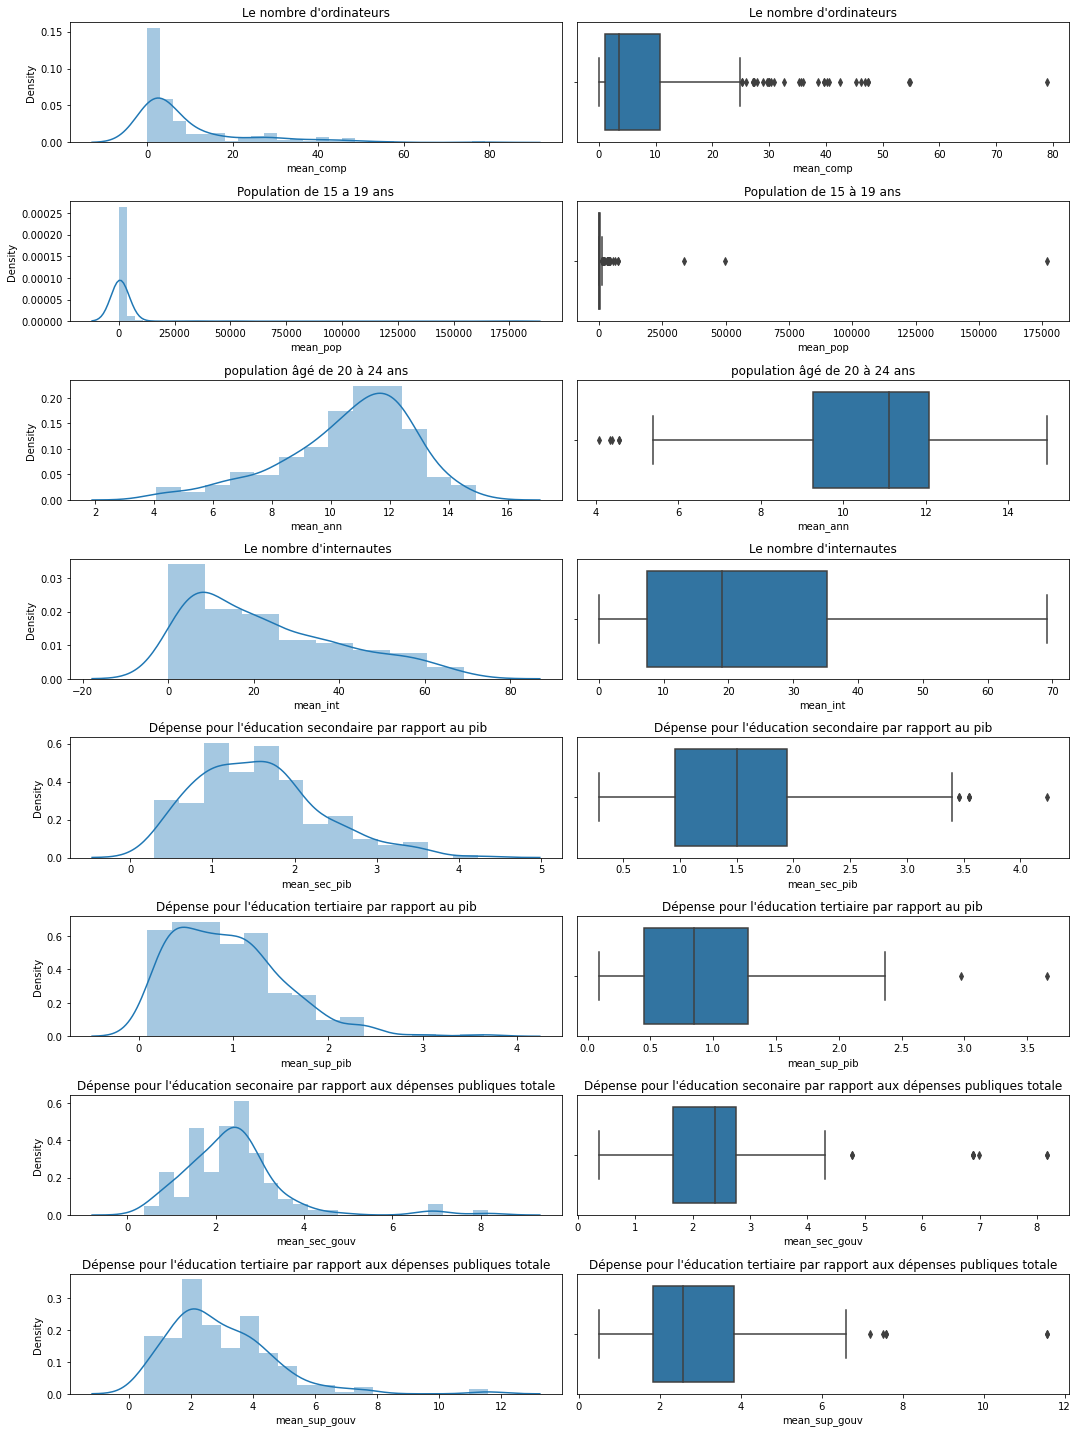

In [127]:
#     Le nombre d'ordinateurs
plt.figure(figsize=(15,20))
plt.subplot(8,2,1)
plt.title("Le nombre d'ordinateurs")
sns.distplot(DataCountry_comp['mean_comp'], kde=True)

plt.subplot(8,2,2)
plt.title("Le nombre d'ordinateurs")
sns.boxplot(DataCountry_comp['mean_comp'])

#      La population âgé de 15 à 19 ans
plt.subplot(8,2,3)
plt.title("Population de 15 a 19 ans")
sns.distplot(DataCountry_pop['mean_pop'], kde=True)

plt.subplot(8,2,4)
plt.title("Population de 15 à 19 ans")
sns.boxplot(DataCountry_pop['mean_pop'])



#      La population âgé de 20 à 24 ans
plt.subplot(8,2,5)
plt.title("population âgé de 20 à 24 ans")
sns.distplot(DataCountry_mean['mean_ann'], kde=True)

plt.subplot(8,2,6)
plt.title("population âgé de 20 à 24 ans")
sns.boxplot(DataCountry_mean['mean_ann'])

#       Le nombre d'internautes
plt.subplot(8,2,7)
plt.title(" Le nombre d'internautes")
sns.distplot(DataCountry_int['mean_int'], kde=True)

plt.subplot(8,2,8)
plt.title("Le nombre d'internautes")
sns.boxplot(DataCountry_int['mean_int'])


#       Dépense pour l'éducation secondaire par rapport au pib
plt.subplot(8,2,9)
plt.title(" Dépense pour l'éducation secondaire par rapport au pib")
sns.distplot(DataCountry_dep_sec_pib['mean_sec_pib'], kde=True)

plt.subplot(8,2,10)
plt.title("Dépense pour l'éducation secondaire par rapport au pib")
sns.boxplot(DataCountry_dep_sec_pib['mean_sec_pib'])

#       Dépense pour l'éducation tertiaire par rapport au pib
plt.subplot(8,2,11)
plt.title("Dépense pour l'éducation tertiaire par rapport au pib")
sns.distplot(DataCountry_dep_sup_pib['mean_sup_pib'], kde=True)

plt.subplot(8,2,12)
plt.title("Dépense pour l'éducation tertiaire par rapport au pib")
sns.boxplot(DataCountry_dep_sup_pib['mean_sup_pib'])

#       Dépense pour l'éducation seconaire par rapport aux dépenses publiques totale
plt.subplot(8,2,13)
plt.title("Dépense pour l'éducation seconaire par rapport aux dépenses publiques totale")
sns.distplot(DataCountry_dep_sec_gouv['mean_sec_gouv'], kde=True)

plt.subplot(8,2,14)
plt.title("Dépense pour l'éducation seconaire par rapport aux dépenses publiques totale")
sns.boxplot(DataCountry_dep_sec_gouv['mean_sec_gouv'])

#       Dépense pour l'éducation tertiaire par rapport aux dépenses publiques totale
plt.subplot(8,2,15)
plt.title("Dépense pour l'éducation tertiaire par rapport aux dépenses publiques totale")
sns.distplot(DataCountry_dep_sup_gouv['mean_sup_gouv'], kde=True)

plt.subplot(8,2,16)
plt.title("Dépense pour l'éducation tertiaire par rapport aux dépenses publiques totale")
sns.boxplot(DataCountry_dep_sup_gouv['mean_sup_gouv'])

#plt.show()
plt.tight_layout()



####  Homogénéité par rapport à chaque indicateur

In [128]:
EIQ= DataCountry_comp['mean_comp'].quantile(0.75) - DataCountry_comp['mean_comp'].quantile(0.25)
EIQ

9.575224774402932

In [129]:
EIQ= DataCountry_int['mean_int'].quantile(0.75) - DataCountry_int['mean_int'].quantile(0.25)
EIQ

27.7664414452

In [130]:
EIQ= DataCountry_pop['mean_pop'].quantile(0.75) - DataCountry_pop['mean_pop'].quantile(0.25)
EIQ

525.42

In [131]:
EIQ= DataCountry_mean['mean_ann'].quantile(0.75) - DataCountry_mean['mean_ann'].quantile(0.25)
EIQ

2.8000000000000007

In [132]:
EIQ= DataCountry_dep_sec_pib['mean_sec_pib'].quantile(0.75) - DataCountry_dep_sec_pib['mean_sec_pib'].quantile(0.25)
EIQ

0.9835766553878799

In [133]:
EIQ= DataCountry_dep_sup_pib['mean_sup_pib'].quantile(0.75) - DataCountry_dep_sup_pib['mean_sup_pib'].quantile(0.25)
EIQ

0.825950056314466

In [134]:
EIQ= DataCountry_dep_sup_gouv['mean_sup_gouv'].quantile(0.75) - DataCountry_dep_sup_gouv['mean_sup_gouv'].quantile(0.25)
EIQ

2.002530097961425

In [135]:
EIQ= DataCountry_dep_sec_gouv['mean_sec_gouv'].quantile(0.75) - DataCountry_dep_sec_gouv['mean_sec_gouv'].quantile(0.25)
EIQ

1.09818669160207

#  Visualisation des indicateurs par pays et par région

### Définition d'une fonction pour récupérer les outliers

In [136]:
def detect_outliers(v):
    Q1= np.quantile(v,0.25)
    Q3= np.quantile(v,0.75)
    EIQ= Q3-Q1
    LI=Q1-(EIQ*1.5)
    LS=Q1+(EIQ*1.5)
    i=list(v.index[(v<LI) | (v>LS)])
    val=list(v[i])
    return i, val

### Dépense pour l'éducation sup du gouv

In [137]:
# Appel à la fonction 
outliers1= detect_outliers(DataCountry_dep_sup_gouv['mean_sup_gouv'])
outliers1[1]

[6.29575514793396,
 7.19620990753174,
 11.557089805603,
 11.557089805603,
 5.342084884643555,
 5.342084884643555,
 5.95222496986389,
 7.509089946746849,
 7.58740997314453,
 7.58740997314453,
 6.600039958953855,
 6.600039958953855,
 5.9269700050354,
 5.02686023712158,
 5.15520668029785,
 5.15520668029785,
 5.15520668029785,
 5.15520668029785,
 4.938440084457395,
 5.8049898147583,
 5.8049898147583,
 4.973529974619547,
 4.973529974619547,
 4.973529974619547,
 4.973529974619547,
 4.973529974619547,
 6.371960004170737]

#### On choisit les valeurs atipyques à droite 

<BarContainer object of 9 artists>

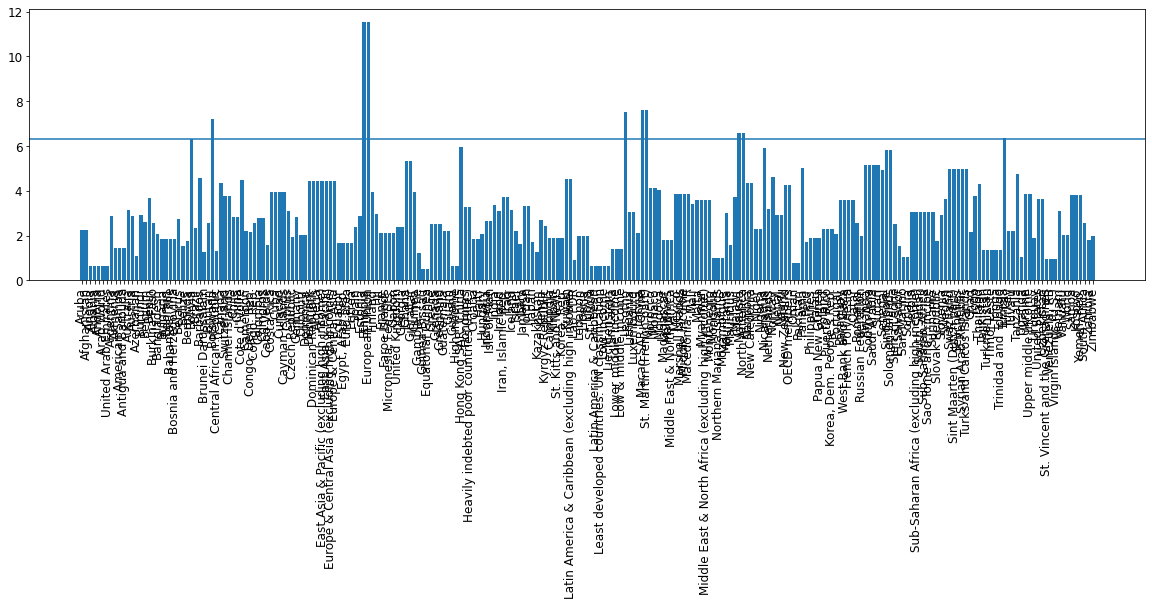

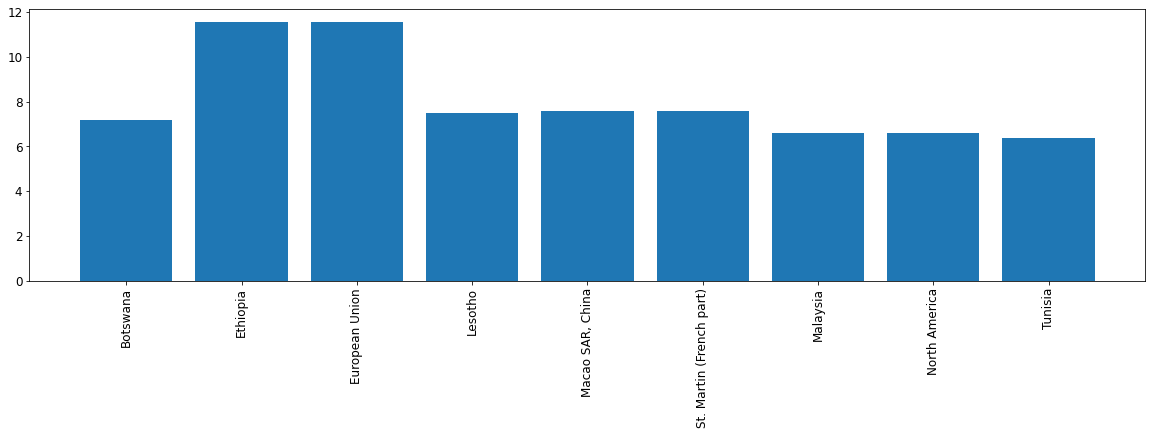

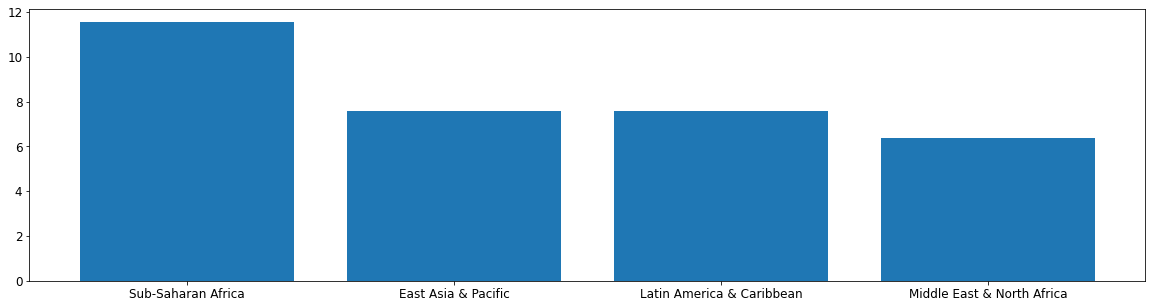

In [138]:
x=DataCountry_dep_sup_gouv['Country Name']
y=DataCountry_dep_sup_gouv['mean_sup_gouv']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=6.3)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
A = DataCountry_dep_sup_gouv[DataCountry_dep_sup_gouv['mean_sup_gouv']>6.3] 
plt.bar(A['Country Name'],A['mean_sup_gouv'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.bar(A['Region'],A['mean_sup_gouv'])

#### La région dui domine est : Sub-Saharan Africa

### Dépense pour l'éducation secondaire du gouv

In [139]:
# Appel à la fonction 
outliers2= detect_outliers(DataCountry_dep_sec_gouv['mean_sec_gouv'])
outliers2[1]

[3.493030071258545,
 3.7816133499145503,
 3.7816133499145503,
 3.7816133499145503,
 4.101369976997375,
 3.72050333023071,
 3.5295867125193303,
 3.899010062217715,
 3.899010062217715,
 3.38696992397308,
 3.38696992397308,
 6.89026021957397,
 6.89026021957397,
 6.89026021957397,
 6.89026021957397,
 3.6617966492970804,
 4.77752494812012,
 4.77752494812012,
 4.30386018753052,
 6.98322010040283,
 3.744750022888185,
 3.69072341918945,
 3.69072341918945,
 8.16946983337402,
 8.16946983337402]

<BarContainer object of 11 artists>

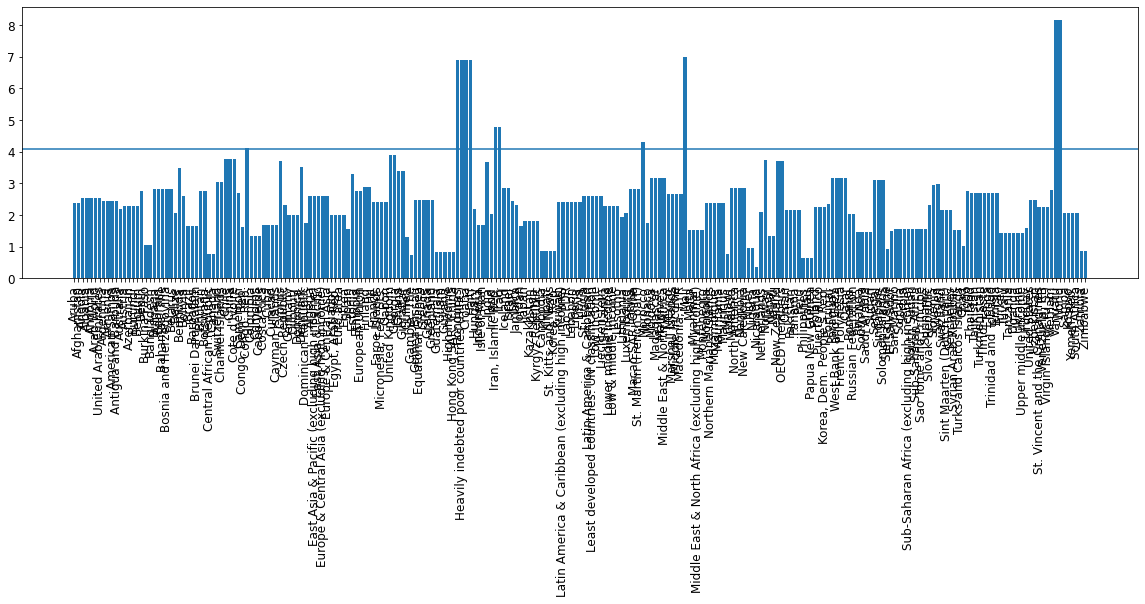

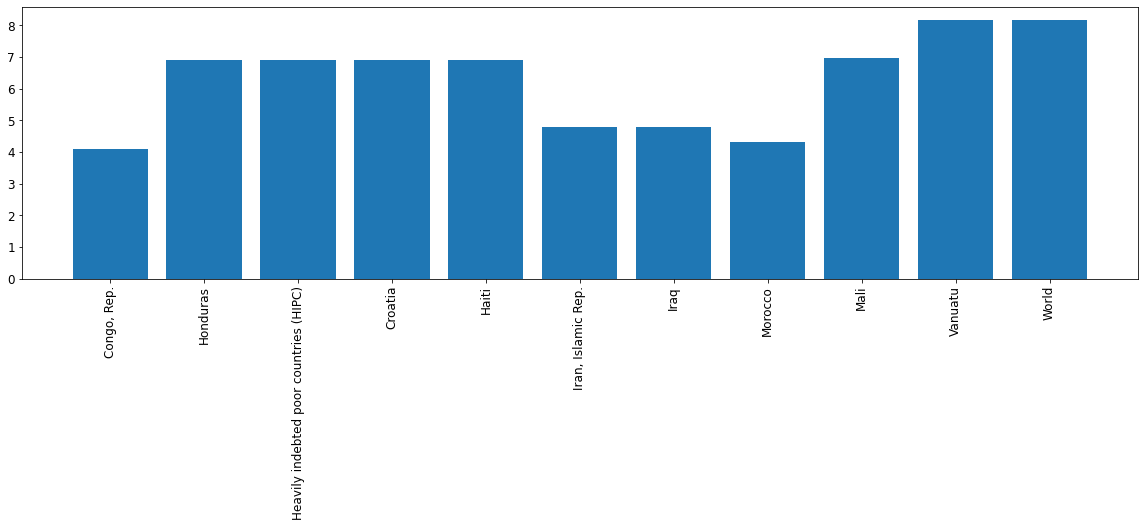

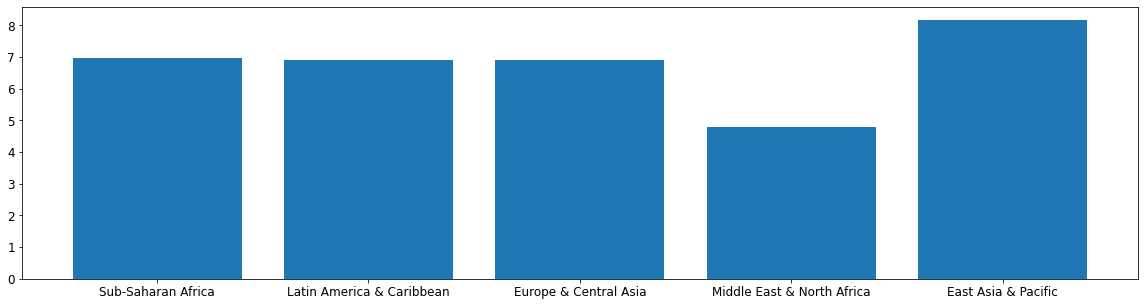

In [140]:
x=DataCountry_dep_sec_gouv['Country Name']
y=DataCountry_dep_sec_gouv['mean_sec_gouv']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=4.1)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
B = DataCountry_dep_sec_gouv[DataCountry_dep_sec_gouv['mean_sec_gouv']>4.1] 
plt.bar(B['Country Name'],B['mean_sec_gouv'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.bar(B['Region'],B['mean_sec_gouv'])

#### La région dui domine est : East Asia & Pacific

### Dépense pour l'éducation sup par rapport au pib

In [141]:
# Appel à la fonction 
outliers3= detect_outliers(DataCountry_dep_sup_pib['mean_sup_pib'])
outliers3[1]

[1.924299955368045,
 2.97579002380371,
 1.90082001686096,
 1.841460049152375,
 1.841460049152375,
 1.841460049152375,
 2.3661900361378967,
 2.3661900361378967,
 2.3661900361378967,
 2.3661900361378967,
 2.3661900361378967,
 2.3661900361378967,
 2.3661900361378967,
 1.97564995288849,
 1.97564995288849,
 1.9828666448593133,
 3.65540999174118,
 1.81289499998093,
 1.81289499998093,
 1.9549099604288733,
 1.8599267005920401]

<BarContainer object of 9 artists>

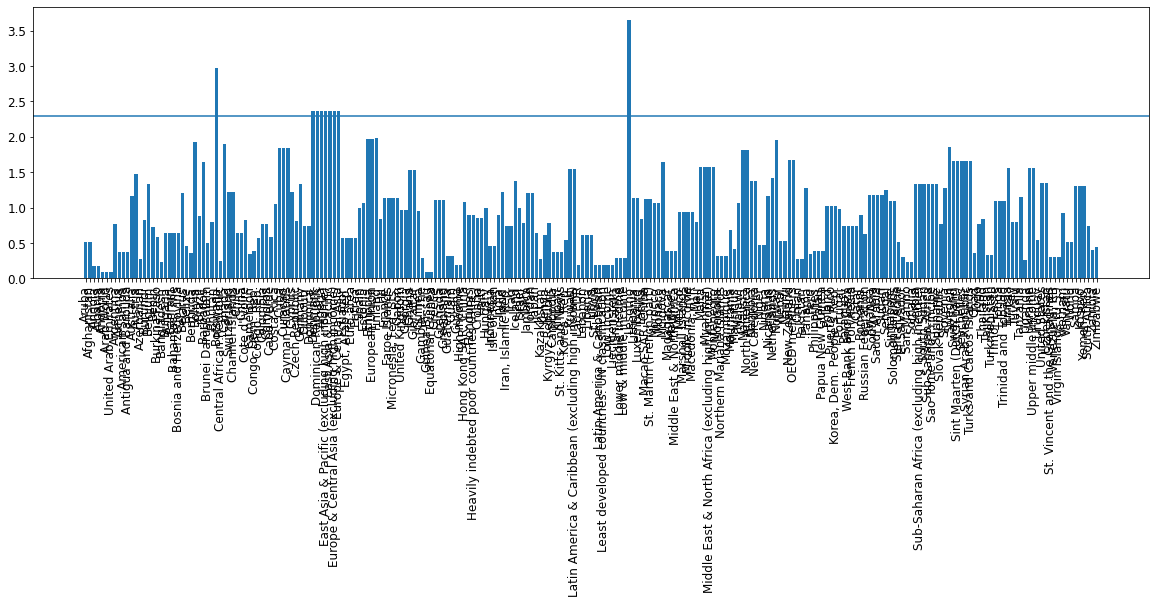

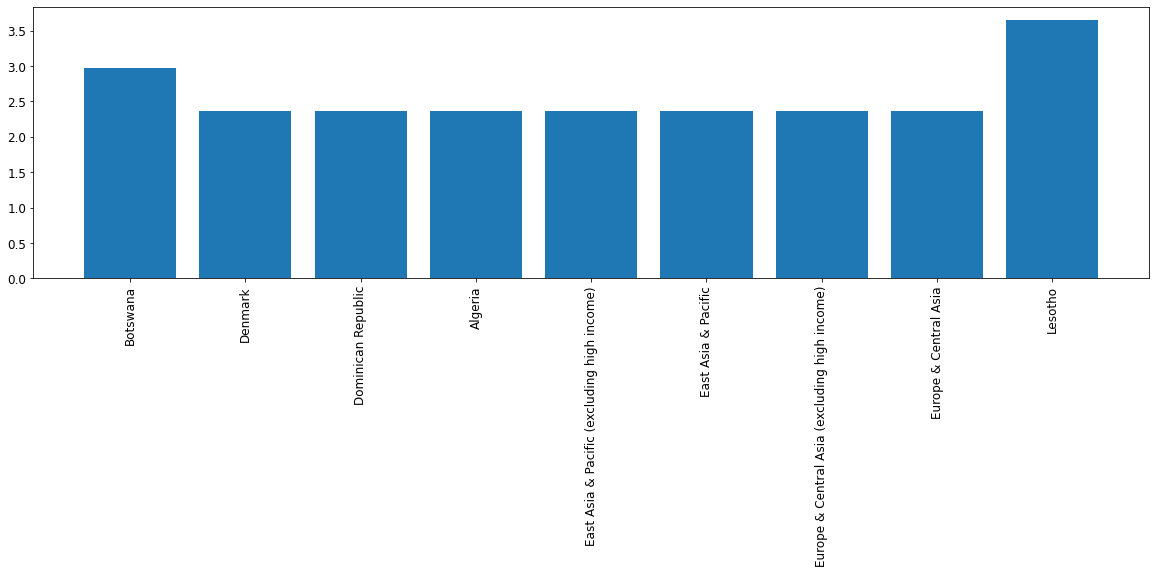

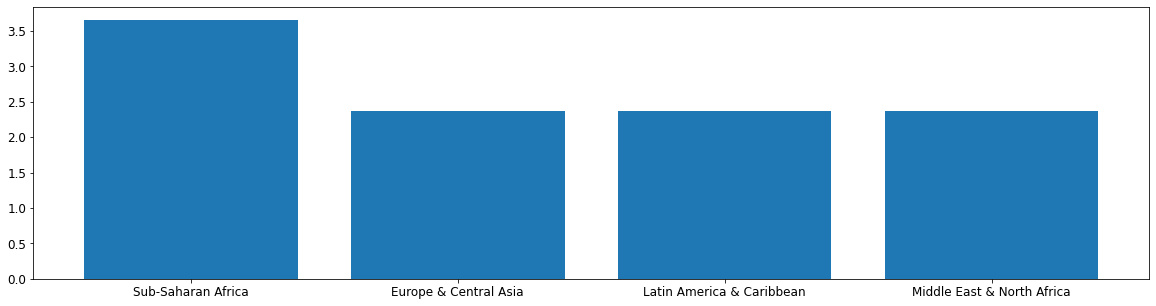

In [142]:
x=DataCountry_dep_sup_pib['Country Name']
y=DataCountry_dep_sup_pib['mean_sup_pib']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=2.3)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
C = DataCountry_dep_sup_pib[DataCountry_dep_sup_pib['mean_sup_pib']>2.3] 
plt.bar(C['Country Name'],C['mean_sup_pib'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.bar(C['Region'],C['mean_sup_pib'])

#### La région dui domine est : Sub-Saharan Africa

### Dépense pour l'éducation secondaire par rapport au pib

In [143]:
# Appel à la fonction 
outliers4= detect_outliers(DataCountry_dep_sec_pib['mean_sec_pib'])
outliers4[1]

[2.501383304595947,
 2.501383304595947,
 2.605030059814455,
 2.88704001903534,
 4.23042011260986,
 3.546173334121707,
 3.546173334121707,
 3.546173334121707,
 2.7452766895294167,
 2.9609866937001534,
 2.508233308792113,
 2.508233308792113,
 2.6345934073130266,
 2.6345934073130266,
 2.6345934073130266,
 2.6345934073130266,
 2.44655998547872,
 2.44655998547872,
 2.941444993019105,
 3.07295000553131,
 3.39859008789063,
 3.1591899394989,
 3.1591899394989,
 3.1591899394989,
 3.1591899394989,
 2.646403312683107,
 2.646403312683107,
 2.478983402252197,
 2.73778998851776,
 2.73778998851776,
 2.73778998851776,
 3.46301007270813,
 3.46301007270813]

<BarContainer object of 12 artists>

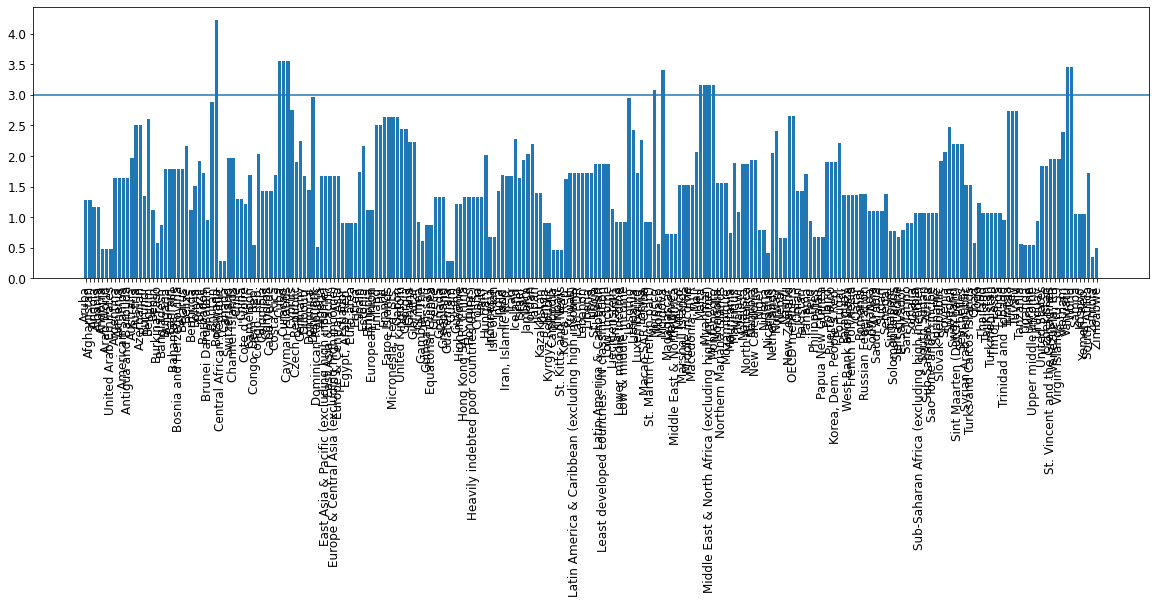

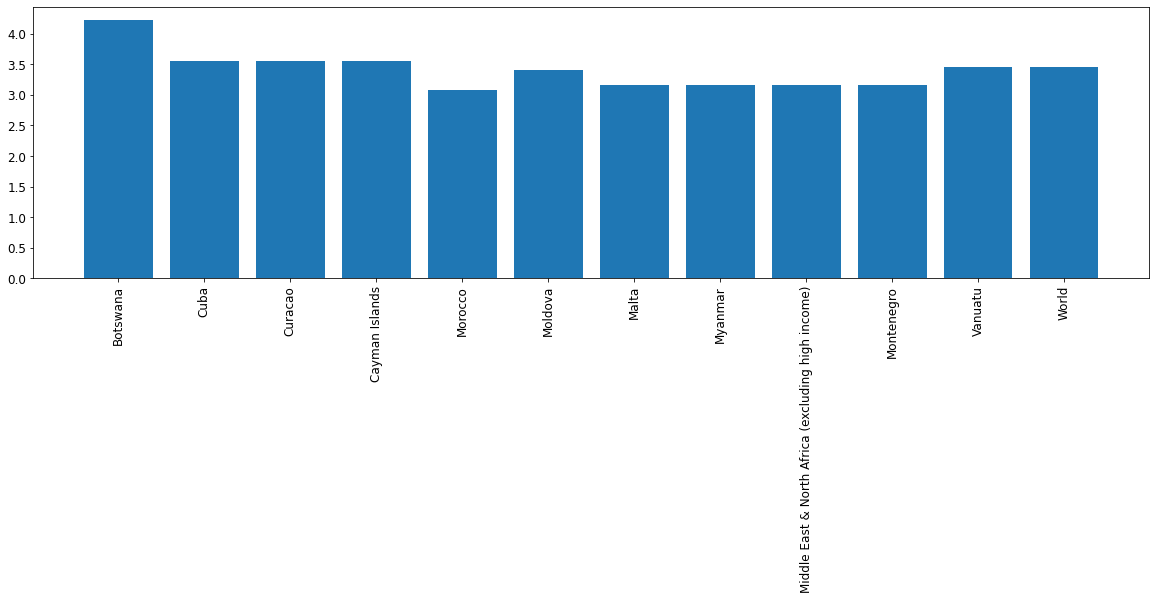

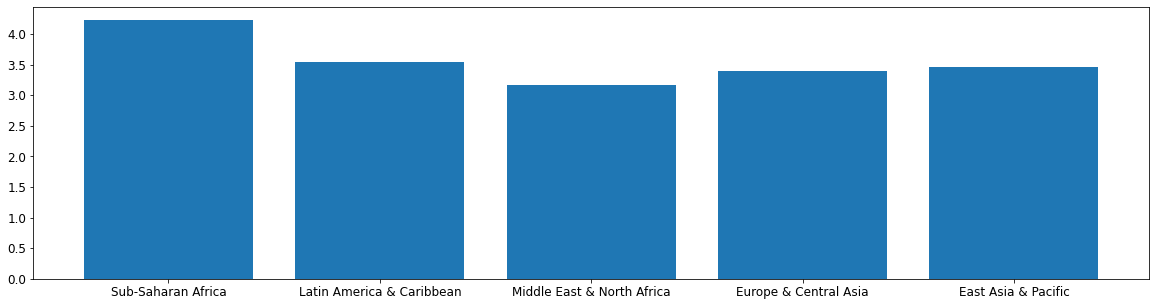

In [144]:
x=DataCountry_dep_sec_pib['Country Name']
y=DataCountry_dep_sec_pib['mean_sec_pib']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=3.0)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
D = DataCountry_dep_sec_pib[DataCountry_dep_sec_pib['mean_sec_pib']>3.0] 
plt.bar(D['Country Name'],D['mean_sec_pib'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.bar(D['Region'],D['mean_sec_pib'])

#### La région dui domine est : Sub-Saharan Africa

### Ordinateurs personnels

In [145]:
# Appel à la fonction 
outliers5= detect_outliers(DataCountry_comp['mean_comp'])
outliers5[1]

[29.717225274875563,
 29.89960823889577,
 21.629836862237177,
 24.93724588157922,
 40.156074404924155,
 40.52079762545668,
 47.4686303909688,
 47.4686303909688,
 19.2081139249877,
 29.593011495820438,
 39.608773909452076,
 39.608773909452076,
 22.748876203367885,
 32.57824769688325,
 21.92144825568989,
 30.78880299990397,
 27.22865311083342,
 27.22865311083342,
 35.290317895796,
 54.8426017330262,
 30.304381521339224,
 29.902879562873615,
 28.847458525704226,
 27.864279999079088,
 15.724834921642895,
 16.704061016774236,
 16.6671431150971,
 16.6671431150971,
 27.421713756667316,
 54.59991049962895,
 25.1921728762885,
 25.1921728762885,
 21.573277883145,
 46.21513359216105,
 17.4890911793769,
 38.68921458255868,
 45.23451534140819,
 35.9261196292042,
 27.34617654495273,
 35.52784445085537,
 78.87107998706975,
 17.87167728803132,
 25.99262147849373,
 42.43642860698598,
 16.07995465689665,
 46.83425415263265]

<BarContainer object of 33 artists>

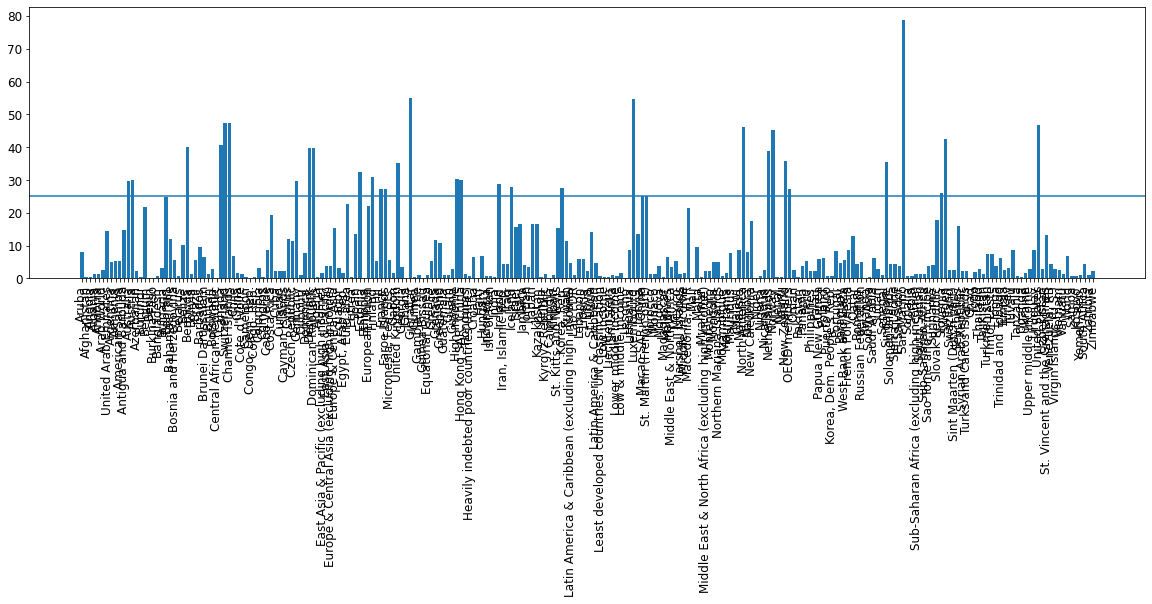

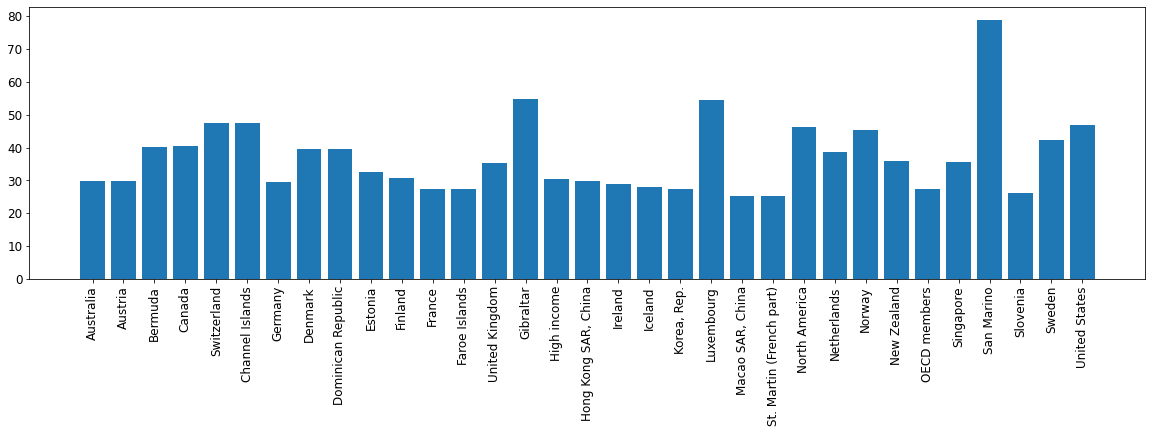

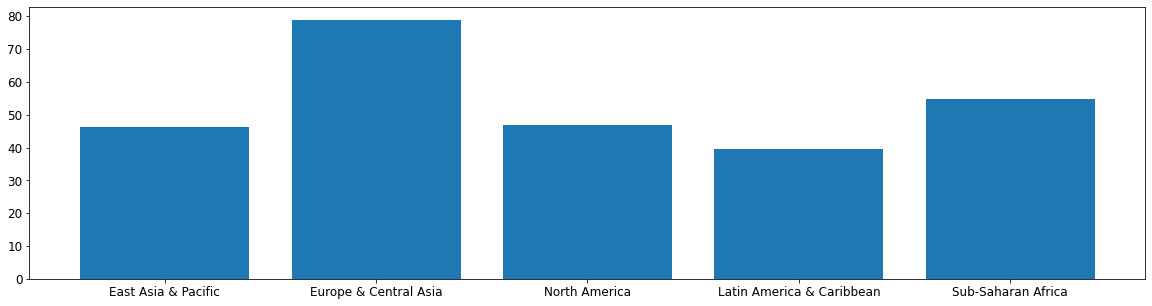

In [146]:
x=DataCountry_comp['Country Name']
y=DataCountry_comp['mean_comp']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=25.1)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
E = DataCountry_comp[DataCountry_comp['mean_comp']>25.1] 
plt.bar(E['Country Name'],E['mean_comp'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.bar(E['Region'],E['mean_comp'])

#### La région dui domine est : Europe & Central Asia

### Utilisateurs d'internet

In [147]:
# Appel à la fonction 
outliers6= detect_outliers(DataCountry_int['mean_int'])
outliers6[1]

[56.5136504575,
 54.615257894600006,
 50.546097080799996,
 49.259250936,
 59.55373978499999,
 59.1787050506,
 58.4262125622,
 58.4262125622,
 54.0707768708,
 62.157717456,
 51.0635467798,
 59.78817979200001,
 54.043804820000005,
 55.143444526799996,
 66.855281904,
 53.554839599599994,
 58.473663506,
 69.131945285,
 56.4864739762,
 49.98491552074999,
 66.5032478825,
 53.88511829042507,
 62.780329392,
 66.1227040986,
 56.73337970199999,
 49.9772751444,
 63.2451752908,
 53.305701261399996]

<BarContainer object of 28 artists>

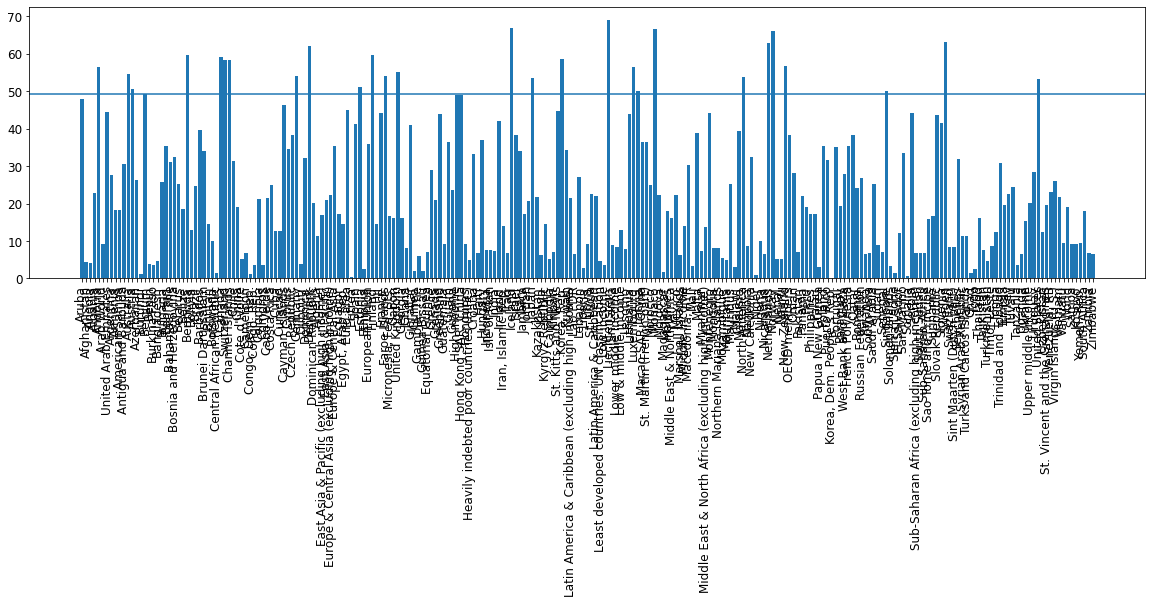

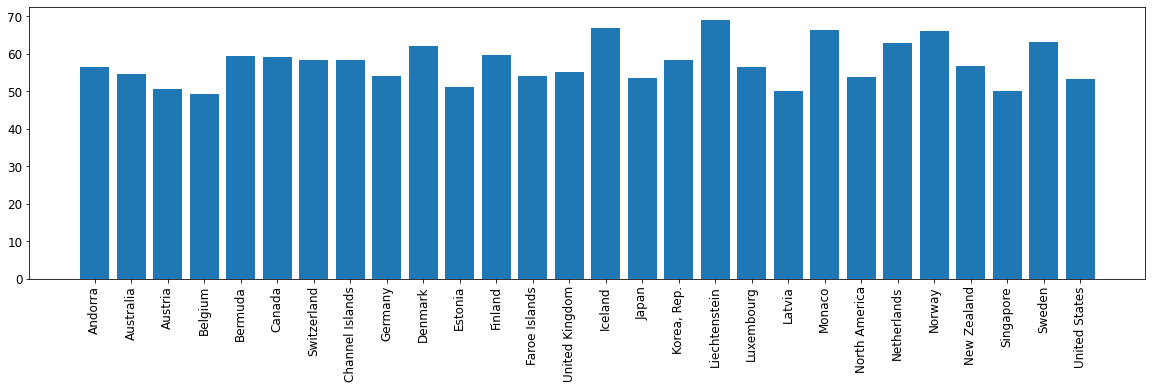

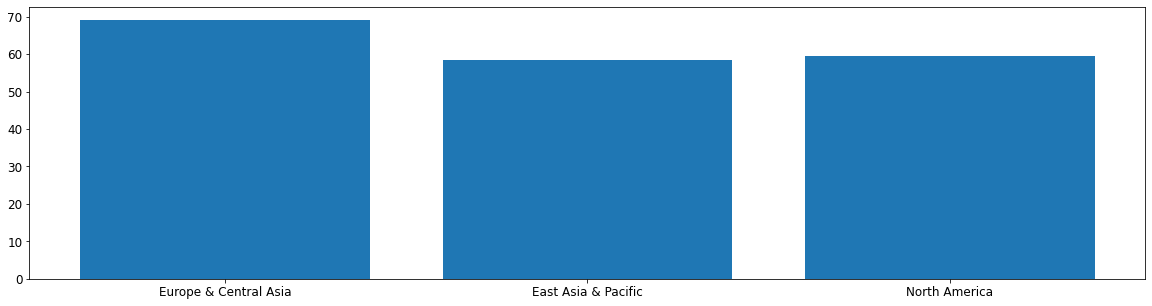

In [148]:
x=DataCountry_int['Country Name']
y=DataCountry_int['mean_int']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=49.2)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
F = DataCountry_int[DataCountry_int['mean_int']>49.2] 
plt.bar(F['Country Name'],F['mean_int'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.bar(F['Region'],F['mean_int'])

#### La région dui domine est : Europe & Central Asia

## Population âgé de 15 à 19 ans

In [149]:
# Appel à la fonction 
outliers7= detect_outliers(DataCountry_pop['mean_pop'])
outliers7[1]

[1113.0900000000001,
 1976.0425,
 3361.3025,
 3361.3025,
 3361.3025,
 1544.9925,
 33568.1525,
 1372.3625,
 1332.2649999999999,
 1332.2649999999999,
 1332.2649999999999,
 1332.2649999999999,
 1332.2649999999999,
 3612.9125,
 3612.9125,
 3612.9125,
 2097.9975,
 2097.9975,
 2097.9975,
 875.2525,
 4273.637500000001,
 4273.637500000001,
 49684.565,
 1386.1675,
 1363.3,
 1823.7050000000002,
 1823.7050000000002,
 1823.7050000000002,
 1183.1625,
 1183.1625,
 1674.65,
 1674.65,
 5658.2925,
 1236.5225,
 1236.5225,
 6201.8675,
 1229.865,
 3944.2174999999997,
 3944.2174999999997,
 3944.2174999999997,
 3808.7325,
 1657.6675,
 2155.06,
 2155.06,
 1091.91,
 1091.91,
 7593.6875,
 7593.6875,
 1880.81,
 176649.55750000002]

<BarContainer object of 35 artists>

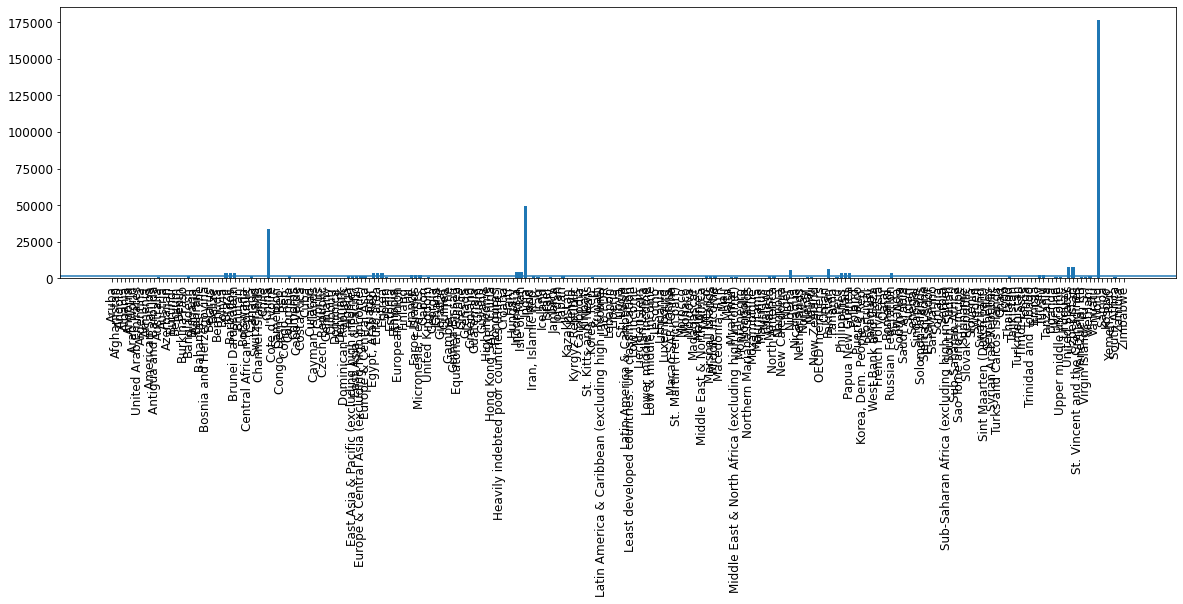

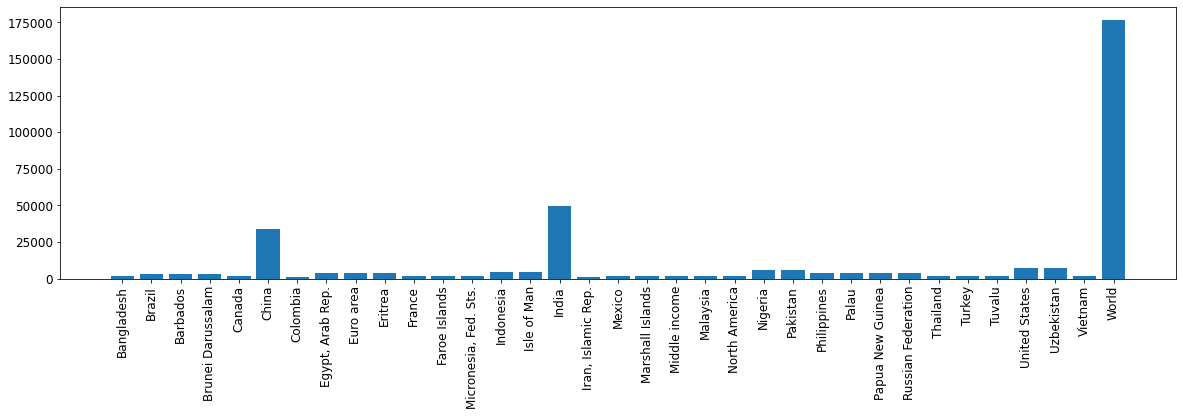

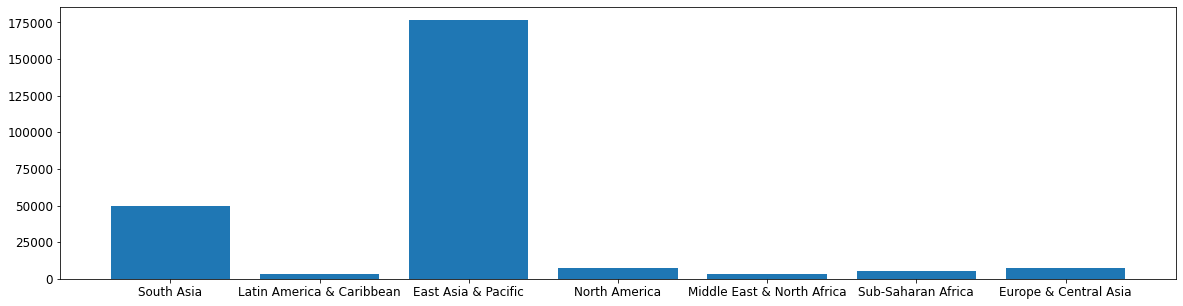

In [150]:
x=DataCountry_pop['Country Name']
y=DataCountry_pop['mean_pop']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=1363.3)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
G = DataCountry_pop[DataCountry_pop['mean_pop']>1363.3] 
plt.bar(G['Country Name'],G['mean_pop'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.bar(G['Region'],G['mean_pop'])

#### La région qui domine est : Est Asia & Pacific

## Nombre moyen d'années de scolarisé

In [151]:
# Appel à la fonction 
outliers8= detect_outliers(DataCountry_mean['mean_ann'])
outliers8[1]

[13.950000000000001,
 4.4,
 13.675,
 14.100000000000001,
 13.775,
 14.924999999999999,
 14.75,
 13.725000000000001,
 4.55,
 4.55,
 4.35,
 13.925,
 13.850000000000001,
 13.850000000000001,
 4.074999999999999,
 14.1,
 14.1,
 14.1]

<BarContainer object of 13 artists>

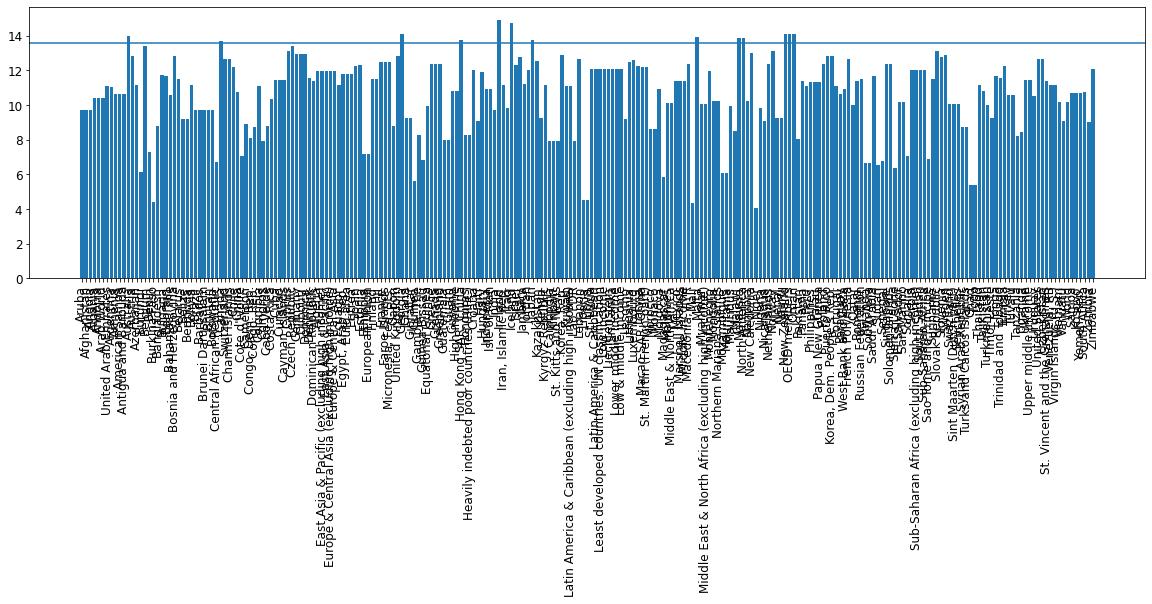

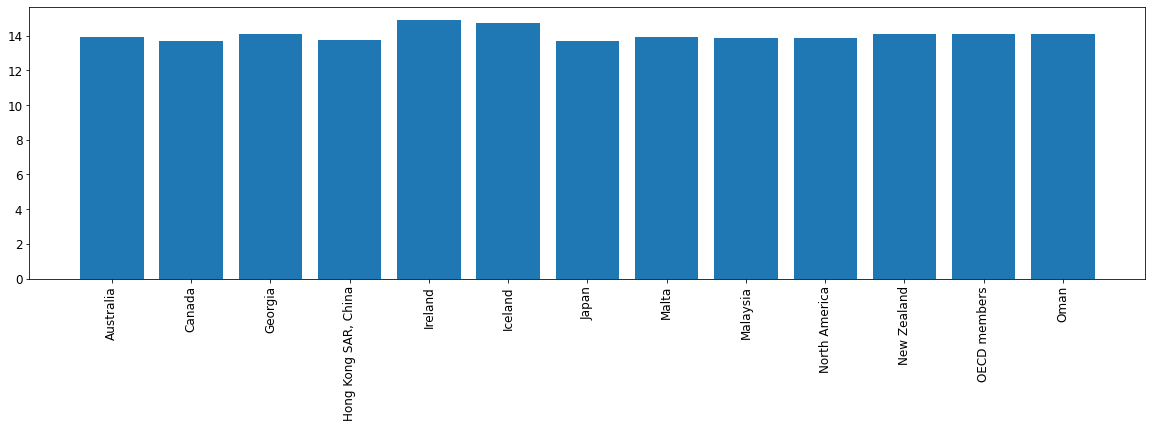

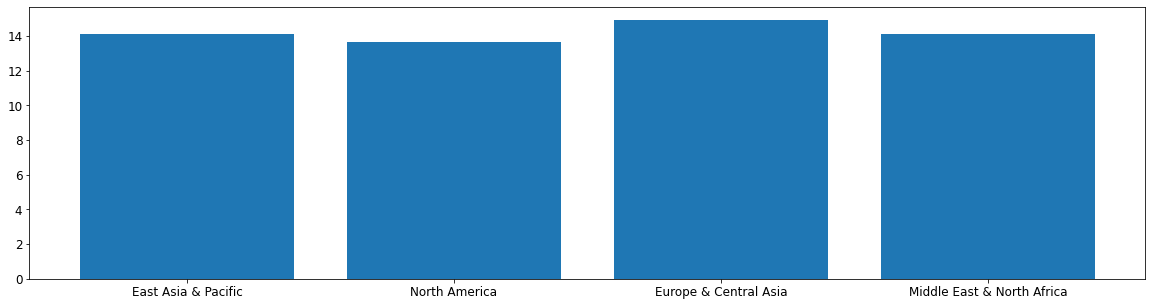

In [152]:
x=DataCountry_mean['Country Name']
y=DataCountry_mean['mean_ann']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=13.6)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
H = DataCountry_mean[DataCountry_mean['mean_ann']>13.6] 
plt.bar(H['Country Name'],H['mean_ann'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.bar(H['Region'],H['mean_ann'])

#### La région qui domine est : Europe & Central Asia

In [153]:
# Avant la normalisation
DataCountry_dep_sup_gouv['mean_sup_gouv']

1239      2.23965
4904      2.23965
8569      0.66205
12234     0.66205
15899     0.66205
           ...   
866179    3.80753
869844    3.80753
873509    2.57143
877174    1.80593
880839    1.98968
Name: mean_sup_gouv, Length: 241, dtype: float64

# Normalisation des variables avant la pondération

<AxesSubplot:title={'center':"Le nombre d'ordinateurs"}, xlabel='mean_comp', ylabel='Density'>

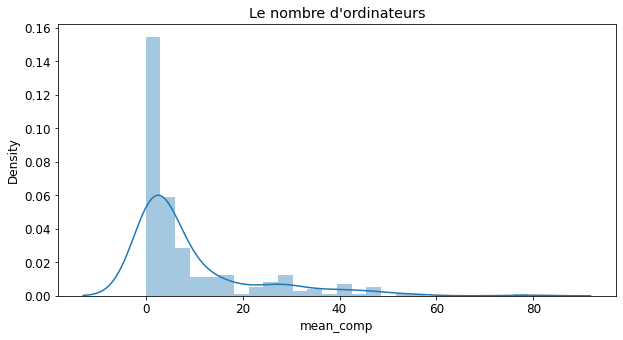

In [154]:
#     Le nombre d'ordinateurs exemple
plt.figure(figsize=(10,5))
#plt.subplot(8,2,1)
plt.title("Le nombre d'ordinateurs")
sns.distplot(DataCountry_comp['mean_comp'], kde=True)

####  On voit que les valeurs ne sont normalisés

## Définition d'une fonction pour normaliser

In [155]:
# Vous pouvez spécifier l'ordre pour obtenir la norme L1. 
# Pour éviter la division zéro, j'utilise eps

def normalize(v):
    norm=np.linalg.norm(v, ord=1)
    if norm==0:
        norm=np.finfo(v.dtype).eps
    return v/norm

In [156]:
# Normisalisation des indicateurs puis udpdate
DataCountry_dep_sup_gouv['mean_sup_gouv']=normalize(DataCountry_dep_sup_gouv['mean_sup_gouv'])
DataCountry_dep_sec_gouv['mean_sec_gouv']=normalize(DataCountry_dep_sec_gouv['mean_sec_gouv'])
DataCountry_dep_sup_pib['mean_sup_pib']=normalize(DataCountry_dep_sup_pib['mean_sup_pib'])
DataCountry_dep_sec_pib['mean_sec_pib']=normalize(DataCountry_dep_sec_pib['mean_sec_pib'])
DataCountry_comp['mean_comp']=normalize(DataCountry_comp['mean_comp'])
DataCountry_int['mean_int']=normalize(DataCountry_int['mean_int'])
DataCountry_mean['mean_ann']=normalize(DataCountry_mean['mean_ann'])
DataCountry_pop['mean_pop']=normalize(DataCountry_pop['mean_pop'])   

In [157]:
# Affichage aprés normalisation de l'indicateur nombre d'ordinateurs
DataCountry_comp['mean_comp']

2084      0.003611
5749      0.000156
9414      0.000153
13079     0.000557
16744     0.000557
            ...   
867024    0.000391
870689    0.000498
874354    0.002054
878019    0.000418
881684    0.000974
Name: mean_comp, Length: 241, dtype: float64

<AxesSubplot:title={'center':"Le nombre d'ordinateurs"}, xlabel='mean_comp', ylabel='Density'>

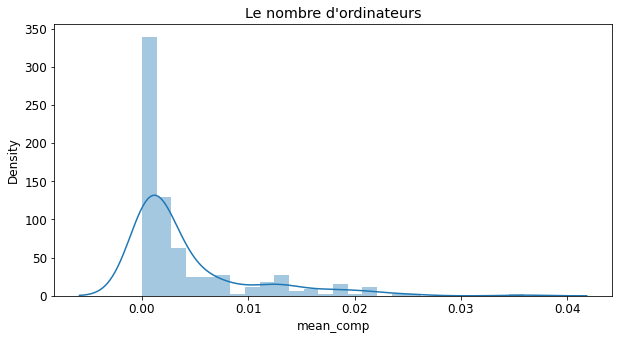

In [158]:
#     Le nombre d'ordinateurs
plt.figure(figsize=(10,5))
#plt.subplot(8,2,1)
plt.title("Le nombre d'ordinateurs")
sns.distplot(DataCountry_comp['mean_comp'], kde=True)

<AxesSubplot:title={'center':'population âgé de 15 à 19 ans'}, xlabel='mean_pop', ylabel='Density'>

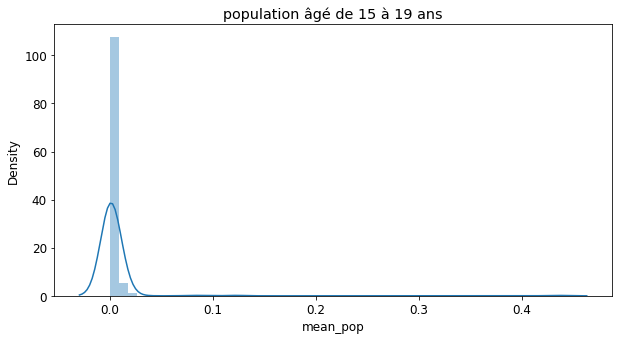

In [159]:
#     population âgé de 15 à 19 ans
plt.figure(figsize=(10,5))
#plt.subplot(8,2,1)
plt.title("population âgé de 15 à 19 ans")
sns.distplot(DataCountry_pop['mean_pop'], kde=True)

<AxesSubplot:title={'center':"Le nombre d'internautes"}, xlabel='mean_int', ylabel='Density'>

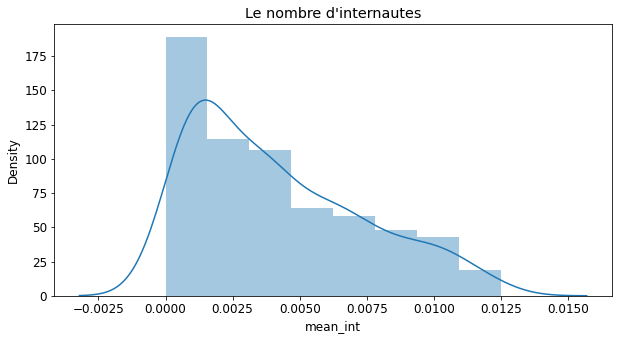

In [160]:
#     Le nombre d'internautes
plt.figure(figsize=(10,5))
#plt.subplot(8,2,1)
plt.title("Le nombre d'internautes")
sns.distplot(DataCountry_int['mean_int'], kde=True)

<AxesSubplot:title={'center':'Population âgé de 20 à 24 ans'}, xlabel='mean_ann', ylabel='Density'>

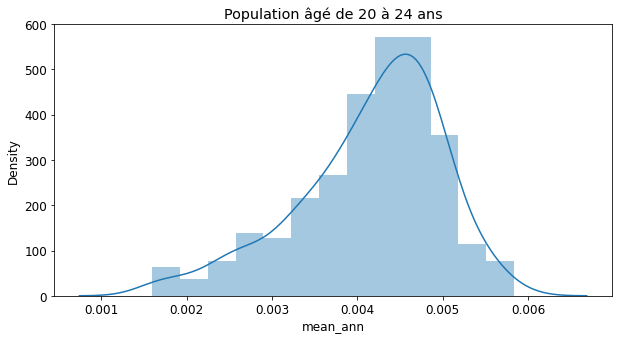

In [161]:
#     Population âgé de 20 à 24 ans
plt.figure(figsize=(10,5))
#plt.subplot(8,2,1)
plt.title("Population âgé de 20 à 24 ans")
sns.distplot(DataCountry_mean['mean_ann'], kde=True)

<AxesSubplot:title={'center':"Dépense pour l'éducation supérieur par rapport au pib"}, xlabel='mean_sup_pib', ylabel='Density'>

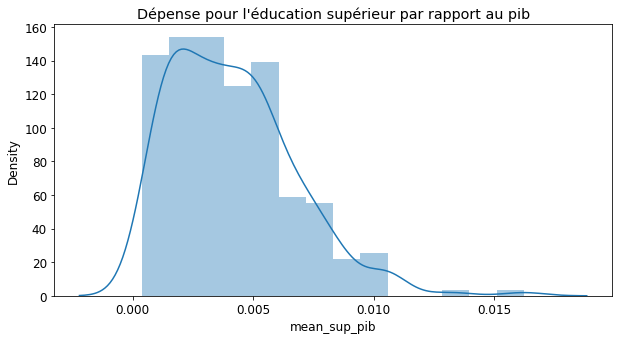

In [162]:
#     Dépense pour l'éducation supérieur par rapport au pib
plt.figure(figsize=(10,5))
#plt.subplot(8,2,1)
plt.title("Dépense pour l'éducation supérieur par rapport au pib")
sns.distplot(DataCountry_dep_sup_pib['mean_sup_pib'], kde=True)

<AxesSubplot:title={'center':"Dépense pour l'éducation secondaire par rapport au pib"}, xlabel='mean_sec_pib', ylabel='Density'>

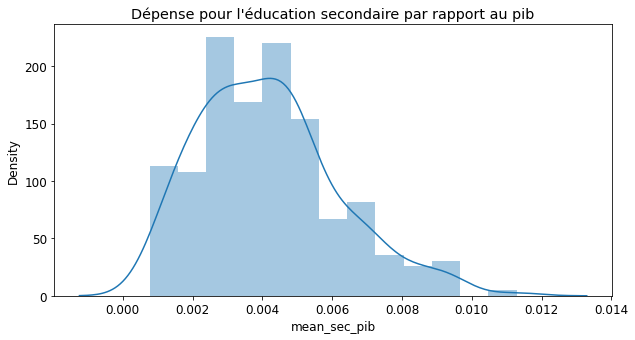

In [163]:
#    Dépense pour l'éducation secondaire par rapport au pib
plt.figure(figsize=(10,5))
#plt.subplot(8,2,1)
plt.title("Dépense pour l'éducation secondaire par rapport au pib")
sns.distplot(DataCountry_dep_sec_pib['mean_sec_pib'], kde=True)

<AxesSubplot:title={'center':"Dépense pour l'éducation supérieur par rapport au dépense publique"}, xlabel='mean_sup_gouv', ylabel='Density'>

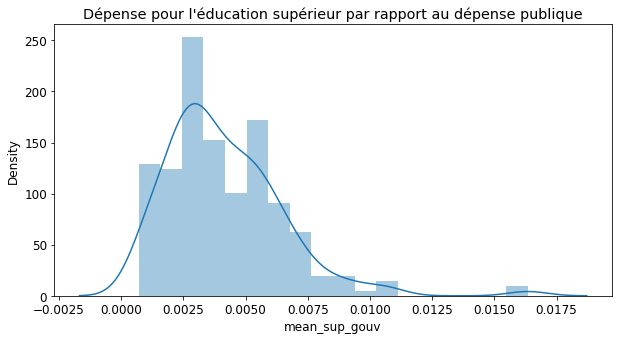

In [164]:
#     Dépense pour l'éducation supérieur par rapport au dépense publique
plt.figure(figsize=(10,5))
#plt.subplot(8,2,1)
plt.title("Dépense pour l'éducation supérieur par rapport au dépense publique")
sns.distplot(DataCountry_dep_sup_gouv['mean_sup_gouv'], kde=True)

<AxesSubplot:title={'center':"Dépense pour l'éducation secondaire par rapport au dépense publique"}, xlabel='mean_sec_gouv', ylabel='Density'>

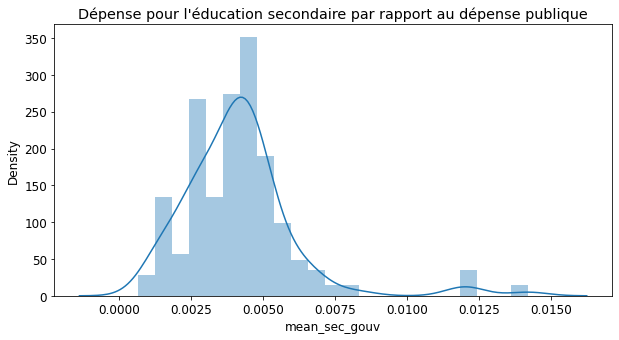

In [165]:
#     Dépense pour l'éducation secondaire par rapport au dépense publique
plt.figure(figsize=(10,5))
#plt.subplot(8,2,1)
plt.title("Dépense pour l'éducation secondaire par rapport au dépense publique")
sns.distplot(DataCountry_dep_sec_gouv['mean_sec_gouv'], kde=True)

## Selectionnons 20 pays à partir des indicateurs

 Nous allons procédé au système de pondération en affectant pour chaque indicateur un coefficient , en faisant la normalisation avant la pondération

* Dépenses pour l'enseignement supérieur par rapport des dépenses publiques totales : 2
* Dépenses pour l'enseignement secondaire par rapport des dépenses publiques totales: 2
* Dépenses publiques pour l'enseignement supérieur par rapport au PIB :2
* Dépenses publiques pour l'enseignement secondaire par rapport au PIB :2
* Ordinateurs personnels:5
* Nombre d'internautes:5
* Population âgée de 15 à 19:4
* Nombre moyen d'années de scolarité:4

## Pondération et scoring

In [166]:
DataCountry_dep_sup_gouv['score_mean_dep_sup_gouv']=DataCountry_dep_sup_gouv['mean_sup_gouv']*2
DataCountry_dep_sec_gouv['score_mean_dep_sec_gouv']=DataCountry_dep_sec_gouv['mean_sec_gouv']*2
DataCountry_dep_sup_pib['score_mean_dep_sup_pib']=DataCountry_dep_sup_pib['mean_sup_pib']*2
DataCountry_dep_sec_pib['score_mean_dep_sec_pib']=DataCountry_dep_sec_pib['mean_sec_pib']*2
DataCountry_comp['score_mean_comp']=DataCountry_comp['mean_comp']*5
DataCountry_int['score_mean_int']=DataCountry_int['mean_int']*5
DataCountry_mean['score_mean_ann']=DataCountry_mean['mean_ann']*4
DataCountry_pop['score_mean_pop']=DataCountry_pop['mean_pop']*4

In [167]:
print(DataCountry_dep_sup_gouv['score_mean_dep_sup_gouv'])

1239      0.006329
4904      0.006329
8569      0.001871
12234     0.001871
15899     0.001871
            ...   
866179    0.010760
869844    0.010760
873509    0.007267
877174    0.005103
880839    0.005623
Name: score_mean_dep_sup_gouv, Length: 241, dtype: float64


In [168]:
print(DataCountry_dep_sec_gouv['score_mean_dep_sec_gouv'])

1241      0.008299
4906      0.008299
8571      0.008857
12236     0.008857
15901     0.008857
            ...   
866181    0.007193
869846    0.007193
873511    0.007193
877176    0.002998
880841    0.002998
Name: score_mean_dep_sec_gouv, Length: 241, dtype: float64


In [169]:
print(DataCountry_dep_sup_pib['score_mean_dep_sup_pib'])

1266      0.004601
4931      0.004601
8596      0.001559
12261     0.001559
15926     0.000801
            ...   
866206    0.011576
869871    0.011576
873536    0.006610
877201    0.003524
880866    0.003996
Name: score_mean_dep_sup_pib, Length: 241, dtype: float64


In [170]:
print(DataCountry_dep_sec_pib['score_mean_dep_sec_pib'])

1265      0.006825
4930      0.006825
8595      0.006245
12260     0.006245
15925     0.002592
            ...   
866205    0.005645
869870    0.005645
873535    0.009165
877200    0.001901
880865    0.002695
Name: score_mean_dep_sec_pib, Length: 241, dtype: float64


In [171]:
print(DataCountry_comp['score_mean_comp'])

2084      0.018057
5749      0.000779
9414      0.000766
13079     0.002787
16744     0.002787
            ...   
867024    0.001957
870689    0.002491
874354    0.010268
878019    0.002091
881684    0.004871
Name: score_mean_comp, Length: 241, dtype: float64


In [172]:
print(DataCountry_int['score_mean_int'])

1375      0.043194
5040      0.004055
8705      0.003710
12370     0.020646
16035     0.050987
            ...   
866315    0.008193
869980    0.008473
873645    0.016137
877310    0.006144
880975    0.005765
Name: score_mean_int, Length: 241, dtype: float64


In [173]:
print(DataCountry_mean['score_mean_ann'])

3361      0.015218
7026      0.015218
10691     0.015218
14356     0.016274
18021     0.016274
            ...   
868301    0.016704
871966    0.016704
875631    0.016822
879296    0.014083
882961    0.018895
Name: score_mean_ann, Length: 241, dtype: float64


In [174]:
# Liste des scores de 20 premiers pays
liste_score = [ DataCountry_dep_sup_gouv.loc[:,['Country Name','Country Code','Region','score_mean_dep_sup_gouv']],
               DataCountry_dep_sec_gouv.loc[:,['Country Name','score_mean_dep_sec_gouv']],
               DataCountry_dep_sup_pib.loc[:,['Country Name','score_mean_dep_sup_pib']],
               DataCountry_dep_sec_pib.loc[:,['Country Name','score_mean_dep_sec_pib']], 
               DataCountry_int.loc[:,['Country Name','score_mean_int']],
               DataCountry_comp.loc[:,['Country Name','score_mean_comp']],
               DataCountry_pop.loc[:,['Country Name','score_mean_pop']],
               DataCountry_mean.loc[:,['Country Name','score_mean_ann']] ]
df=liste_score[0]
for d in liste_score[1:]:
    df=pd.merge(df,d,left_on='Country Name',right_on='Country Name')
df['score']=df.sum(axis=1)
df.sort_values(by='score', ascending=False).head(10)

Country Name Country Code                 Region  \
234          World          WLD    East Asia & Pacific   
98           India          IND             South Asia   
37           China          CHN    East Asia & Pacific   
227  United States          USA          North America   
157  North America          NAC    East Asia & Pacific   
195     San Marino          SMR  Europe & Central Asia   
164         Norway          NOR  Europe & Central Asia   
78       Gibraltar          GIB     Sub-Saharan Africa   
131     Luxembourg          LUX  Europe & Central Asia   
54         Denmark          DNK  Europe & Central Asia   

     score_mean_dep_sup_gouv  score_mean_dep_sec_gouv  score_mean_dep_sup_pib  \
234                 0.005745                 0.028428                0.004592   
98                  0.009460                 0.012742                0.007909   
37                  0.008050                 0.013159                0.005689   
227                 0.010287                 0.008641                0.011979   
157                 0.018651                 0.009975                0.016093   
195                 0.002973                 0.005454                0.002000   
164                 0.013084                 0.013031                0.017353   
78                  0.015096                 0.011786                0.013652   
131                 0.008606                 0.007176                0.010082   
54                  0.012487                 0.012282                0.021004   

     score_mean_dep_sec_pib  score_mean_int  score_mean_comp  score_mean_pop  \
234                0.018473        0.017213         0.015496        1.734306   
98                 0.007603        0.006576         0.001200        0.487792   
37                 0.006913        0.017125         0.003815        0.329565   
227                0.009776        0.048092         0.106729        0.074553   
157                0.009962        0.048615         0.105318        0.016441   
195                0.004868        0.030200         0.179736        0.000642   
164                0.012895        0.059656         0.103083        0.000496   
78                 0.011922        0.037051         0.124978        0.003256   
131                0.009231        0.050962         0.124425        0.000051   
54                 0.015795        0.056079         0.090263        0.000291   

     score_mean_ann     score  
234        0.015961  1.840212  
98         0.015218  0.548499  
37         0.016822  0.401138  
227        0.019756  0.289813  
157        0.021673  0.246728  
195        0.015883  0.241756  
164        0.020499  0.240097  
78         0.014514  0.232256  
131        0.019717  0.230250  
54         0.018074  0.226274

In [175]:
# Afficher le nombre de ligne de la liste de score
df.shape[0]

241

### Vérifions si chaque élément de la colonne " country code " est contenu dans ECScopy[Countrycode] et dans la liste de score df  avec la fonction isin

In [176]:
# Afficher les 5 premiers ligne de ECScopy
ECScopy.head(5)

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [177]:
# Affichage de la correspondance
df['Country Code'].isin(ECScopy['CountryCode'])

0      True
1      True
2      True
3      True
4      True
       ... 
236    True
237    True
238    True
239    True
240    True
Name: Country Code, Length: 241, dtype: bool

####  Afficher les pays qui ne correspondent pas 

In [178]:
pays_hors_normes=df[~df['Country Code'].isin(ECScopy['CountryCode'])][['Country Name','Country Code']].sort_values(by='Country Name')
pays_hors_normes

Country Name Country Code
5                                           Arab World          ARB
47                                             Curacao          CUW
58                                 East Asia & Pacific          EAS
57         East Asia & Pacific (excluding high income)          EAP
63                                           Euro area          EMU
60                               Europe & Central Asia          ECS
59       Europe & Central Asia (excluding high income)          ECA
68                                      European Union          EUU
92              Heavily indebted poor countries (HIPC)          HPC
89                                         High income          HIC
122                          Latin America & Caribbean          LCN
116  Latin America & Caribbean (excluding high income)          LAC
123       Least developed countries: UN classification          LDC
128                                Low & middle income          LMY
124                                         Low income          LIC
127                                Lower middle income          LMC
140                         Middle East & North Africa          MEA
148  Middle East & North Africa (excluding high inc...          MNA
143                                      Middle income          MIC
166                                              Nauru          NRU
157                                      North America          NAC
168                                       OECD members          OED
207                          Sint Maarten (Dutch part)          SXM
187                                         South Asia          SAS
199                                        South Sudan          SSD
134                           St. Martin (French part)          MAF
200                                 Sub-Saharan Africa          SSF
198         Sub-Saharan Africa (excluding high income)          SSA
225                                Upper middle income          UMC
234                                              World          WLD

In [179]:
# Supprimer les pays hors_normes
pays_a_supprimer=pays_hors_normes['Country Code'].tolist()

In [180]:
df=df[~df['Country Code'].isin(pays_a_supprimer)]
df

Country Name Country Code                      Region  \
0           Aruba          ABW   Latin America & Caribbean   
1     Afghanistan          AFG                  South Asia   
2          Angola          AGO          Sub-Saharan Africa   
3         Albania          ALB       Europe & Central Asia   
4         Andorra          AND       Europe & Central Asia   
..            ...          ...                         ...   
236        Kosovo          XKX       Europe & Central Asia   
237   Yemen, Rep.          YEM  Middle East & North Africa   
238  South Africa          ZAF          Sub-Saharan Africa   
239        Zambia          ZMB          Sub-Saharan Africa   
240      Zimbabwe          ZWE          Sub-Saharan Africa   

     score_mean_dep_sup_gouv  score_mean_dep_sec_gouv  score_mean_dep_sup_pib  \
0                   0.006329                 0.008299                0.004601   
1                   0.006329                 0.008299                0.004601   
2                   0.001871                 0.008857                0.001559   
3                   0.001871                 0.008857                0.001559   
4                   0.001871                 0.008857                0.000801   
..                       ...                      ...                     ...   
236                 0.010760                 0.007193                0.011576   
237                 0.010760                 0.007193                0.011576   
238                 0.007267                 0.007193                0.006610   
239                 0.005103                 0.002998                0.003524   
240                 0.005623                 0.002998                0.003996   

     score_mean_dep_sec_pib  score_mean_int  score_mean_comp  score_mean_pop  \
0                  0.006825        0.043194         0.018057        0.000015   
1                  0.006825        0.004055         0.000779        0.000015   
2                  0.006245        0.003710         0.000766        0.000015   
3                  0.006245        0.020646         0.002787        0.000285   
4                  0.002592        0.050987         0.002787        0.000285   
..                      ...             ...              ...             ...   
236                0.005645        0.008193         0.001957        0.000016   
237                0.005645        0.008473         0.002491        0.000016   
238                0.009165        0.016137         0.010268        0.007040   
239                0.001901        0.006144         0.002091        0.001464   
240                0.002695        0.005765         0.004871        0.004142   

     score_mean_ann     score  
0          0.015218  0.102537  
1          0.015218  0.046121  
2          0.015218  0.038240  
3          0.016274  0.058525  
4          0.016274  0.084454  
..              ...       ...  
236        0.016704  0.062045  
237        0.016704  0.062858  
238        0.016822  0.080501  
239        0.014083  0.037309  
240        0.018895  0.048986  

[211 rows x 12 columns]

In [181]:
# Afficher le nombre de ligne aprés suppression de pays hors norme
df.shape[0]

211

In [182]:
# Afficher le score par pays
df.groupby(["Country Name"])[["score"]].sum().sort_values(by='score', ascending=False).head(20)

score
Country Name             
India            0.548499
China            0.401138
United States    0.289813
San Marino       0.241756
Norway           0.240097
Gibraltar        0.232256
Luxembourg       0.230250
Denmark          0.226274
Sweden           0.225474
Switzerland      0.223889
Channel Islands  0.223889
Canada           0.215718
New Zealand      0.211337
Netherlands      0.206547
United Kingdom   0.200772
Finland          0.194700
Iceland          0.190134
Faroe Islands    0.189564
Singapore        0.188187
Australia        0.186988

In [183]:
#On selectionne  toutes les valeurs de la variable Region
df.Region.unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [184]:
# le score par région
df.groupby(['Region'])[['score']].sum().sort_values(by="score", ascending=False)

score
Region                              
Europe & Central Asia       7.526345
East Asia & Pacific         3.911947
Latin America & Caribbean   3.401366
Sub-Saharan Africa          2.883345
Middle East & North Africa  1.967501
South Asia                  0.993893
North America               0.691424

In [185]:
import plotly.express as px
# créer une carte choroplèthe pour les données
#  couleur sera la colonne à coder en couleur
# emplacements est la colonne avec les coordonnées spatiales

fig = px.choropleth(df, locations='Country Name',
                    locationmode="country names", 
                    color='score', 
                    scope="world", 
                    title='Scoring des Pays',
                    width=1000,
                    height=600)
  
fig.show()